# Crypto Currency Price Prediction

*We took 15 crypto currencies to analyse and then study them using python to be able to predict that which coin would be the best to invest in the future based on the inferences brought from the factors like opening and closing price, high and low values & market cap and volume of the considered currency. Thereforth, we shall predict the future price of the same coin after using the opertations of statistical and logical analysis.*

**Project-** 

by-
* Devansh Singh 

Started: Oct 01 2022

Submitted: Nov 07 2022

## Introduction

A cryptocurrency is a digital currency, that doesn't rely upon banks to really look at trades. It’s a peer-to-peer system that can enable anyone anywhere to send and receive payments. Cryptocurrency received its name because it uses encryption to verify transactions. This means advanced coding is involved in storing and transmitting cryptocurrency data between wallets and to public ledgers. The aim of encryption is to provide security and safety.

To use cryptocurrencies, you need a cryptocurrency wallet. These wallets can be software that is a cloud-based service or is stored on your computer or on your mobile device.

The first cryptocurrency was Bitcoin, which was founded in 2009 and remains the best known today. Much of the interest in cryptocurrencies is to trade for profit, with speculators at times driving prices skyward.


## Prediction Assessments

Particular assessment is the examination of quantifiable examples considering markers, for instance, unquestionable worth turns of events, models and cost frames.

Fundamental assessment incorporates the appraisal of all pieces of the market, including local and overall factors, as well as political and monetary conditions.

Quantitative assessment looks at the market's credible show. It's used connected with head and concentrated assessment. Monetary supporters can carry out quantitative examination through financial extent assessments, for instance, benefit per share (EPS) or restricted pay (DCF)

The operation of the project are the following in order:
* **Data Preprocessing**-
This includes the acquisition of dataset from a trusted source and then preparing the model. For preprocessing of the cryptocurrency dataset we import mathematical-scientific and statistical tools, which are python libraries like *Numpy* and *pandas* which also helps in parsing the excel file into a dataframe object. Furthermore, Data wrangling by removing missing values, outliers and duplicates. Encoding of the categorical data is needed thereafter. This feature filter out the incomplete values and increase consistency, validity and accuracy of the data. 


* **Data Visualisation and analysis**- 
In this, we carry out basic examinations on information to find designs, spot irregularities, check hypotheses and test assumptions. 
By the use of summarical statistics and graphical representations we try to derive inferences by the collaboration of our intellect and perception with visual and statistical outputs.

## Applications of AI & ML in Cryptocurrency Market


* **Filters the data**-
AI can sift through a lot of blockchain data, including historical market data, articles, forums, and even social media comments. Investors can utilize data analytics to predict and forecast market price-altering events and make better decisions.


* **Analysis of Cryptocurrency Market Sentiments**-
Sentiment analysis is the application of artificial intelligence (AI) and natural language processing to examine people's feelings or thoughts on a given issue. When it comes to cryptocurrency investing, a good overall attitude on a digital currency can indicate price increases, while a negative overall sentiment can anticipate price decreases. 

    AI and machine learning can detect market manipulations by monitoring multiple signals and looking for unexpected trends in sentiment indicators. Investors will know what to do with the insights discovered after an emotion has been associated with the data.

## Data Preprocessing

### Dataset Description

We used Kaggle and Google to access the daily opening, closing, high, low... datapoints of all the cryptocurrency that we wished to analyse for the project. Then we created a xlsx file using the Microsoft Excel software to simply add the columns to the file, each currency separately. We could collect 5475 points for 15 currencies each giving a feature representation of 9 columns in total.

The high and low feature show the range that the currency went through at the point of collection of the datapoint. The open and close features show the very first and last point of reach that the currency on a particular day. Volume refers to how much - in money related terms - a given digital currency has exchanged throughout some undefined time frame. Volume is significant on the grounds that it essentially affects cost from both an outright and relative viewpoint. For a computerized money market capitalization (or market cap) is the finished worth of the huge number of coins that have been mined. Not entirely settled by copying the amount of coins accessible for use by the continuous business area cost of a single coin.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### Reading the dataset `df_crypto.xlsx`

The dataset is in excel/xlsx file, and hence pandas' method read_excel to parse the dataset, and hence we select the head points to roughly view the data from a top perspective. 

In [ ]:
df_crypto = pd.read_excel('df_crypto.xlsx')
df_crypto.head()

SNo          Name Symbol                Date       High      Low     Open  \
0    1  Binance Coin    BNB 2018-01-01 23:59:59   8.700570  7.95922  8.62953   
1    2  Binance Coin    BNB 2018-01-02 23:59:59   9.122590  8.21718  8.45770   
2    3  Binance Coin    BNB 2018-01-03 23:59:59   9.580780  8.52918  8.77014   
3    4  Binance Coin    BNB 2018-01-04 23:59:59   9.538490  8.85413  9.44584   
4    5  Binance Coin    BNB 2018-01-05 23:59:59  16.717699  9.09468  9.14568   

      Close       Volume     Marketcap  
0   8.41461   66422800.0  8.331642e+08  
1   8.83777  104789000.0  8.750630e+08  
2   9.53588  108852000.0  9.441856e+08  
3   9.21399  158819008.0  9.123140e+08  
4  14.91720  341504992.0  1.477012e+09

## Data Cleaning
* datatypes
* missing-values
* duplicate-values
* general-statitistics

In [ ]:
print("shape of data frame: ",df_crypto.shape)
#shape of the dataframe as in (rows, columns)

print("----------------------------------------")

print("columns/variables/features in datasets:\n",list(df_crypto.columns))
#descripton of the data (columns)

print("----------------------------------------")

print("Numerical columns in dataset: \n",list(df_crypto.select_dtypes(["int","float"]).columns))
#numerical columns

print("----------------------------------------")

print("Categorical columns in dataset: \n",list(df_crypto.select_dtypes(["object","category"]).columns))
#text/categorical columns

shape of data frame:  (5475, 10)
----------------------------------------
columns/variables/features in datasets:
 ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
----------------------------------------
Numerical columns in dataset: 
 ['SNo', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
----------------------------------------
Categorical columns in dataset: 
 ['Name', 'Symbol']


In [ ]:
df_crypto.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

As the serial number feature is redundant due to the presence of inbuilt indexing from pandas, we drop the column.

In [ ]:
df_crypto.drop(columns=['SNo'], inplace=True)

as the Date column is already in the format of datetime64[ns] we don't needto convert it. If the same was not present the code should be
df_crypto["Date"] = pd.to_datetime(df_crypto["Date"], format="%Y-%m-%d")

In [ ]:
numeric_columns = list(df_crypto.select_dtypes(include=np.number).columns)
categorical_columns = list(df_crypto.select_dtypes(include="object").columns)
print("Numerical features: ",len(numeric_columns))
print("Catergorical features: ",len(categorical_columns))

Numerical features:  6
Catergorical features:  2


Observing that the columns are either in the form of categorical variable or numerical data

### Understanding Categorical Variable

For all the features that are unique under the name and symbol variable, that is, the categorical variables we will see whether all 365 values for each day are present.

In [ ]:
for column in categorical_columns:
    if df_crypto[column].dtype == object:
        print(str(column) + ' : ' + str(df_crypto[column].unique()))
        print(df_crypto[column].value_counts())
        print("_________________________________________________________________")

Name : ['Binance Coin' 'Bitcoin' 'Cardano' 'Chainlink' 'Dogecoin' 'EOS'
 'Ethereum' 'IOTA' 'Litecoin' 'Monero' 'NEM' 'Stellar' 'Tether' 'TRON'
 'XRP']
Binance Coin    365
Bitcoin         365
Cardano         365
Chainlink       365
Dogecoin        365
EOS             365
Ethereum        365
IOTA            365
Litecoin        365
Monero          365
NEM             365
Stellar         365
Tether          365
TRON            365
XRP             365
Name: Name, dtype: int64
_________________________________________________________________
Symbol : ['BNB' 'BTC' 'ADA' 'LINK' 'DOGE' 'EOS' 'ETH' 'MIOTA' 'LTC' 'XMR' 'XEM'
 'XLM' 'USDT' 'TRX' 'XRP']
BNB      365
BTC      365
ADA      365
LINK     365
DOGE     365
EOS      365
ETH      365
MIOTA    365
LTC      365
XMR      365
XEM      365
XLM      365
USDT     365
TRX      365
XRP      365
Name: Symbol, dtype: int64
_________________________________________________________________


**Understanding Numerical Data**

Now we plot histograms for all the numerical features so we can understand the distrubution and scale for every one of the same.

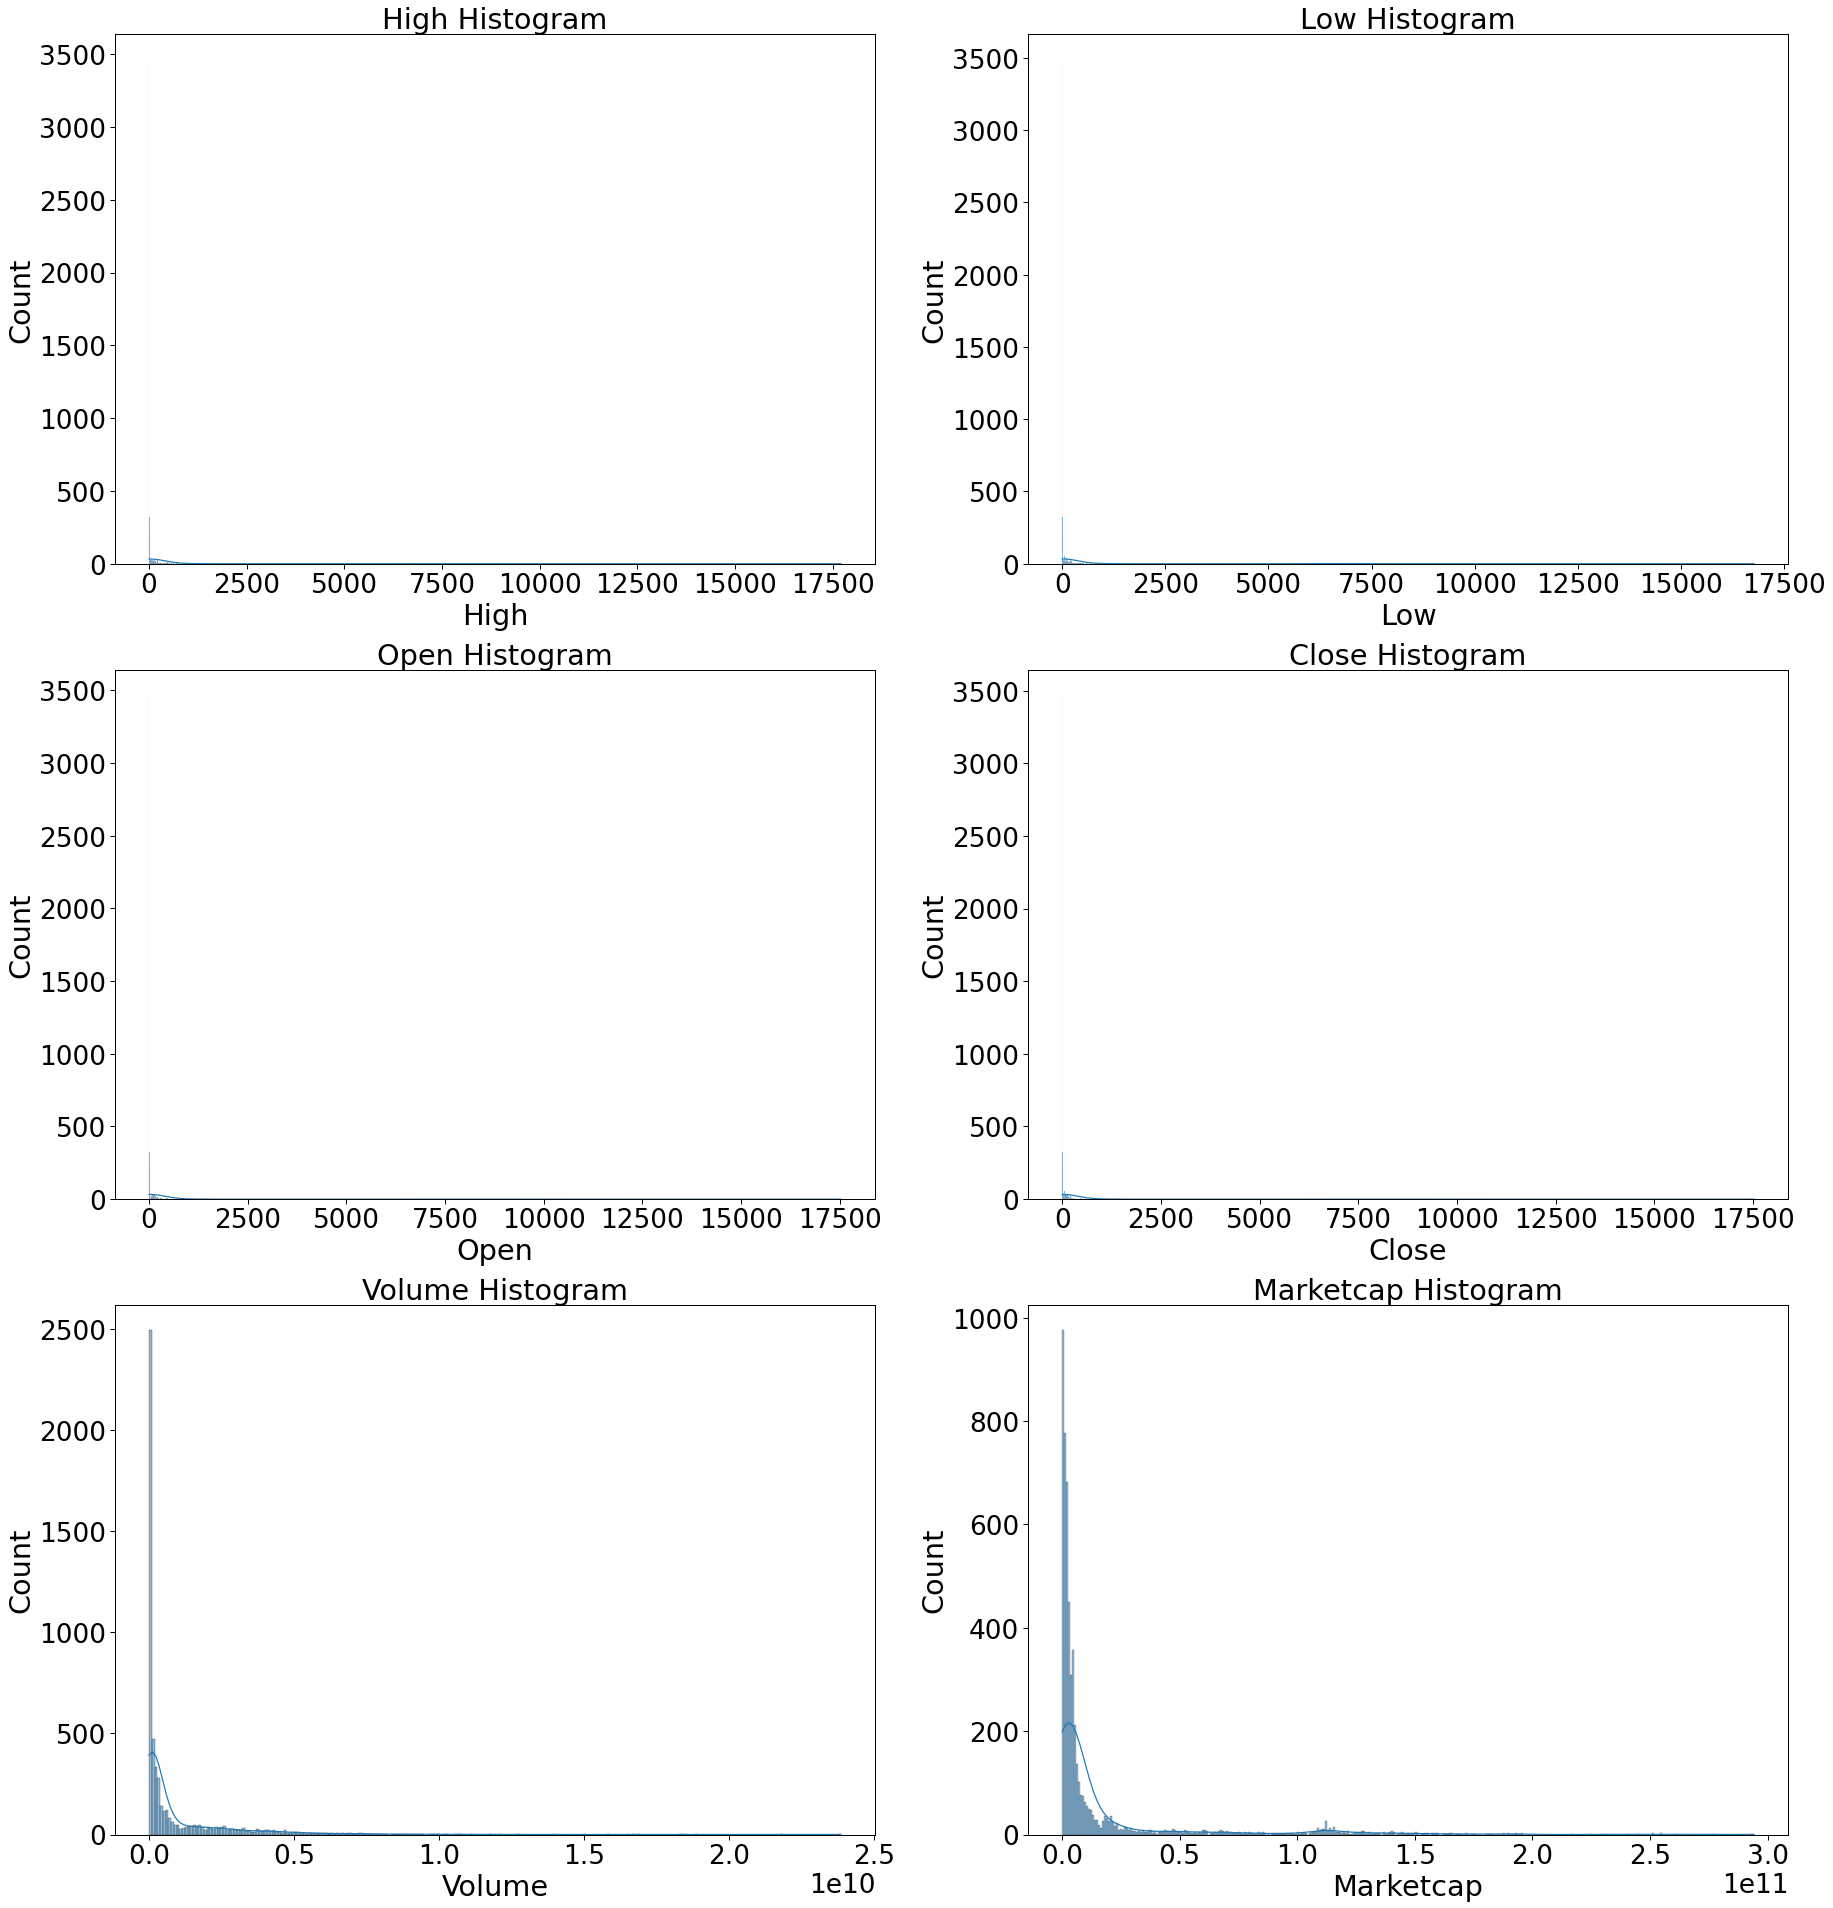

In [ ]:
sns.set_context("paper", font_scale=3)
plt.figure(figsize = (30,150))
for i,feature in enumerate(numeric_columns):
    ax = plt.subplot(13,2,i+1)
    sns.histplot(df_crypto[feature],kde = True)
    ax.set_title(feature + " Histogram")

In [ ]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       5475 non-null   object        
 1   Symbol     5475 non-null   object        
 2   Date       5475 non-null   datetime64[ns]
 3   High       5475 non-null   float64       
 4   Low        5475 non-null   float64       
 5   Open       5475 non-null   float64       
 6   Close      5475 non-null   float64       
 7   Volume     5475 non-null   float64       
 8   Marketcap  5475 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 385.1+ KB


### Checking and Selecting Null Values

We can now check how many missing values are present in the dataset. As seen for the categorical understanding before, we can say that there must not be any missing value, hence we should face no loss in the accuracy or the size of the dataset.

In [ ]:
df_crypto.isnull()

Name  Symbol   Date   High    Low   Open  Close  Volume  Marketcap
0     False   False  False  False  False  False  False   False      False
1     False   False  False  False  False  False  False   False      False
2     False   False  False  False  False  False  False   False      False
3     False   False  False  False  False  False  False   False      False
4     False   False  False  False  False  False  False   False      False
...     ...     ...    ...    ...    ...    ...    ...     ...        ...
5470  False   False  False  False  False  False  False   False      False
5471  False   False  False  False  False  False  False   False      False
5472  False   False  False  False  False  False  False   False      False
5473  False   False  False  False  False  False  False   False      False
5474  False   False  False  False  False  False  False   False      False

[5475 rows x 9 columns]

In [ ]:
df_crypto.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

### Duplicate value counts

Similarly as for the previous cell, we can see that duplicates aren't present as the dataset has been handpicked so the possiblility of duplicate datapoints is very low. Henceforth we also use the pandas describe method for a description of all the features under a vague statistical approach.

In [ ]:
df_crypto.duplicated().sum()

0

In [ ]:
df_crypto.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Name Symbol                 Date          High           Low  \
count           5475   5475                 5475   5475.000000   5475.000000   
unique            15     15                  365           NaN           NaN   
top     Binance Coin    BNB  2018-01-01 23:59:59           NaN           NaN   
freq             365    365                   15           NaN           NaN   
first            NaN    NaN  2018-01-01 23:59:59           NaN           NaN   
last             NaN    NaN  2018-12-31 23:59:59           NaN           NaN   
mean             NaN    NaN                  NaN    573.402178    539.825367   
std              NaN    NaN                  NaN   2045.638502   1919.559986   
min              NaN    NaN                  NaN      0.002085      0.002006   
25%              NaN    NaN                  NaN      0.236411      0.216162   
50%              NaN    NaN                  NaN      1.006050      0.983682   
75%              NaN    NaN                  NaN     53.797300     51.671296   
max              NaN    NaN                  NaN  17712.400391  16764.599609   

                Open         Close        Volume     Marketcap  
count    5475.000000   5475.000000  5.475000e+03  5.475000e+03  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
first            NaN           NaN           NaN           NaN  
last             NaN           NaN           NaN           NaN  
mean      558.991918    556.854525  9.507857e+08  1.613884e+10  
std      1992.672651   1984.732741  1.880140e+09  3.543250e+10  
min         0.002067      0.002065  9.284190e+03  5.819730e+07  
25%         0.224928      0.224823  2.956525e+07  1.393104e+09  
50%         0.996818      0.997592  1.285510e+08  3.112806e+09  
75%        52.376850     52.370350  8.654876e+08  8.884273e+09  
max     17527.300781  17527.000000  2.384090e+10  2.942174e+11

## Data Wrangling

#### Scaling

As seen Marketcaps are quite high. So, for ease of observation convert it to a new column that will represent the currencies Market cap and Volume in billion USD

In [ ]:
df_crypto['Volume in billion usd$'] = df_crypto['Volume'] / 1000000000
df_crypto['Market in billion usd$'] = df_crypto['Marketcap'] / 1000000000

df_crypto.drop(["Volume","Marketcap"],axis=1, inplace = True)
df_crypto.head(10)

Name Symbol                Date       High        Low       Open  \
0  Binance Coin    BNB 2018-01-01 23:59:59   8.700570   7.959220   8.629530   
1  Binance Coin    BNB 2018-01-02 23:59:59   9.122590   8.217180   8.457700   
2  Binance Coin    BNB 2018-01-03 23:59:59   9.580780   8.529180   8.770140   
3  Binance Coin    BNB 2018-01-04 23:59:59   9.538490   8.854130   9.445840   
4  Binance Coin    BNB 2018-01-05 23:59:59  16.717699   9.094680   9.145680   
5  Binance Coin    BNB 2018-01-06 23:59:59  23.508200  14.821200  14.868900   
6  Binance Coin    BNB 2018-01-07 23:59:59  22.769100  18.242500  22.769100   
7  Binance Coin    BNB 2018-01-08 23:59:59  19.216700  15.347100  18.646500   
8  Binance Coin    BNB 2018-01-09 23:59:59  20.320299  16.801399  18.174000   
9  Binance Coin    BNB 2018-01-10 23:59:59  17.707899  15.170800  17.707899   

       Close  Volume in billion usd$  Market in billion usd$  
0   8.414610                0.066423                0.833164  
1   8.837770                0.104789                0.875063  
2   9.535880                0.108852                0.944186  
3   9.213990                0.158819                0.912314  
4  14.917200                0.341505                1.477012  
5  22.759800                0.637021                2.253539  
6  18.656799                0.258050                1.847284  
7  18.260900                0.296618                1.808085  
8  17.411800                0.194750                1.724012  
9  17.390800                0.146582                1.721933

#### Selection
Creating a subset of data and then creating dataframes related to each cryptocurrencies

In [ ]:
binance = (df_crypto[df_crypto["Name"] == "Binance Coin"]).reset_index(drop=True)
bitcoin = (df_crypto[df_crypto["Name"] == "Bitcoin"]).reset_index(drop=True)
cardano = (df_crypto[df_crypto["Name"] == "Cardano"]).reset_index(drop=True)
chainLink = df_crypto[df_crypto["Name"] == "Chainlink"].reset_index(drop=True)
dogecoin = df_crypto[df_crypto["Name"] == "Dogecoin"].reset_index(drop=True)
eos = df_crypto[df_crypto["Name"] == "EOS"].reset_index(drop=True)
ethereum = df_crypto[df_crypto["Name"] == "Ethereum"].reset_index(drop=True)
lota = df_crypto[df_crypto["Name"] == "IOTA"].reset_index(drop=True)
liteCoin = df_crypto[df_crypto["Name"] == "Litecoin"].reset_index(drop=True)
monero = df_crypto[df_crypto["Name"] == "Monero"].reset_index(drop=True)
nem = df_crypto[df_crypto["Name"] == "NEM"].reset_index(drop=True)
stellar = df_crypto[df_crypto["Name"] == "Stellar"].reset_index(drop=True)
tether = df_crypto[df_crypto["Name"] == "Tether"].reset_index(drop=True)
tron = df_crypto[df_crypto["Name"] == "TRON"].reset_index(drop=True)
xrp = df_crypto[df_crypto["Name"] == "XRP"].reset_index(drop=True)

In [ ]:
list_df = [binance,bitcoin,cardano,chainLink,dogecoin,eos,ethereum,lota,liteCoin,monero,nem,stellar,tether,tron,xrp]
crypto_names=["Binance Coin", "Bitcoin", "Cardano", "Chainlink", "Dogecoin", "EOS", "Ethereum", "IOTA", "Litecoin", "Monero", "NEM", "Stellar", "Tether", "TRON", "XRP"]

for data,crypto_name in zip(list_df,crypto_names):
    print("____________________________________")
    print("\n")
    
    print(f"{crypto_name}")
    data = df_crypto[df_crypto["Name"] == crypto_name]
    print("shape of data :--",data.shape)
    print("data information :---\n",data)
    
    print("\n")
    print("____________________________________")

____________________________________


Binance Coin
shape of data :-- (365, 9)
data information :---
              Name Symbol                Date       High       Low      Open  \
0    Binance Coin    BNB 2018-01-01 23:59:59   8.700570  7.959220  8.629530   
1    Binance Coin    BNB 2018-01-02 23:59:59   9.122590  8.217180  8.457700   
2    Binance Coin    BNB 2018-01-03 23:59:59   9.580780  8.529180  8.770140   
3    Binance Coin    BNB 2018-01-04 23:59:59   9.538490  8.854130  9.445840   
4    Binance Coin    BNB 2018-01-05 23:59:59  16.717699  9.094680  9.145680   
..            ...    ...                 ...        ...       ...       ...   
360  Binance Coin    BNB 2018-12-27 23:59:59   5.750797  5.246651  5.717212   
361  Binance Coin    BNB 2018-12-28 23:59:59   6.020247  5.245348  5.289188   
362  Binance Coin    BNB 2018-12-29 23:59:59   6.095640  5.832340  6.027940   
363  Binance Coin    BNB 2018-12-30 23:59:59   6.013542  5.773901  5.842567   
364  Binance Coin    BNB 2018

#### Concatenation and addition
Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above. Trend is determined from below relationship —

In [ ]:
def get_trend(x):
    
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"
    
    

for data in list_df:
  data["Trend"] = data.apply(lambda x: get_trend(x.High-x.Low), axis=1)
  print(data.head(5))

           Name Symbol                Date       High      Low     Open  \
0  Binance Coin    BNB 2018-01-01 23:59:59   8.700570  7.95922  8.62953   
1  Binance Coin    BNB 2018-01-02 23:59:59   9.122590  8.21718  8.45770   
2  Binance Coin    BNB 2018-01-03 23:59:59   9.580780  8.52918  8.77014   
3  Binance Coin    BNB 2018-01-04 23:59:59   9.538490  8.85413  9.44584   
4  Binance Coin    BNB 2018-01-05 23:59:59  16.717699  9.09468  9.14568   

      Close  Volume in billion usd$  Market in billion usd$            Trend  
0   8.41461                0.066423                0.833164  Slight Positive  
1   8.83777                0.104789                0.875063  Slight Positive  
2   9.53588                0.108852                0.944186         Positive  
3   9.21399                0.158819                0.912314  Slight Positive  
4  14.91720                0.341505                1.477012         Bull run  
      Name Symbol                Date          High           Low  \
0  Bit

**Sorting the dataset keep the factor as Volume in Billion USD**

In [ ]:
df_crypto.sort_values(by='Volume in billion usd$')

Name Symbol                Date          High           Low  \
39    Binance Coin    BNB 2018-02-09 23:59:59      9.889270      8.343150   
1290     Chainlink   LINK 2018-07-15 23:59:59      0.201663      0.189206   
1260     Chainlink   LINK 2018-06-15 23:59:59      0.240677      0.222245   
1352     Chainlink   LINK 2018-09-15 23:59:59      0.279133      0.265223   
1274     Chainlink   LINK 2018-06-29 23:59:59      0.183460      0.162135   
...            ...    ...                 ...           ...           ...   
374        Bitcoin    BTC 2018-01-10 23:59:59  14973.299805  13691.200195   
381        Bitcoin    BTC 2018-01-17 23:59:59  11678.000000   9402.290039   
380        Bitcoin    BTC 2018-01-16 23:59:59  13843.099609  10194.900391   
368        Bitcoin    BTC 2018-01-04 23:59:59  15739.700195  14522.200195   
369        Bitcoin    BTC 2018-01-05 23:59:59  17705.199219  15202.799805   

              Open         Close  Volume in billion usd$  \
39        8.606660      9.730460                0.000009   
1290      0.195647      0.199310                0.000399   
1260      0.239984      0.223557                0.000421   
1352      0.269763      0.269288                0.000430   
1274      0.166213      0.181072                0.000435   
...            ...           ...                     ...   
374   14588.500000  14973.299805               18.500801   
381   11431.099609  11188.599609               18.830600   
380   13836.099609  11490.500000               18.853800   
368   15270.700195  15599.200195               21.783200   
369   15477.200195  17429.500000               23.840899   

      Market in billion usd$  
39                  0.963452  
1290                0.069759  
1260                0.078245  
1352                0.094251  
1274                0.063375  
...                      ...  
374               251.472636  
381               188.070431  
380               193.121121  
368               261.795321  
369               292.544136  

[5475 rows x 9 columns]

## Exploratory Data analysis

By using the *Seaborn* library we plot the graph keeping multiple factors in mind and draw inferences from them. We wil be able to analyse Crypto Price by the relationship we draw between the factors. Visual representation helps in observing patterns, variation and validation of models.

### **Univariate Analysis**
Univariate assessment is a central kind of examination system for real data. Here the data contains just a single variable and doesn't have to deal with the relationship of a conditions and legitimate outcomes. **Like for example,** ponder an outline of a homeroom. The specialists would have to count the amount of young fellows and young women in the room. The data here only conversations about the number which is a single variable and the variable sum. The essential objective of the univariate assessment is to portray the data to sort out the models in the data. This is done by looking at the mean, mode, center, standard deviation, dissipating, etc.

Univariate assessment is generally the most direct construction to examine data. Uni suggests one and this suggests that the data has recently a solitary kind of component. The critical defense for univariate examination is to use the data to portray. The assessment will take data, summarize it, and subsequently find some model in the data.

We shall perform univariate anaysis individually on all of the numerical factors by plotting a histogram and boxplot for all of them respecively. Then we use the describe, skew and kurt method for the statistical inferences from the same. 

**Skewness is the flatness of the curve distribution that defines the range of the curve.**

**Kurtosis is the sharpness of the curve that defines the concentration of the points in the same distribution curve.**

We plot the histograms to understand the distribution and density of the concentration of the numerical data.

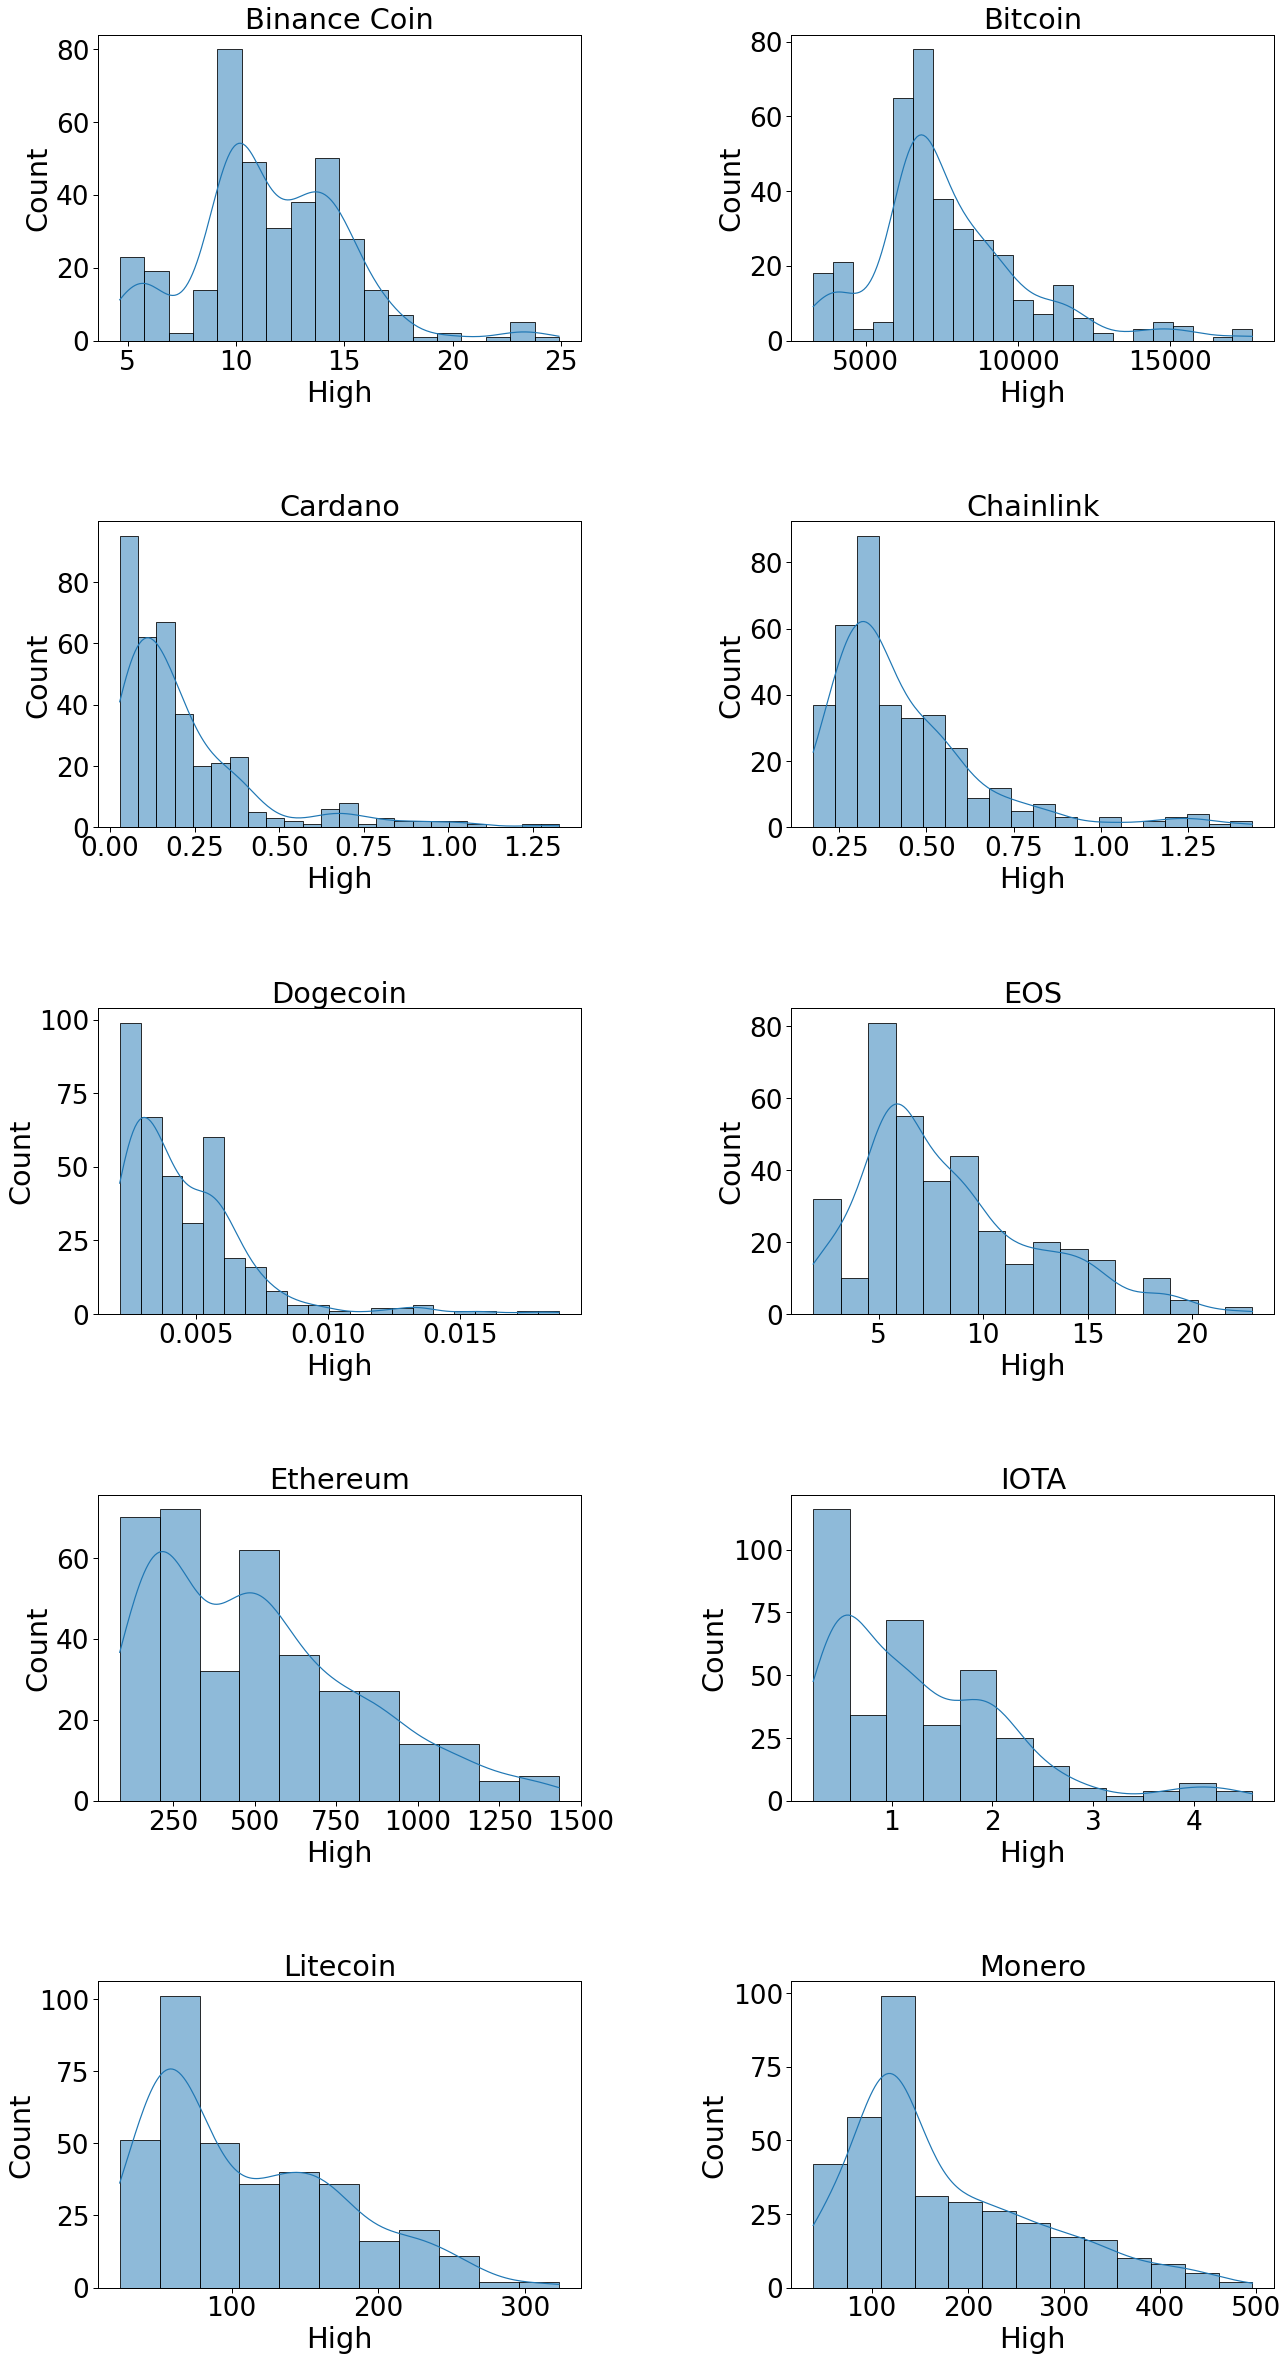

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["High"] , ax=subplot,kde=True) 
    subplot.set_title(f"{crypto_name}")   
    plt.tight_layout(pad=3)
    
plt.show()

Boxplot helps us to view the outliers (which are the points that are at the extreme ends of the normal distribution) and the distribution along the median in all the four quartiles.

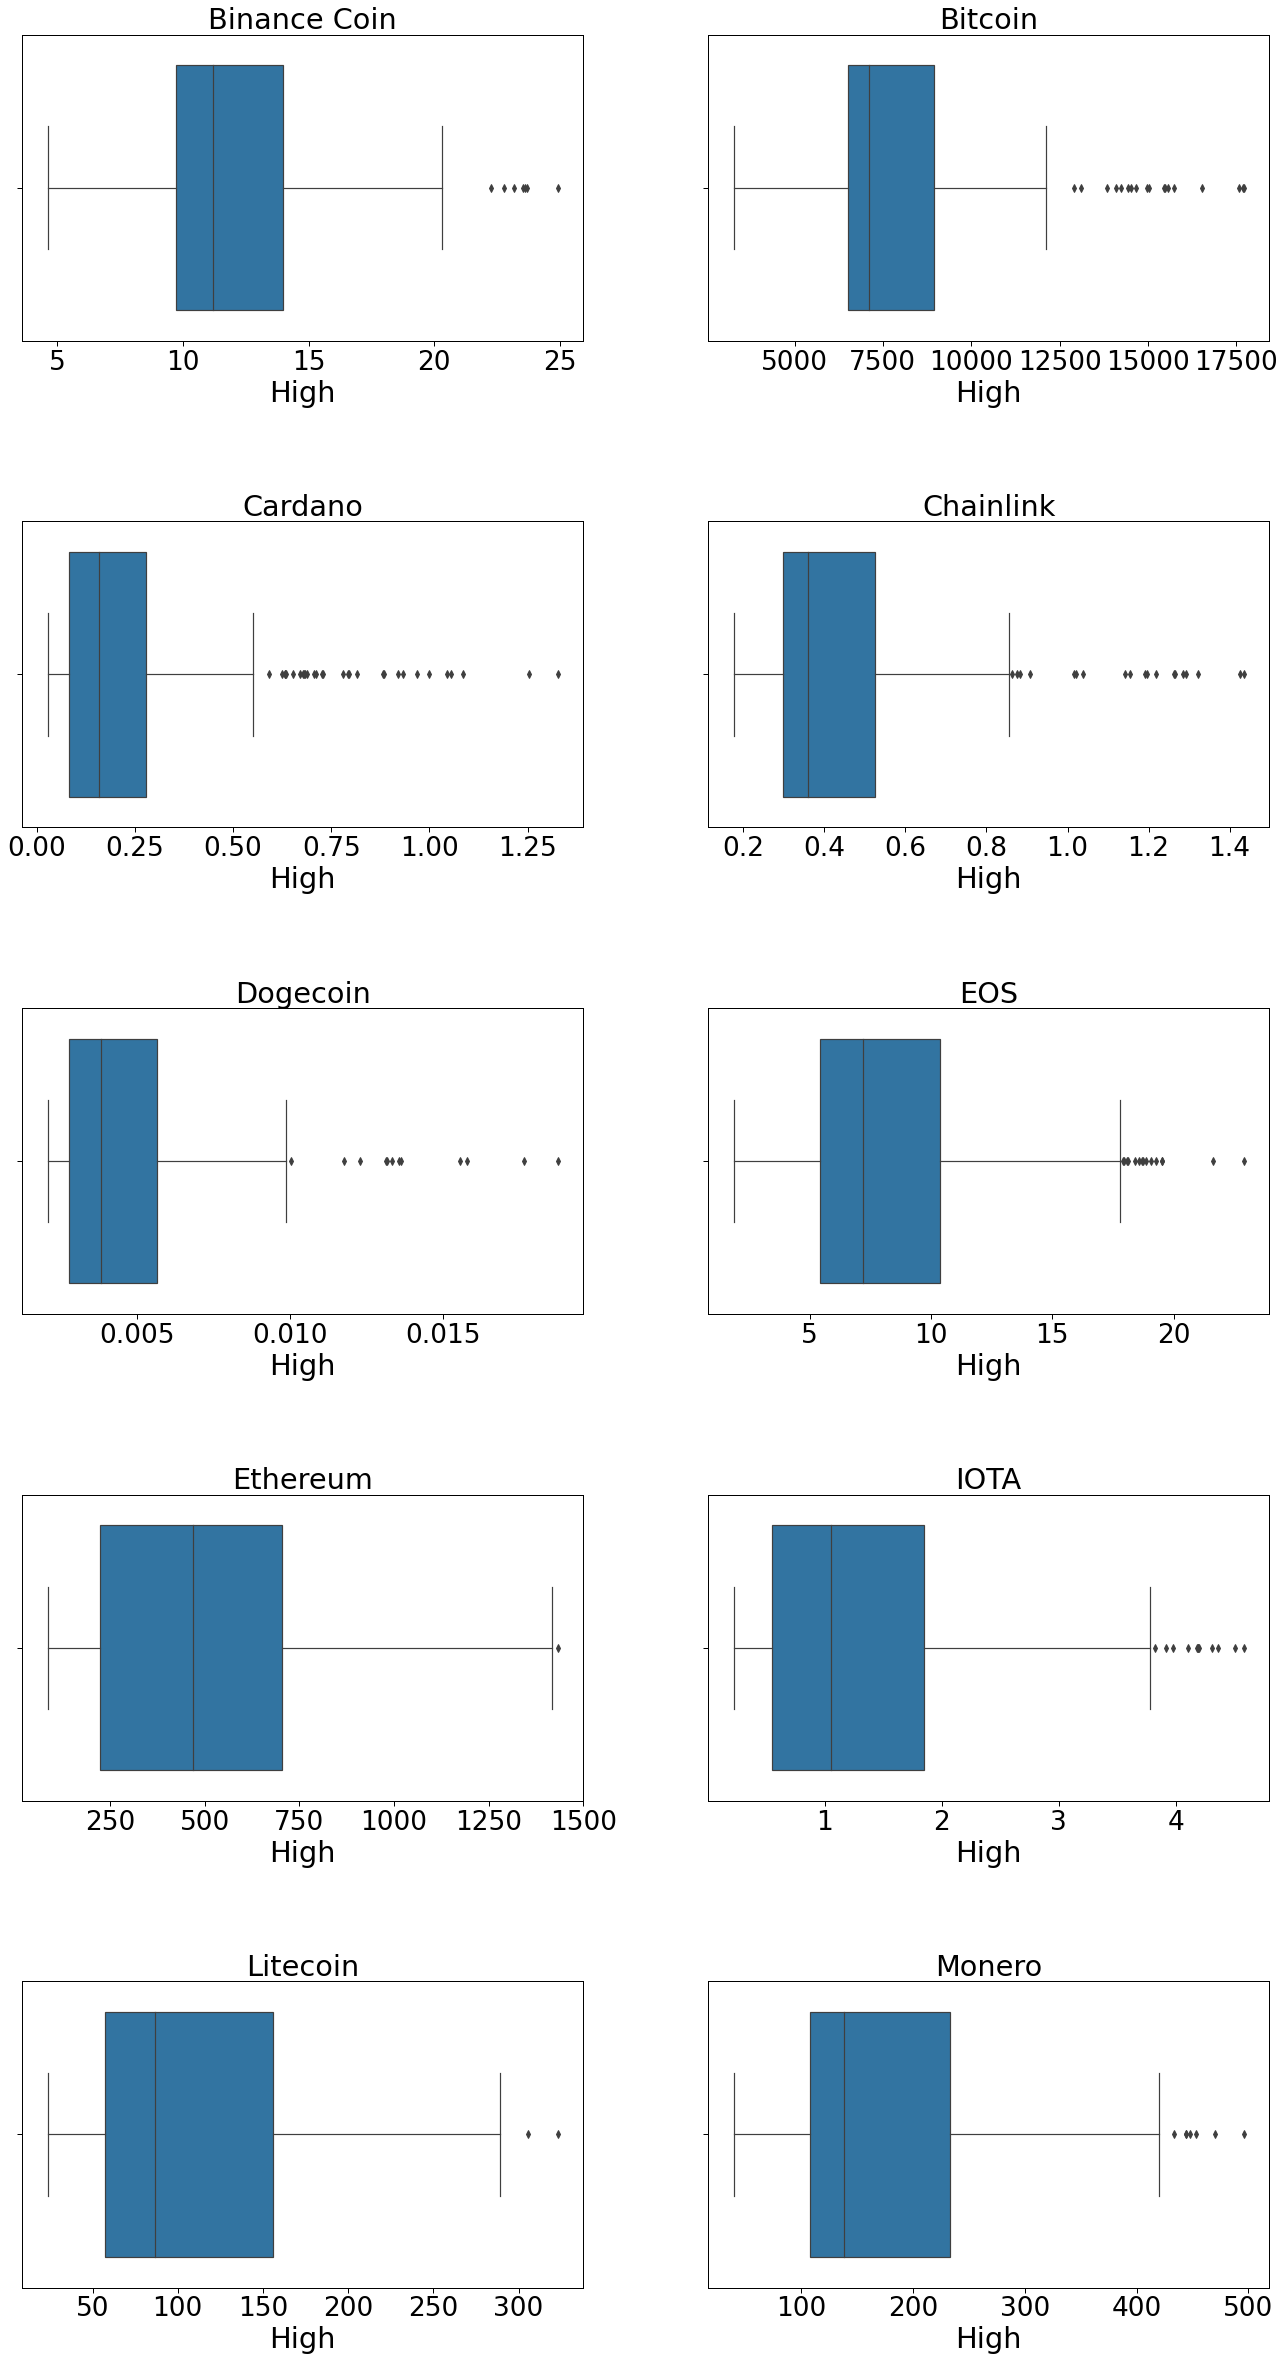

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["High"] , ax=subplot)
    subplot.set_title(f"{crypto_name}")
    plt.tight_layout(pad=3)
    
plt.show()

In [ ]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable high ")
    print(data["High"].describe())
    print("skewness of high : ",data["High"].skew())
    print("kurtosis of variable high : ",data["High"].kurt())
    print("________________________________\n")

Binance Coin
general statistics for variable high 
count    365.000000
mean      11.648312
std        3.520577
min        4.635010
25%        9.715040
50%       11.201600
75%       13.975700
max       24.912100
Name: High, dtype: float64
skewness of high :  0.4812668232154946
kurtosis of variable high :  1.215594061322966
________________________________

Bitcoin
general statistics for variable high 
count      365.000000
mean      7787.978968
std       2578.010418
min       3275.377827
25%       6502.280000
50%       7109.560000
75%       8958.469727
max      17712.400391
Name: High, dtype: float64
skewness of high :  1.1627267128359913
kurtosis of variable high :  2.203650807829652
________________________________

Cardano
general statistics for variable high 
count    365.000000
mean       0.222343
std        0.215650
min        0.028568
25%        0.081310
50%        0.159019
75%        0.278760
max        1.327210
Name: High, dtype: float64
skewness of high :  2.266246984452688
ku

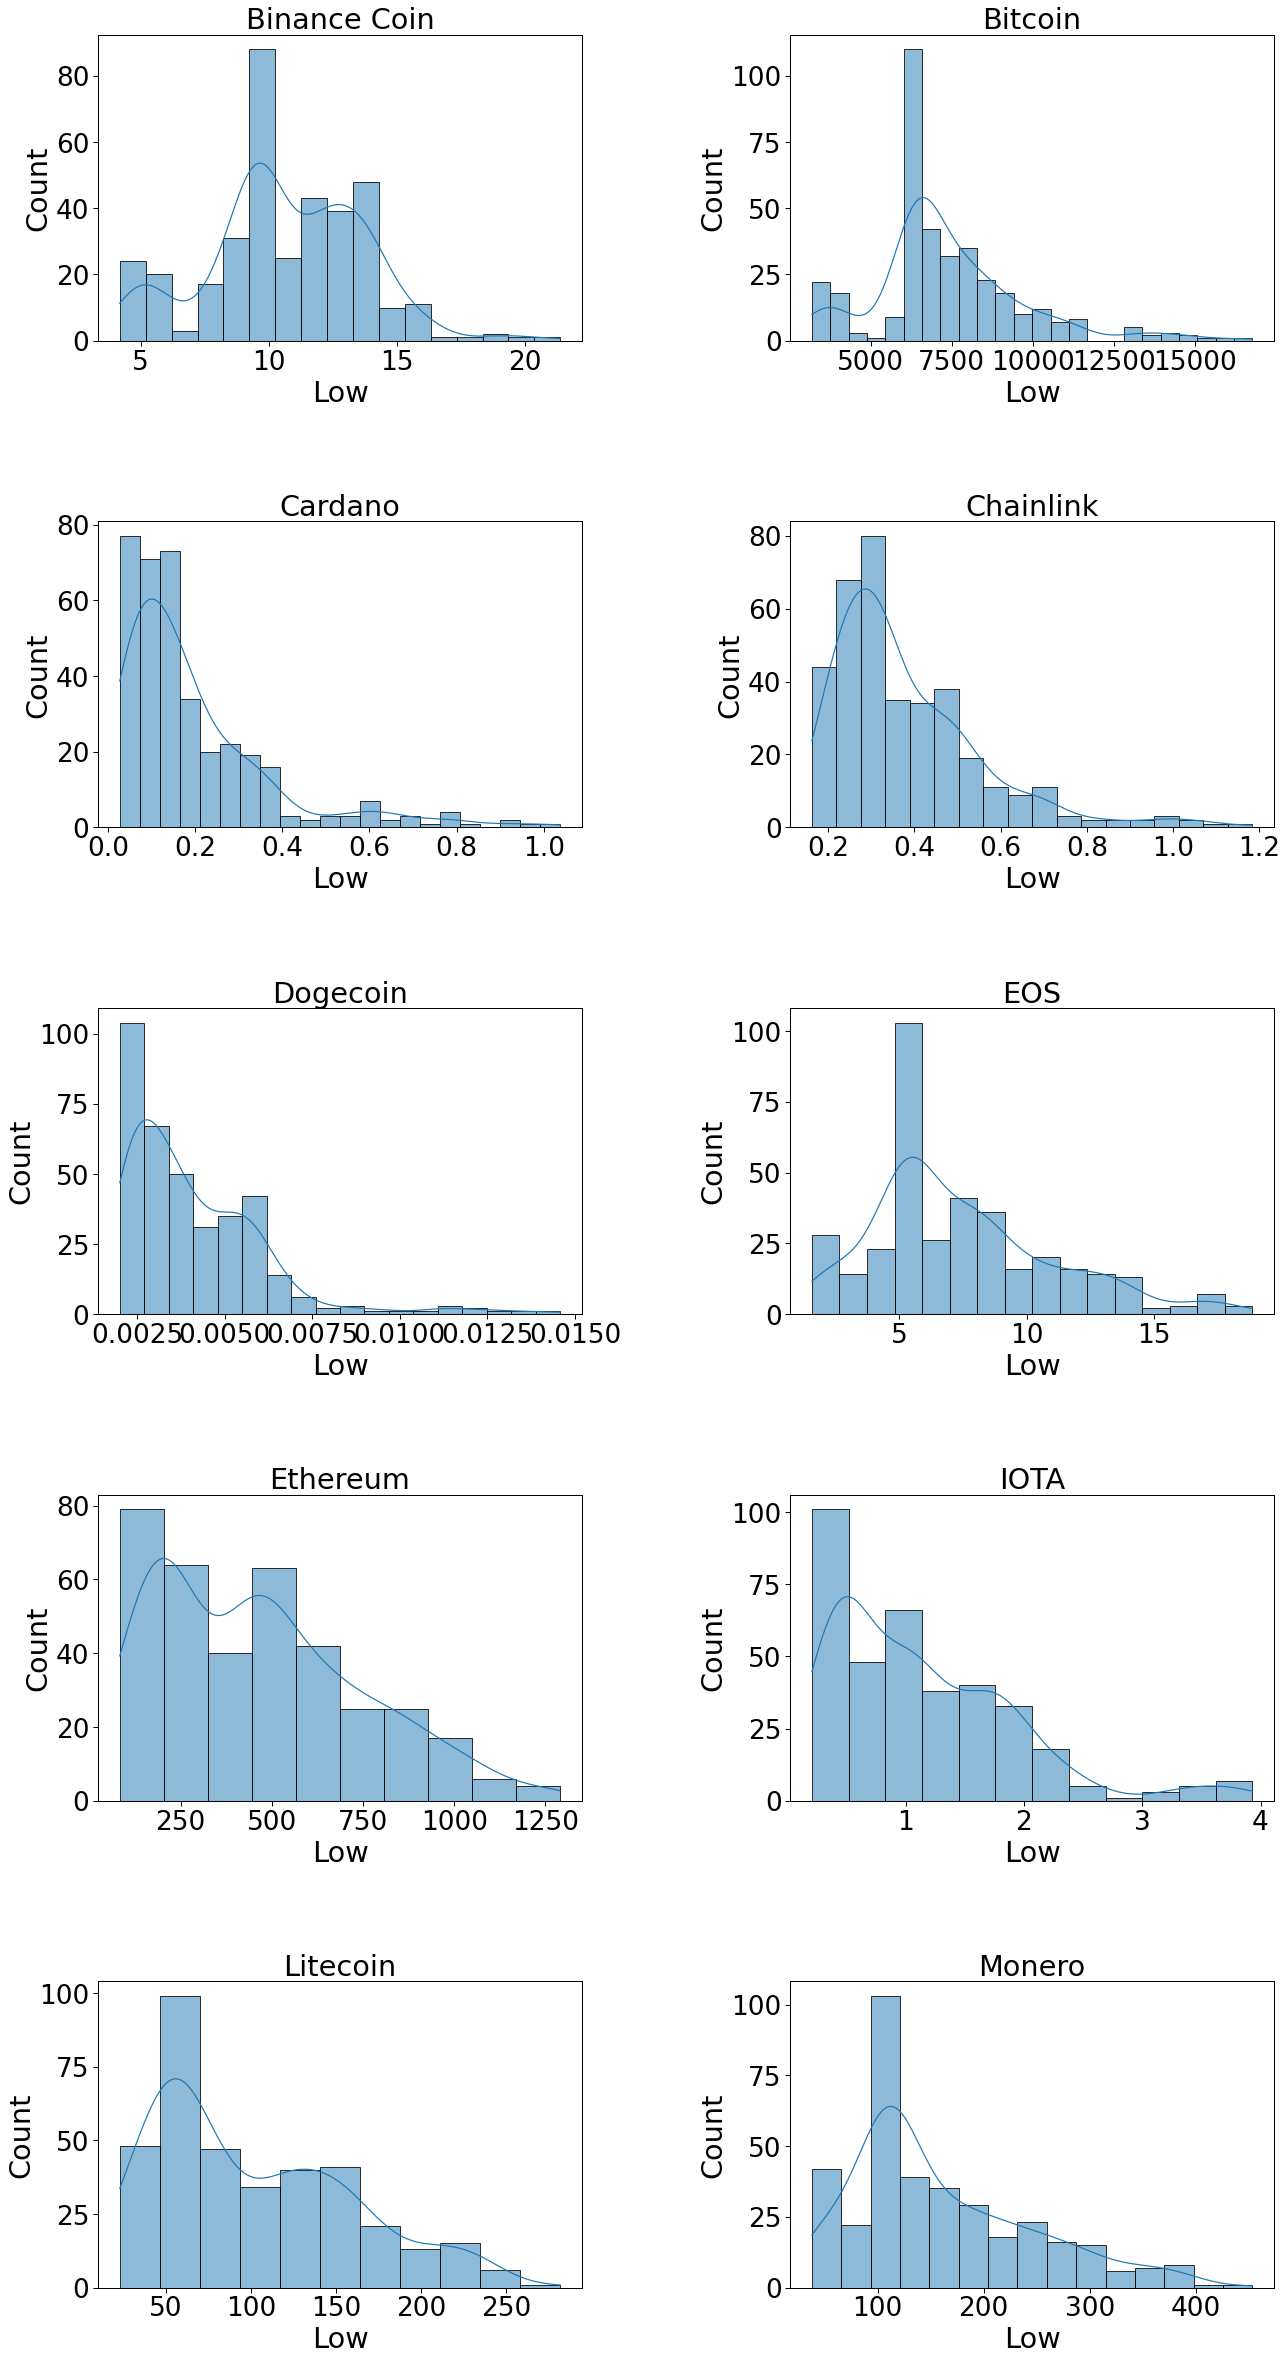

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Low"] , ax=subplot,kde=True)
    subplot.set_title(f"{crypto_name}")   
    plt.tight_layout(pad=3)    

plt.show()

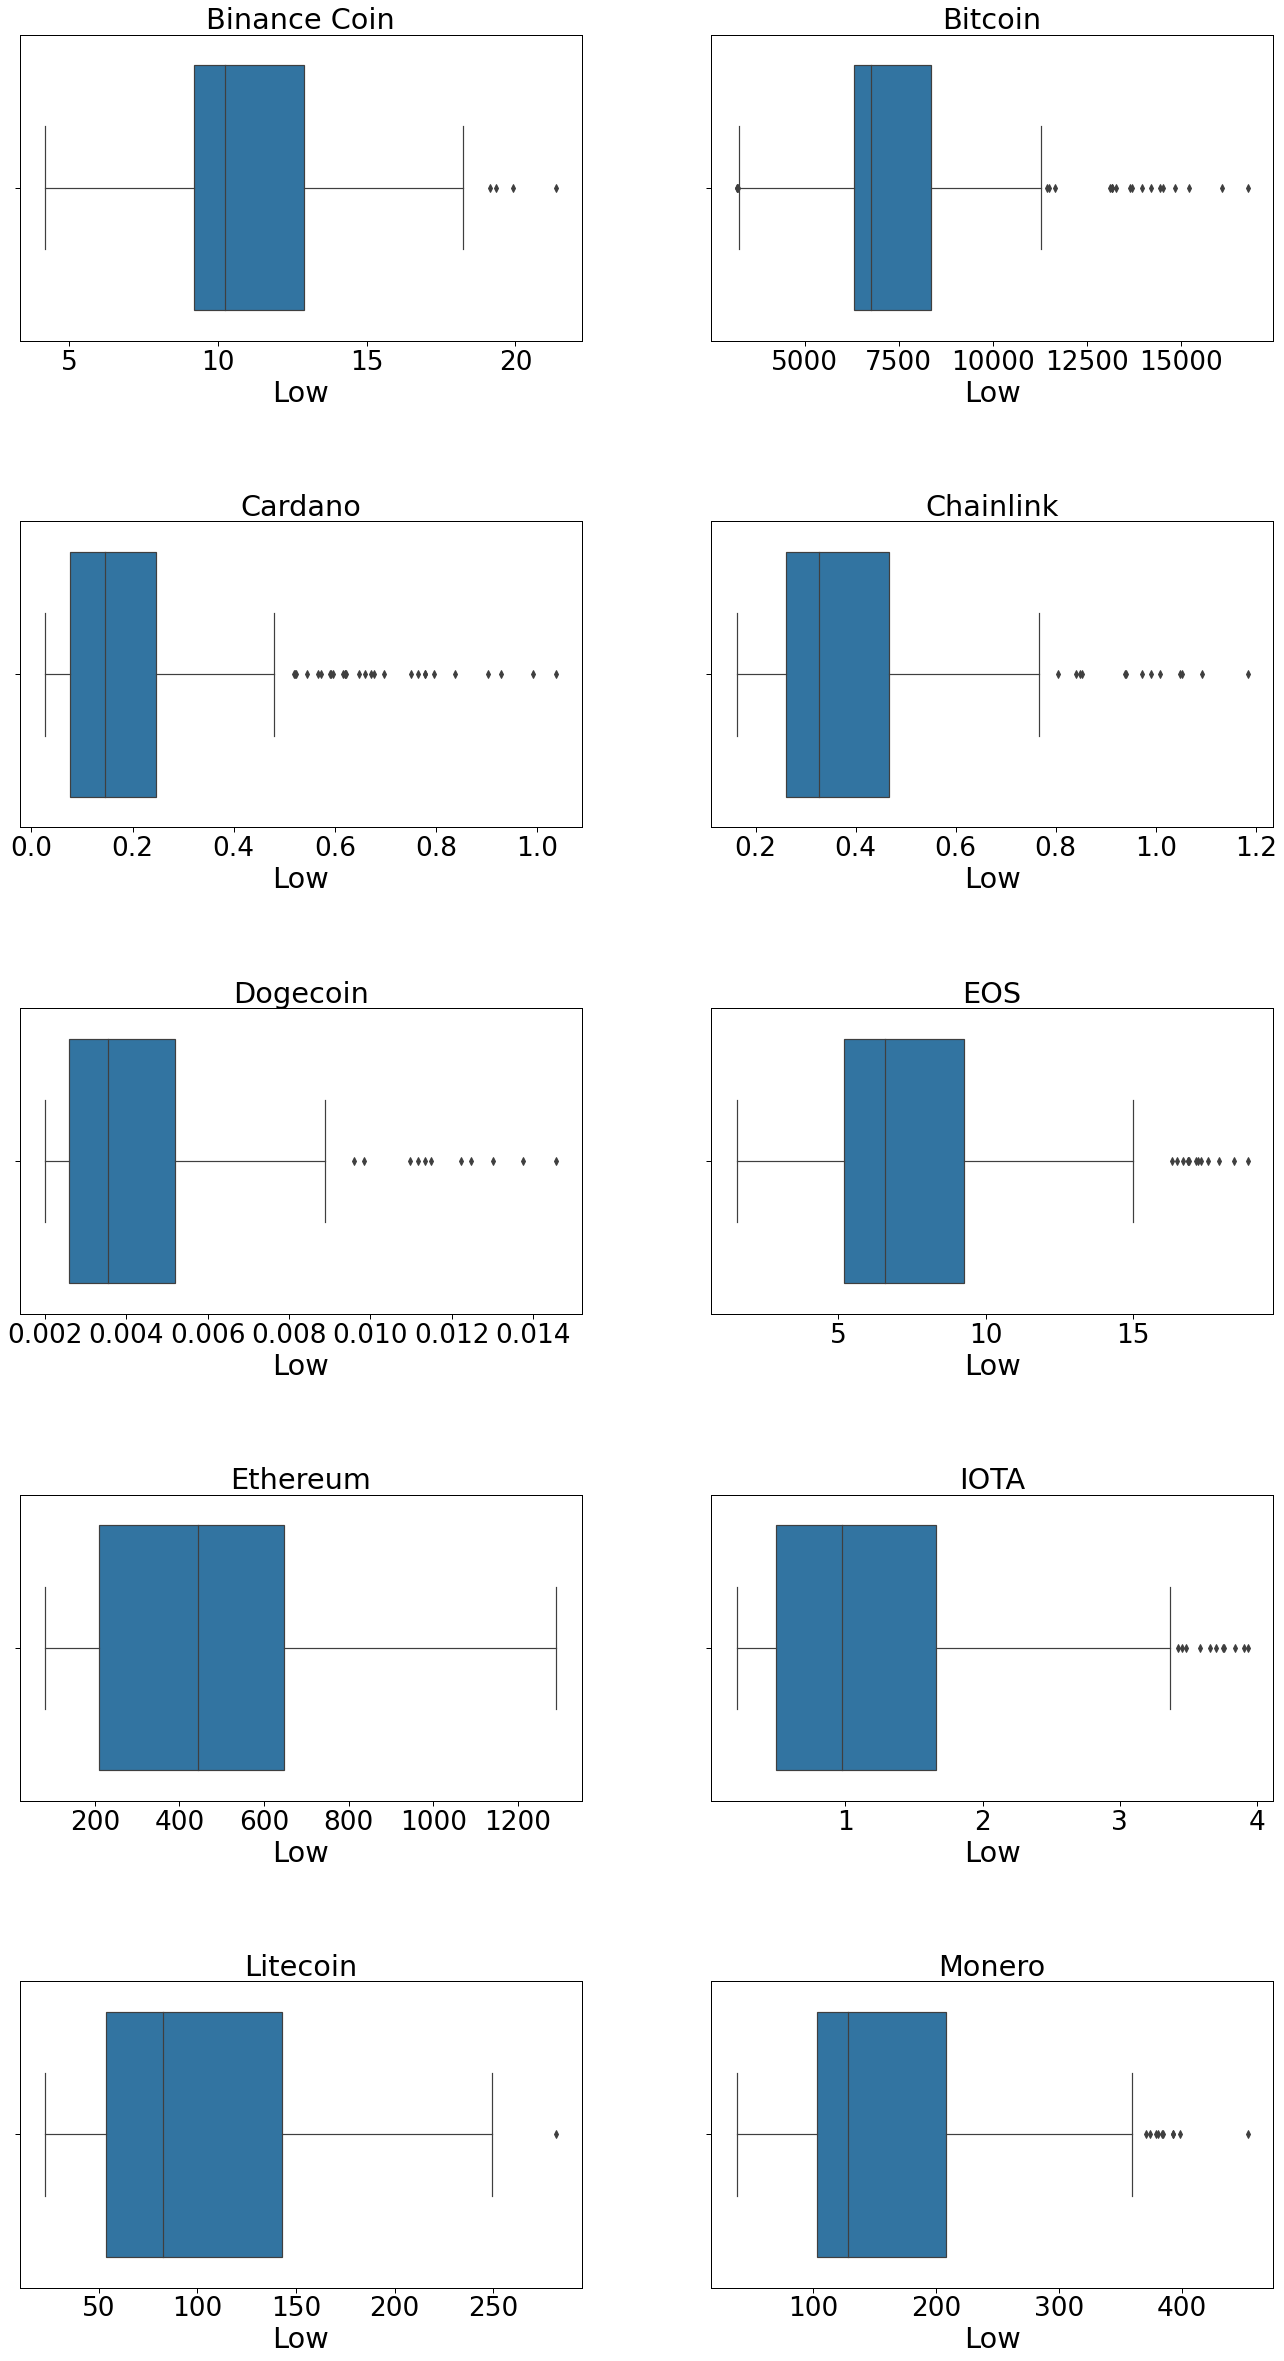

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Low"] , ax=subplot)
    subplot.set_title(f"{crypto_name}")    
    plt.tight_layout(pad=3)
    
plt.show()

In [ ]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable low ")
    print(data["Low"].describe())
    print("skewness of high : ",data["Low"].skew())
    print("kurtosis of variable high : ",data["Low"].kurt())
    print("________________________________\n")

Binance Coin
general statistics for variable low 
count    365.000000
mean      10.652098
std        3.048745
min        4.189971
25%        9.185250
50%       10.239900
75%       12.894200
max       21.373400
Name: Low, dtype: float64
skewness of high :  -0.0032352768471037283
kurtosis of variable high :  0.1611561541036961
________________________________

Bitcoin
general statistics for variable low 
count      365.000000
mean      7350.747934
std       2296.187635
min       3191.303562
25%       6310.110000
50%       6747.979980
75%       8360.620117
max      16764.599609
Name: Low, dtype: float64
skewness of high :  1.002958958636399
kurtosis of variable high :  2.126506151199029
________________________________

Cardano
general statistics for variable low 
count    365.000000
mean       0.196307
std        0.177830
min        0.027393
25%        0.075602
50%        0.144857
75%        0.247134
max        1.037650
Name: Low, dtype: float64
skewness of high :  2.068682516389494
kurt

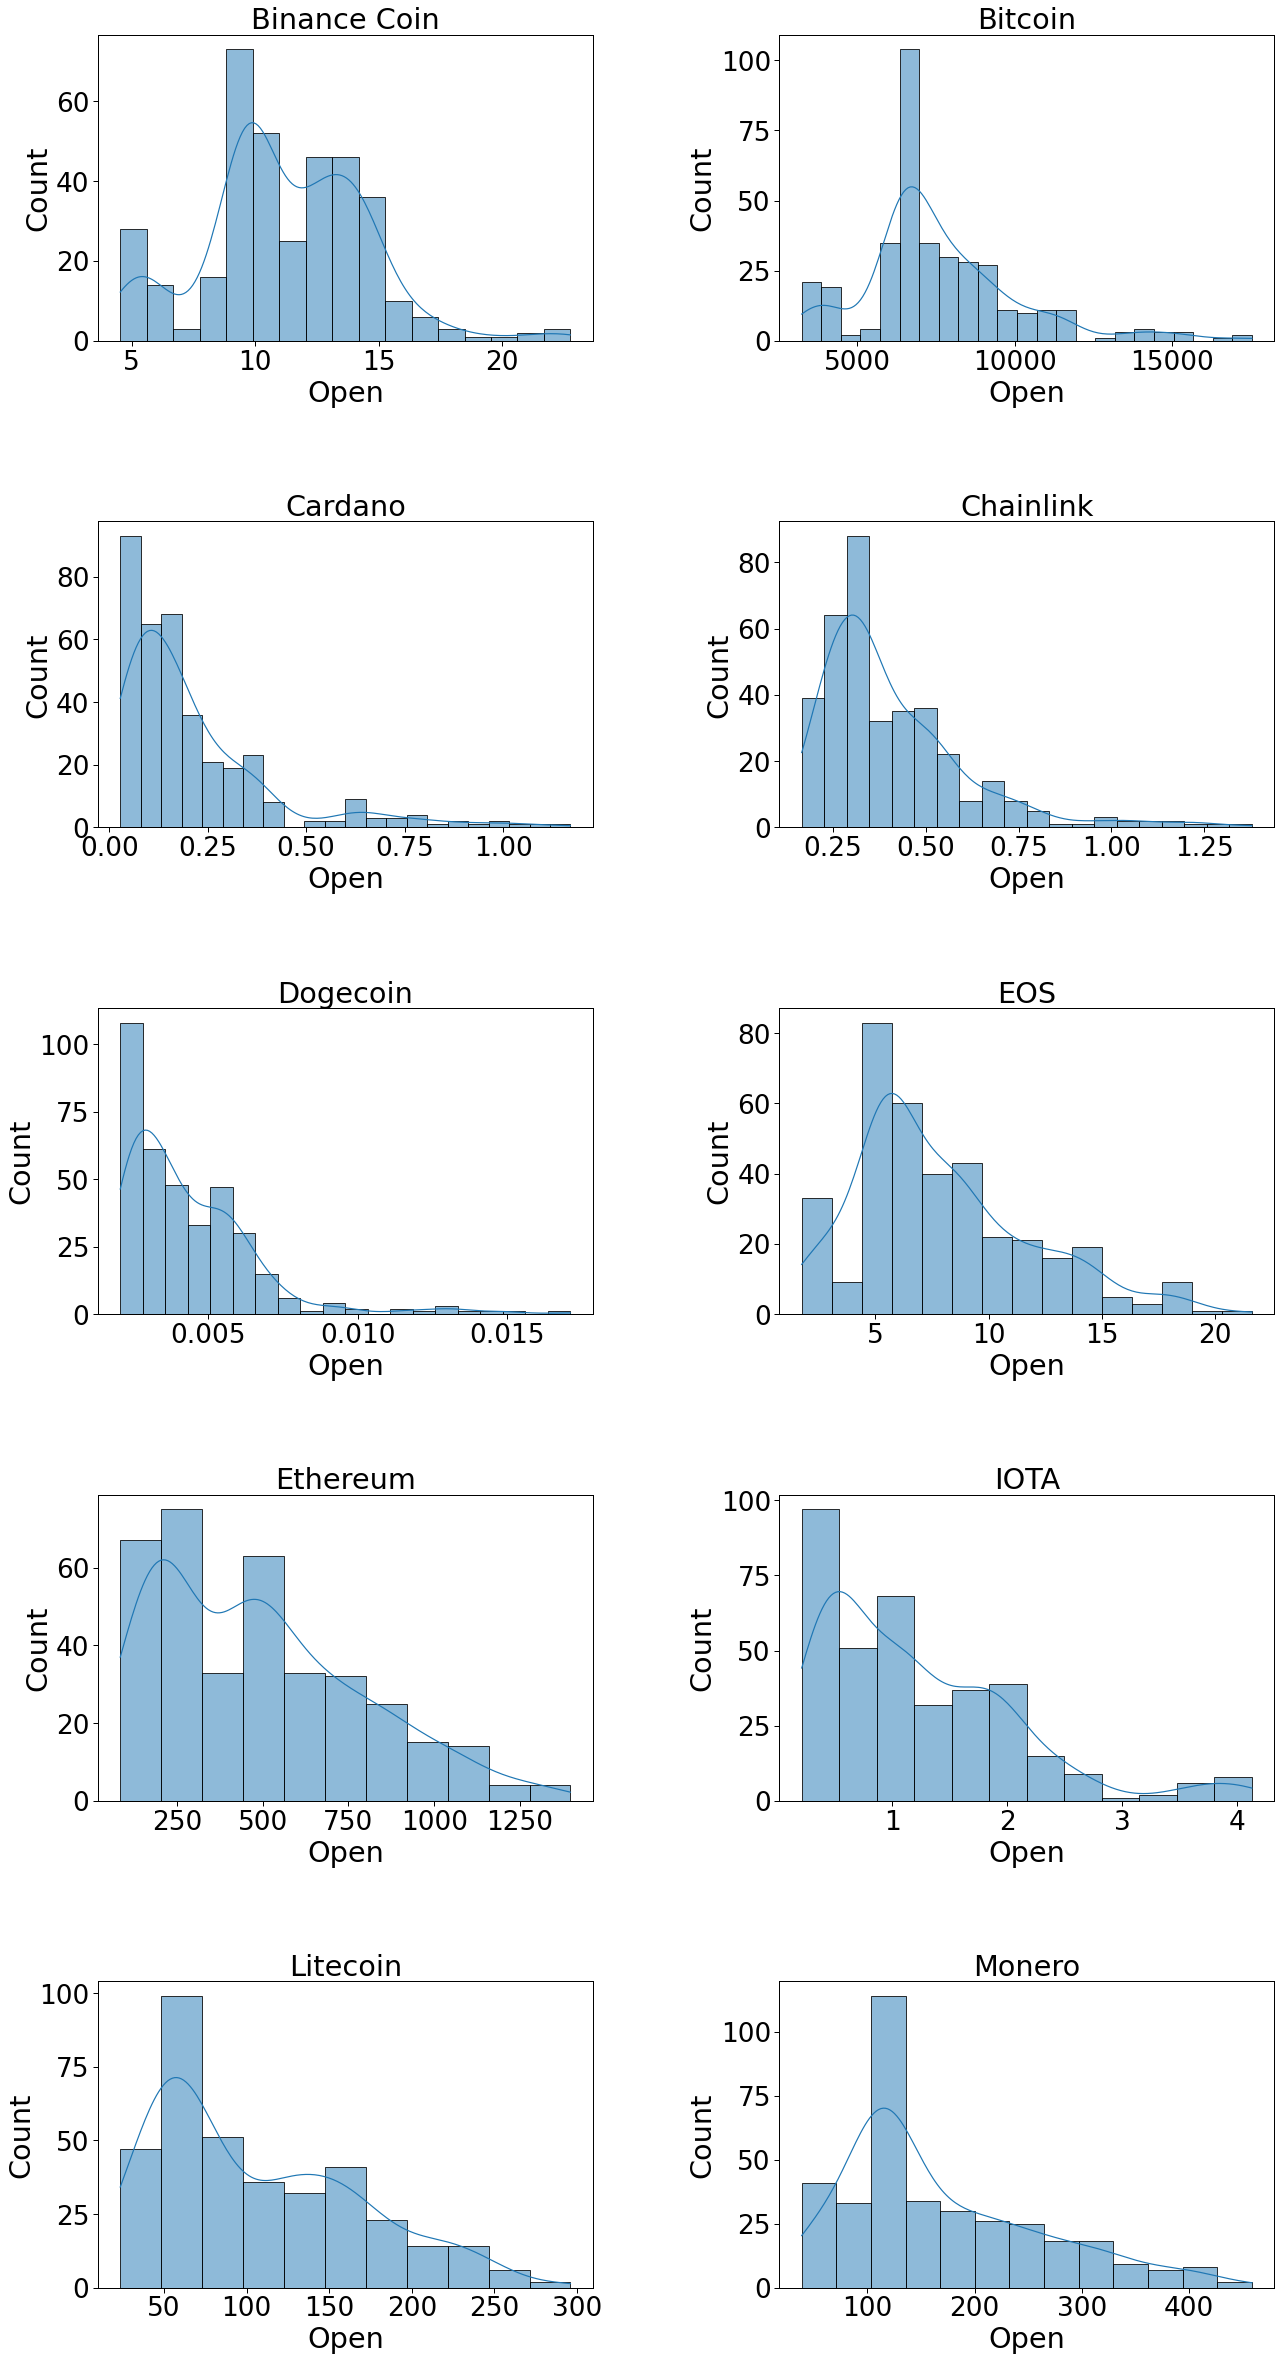

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Open"] , ax=subplot,kde=True)
    subplot.set_title(f"{crypto_name}")   
    plt.tight_layout(pad=3)  
    
plt.show()

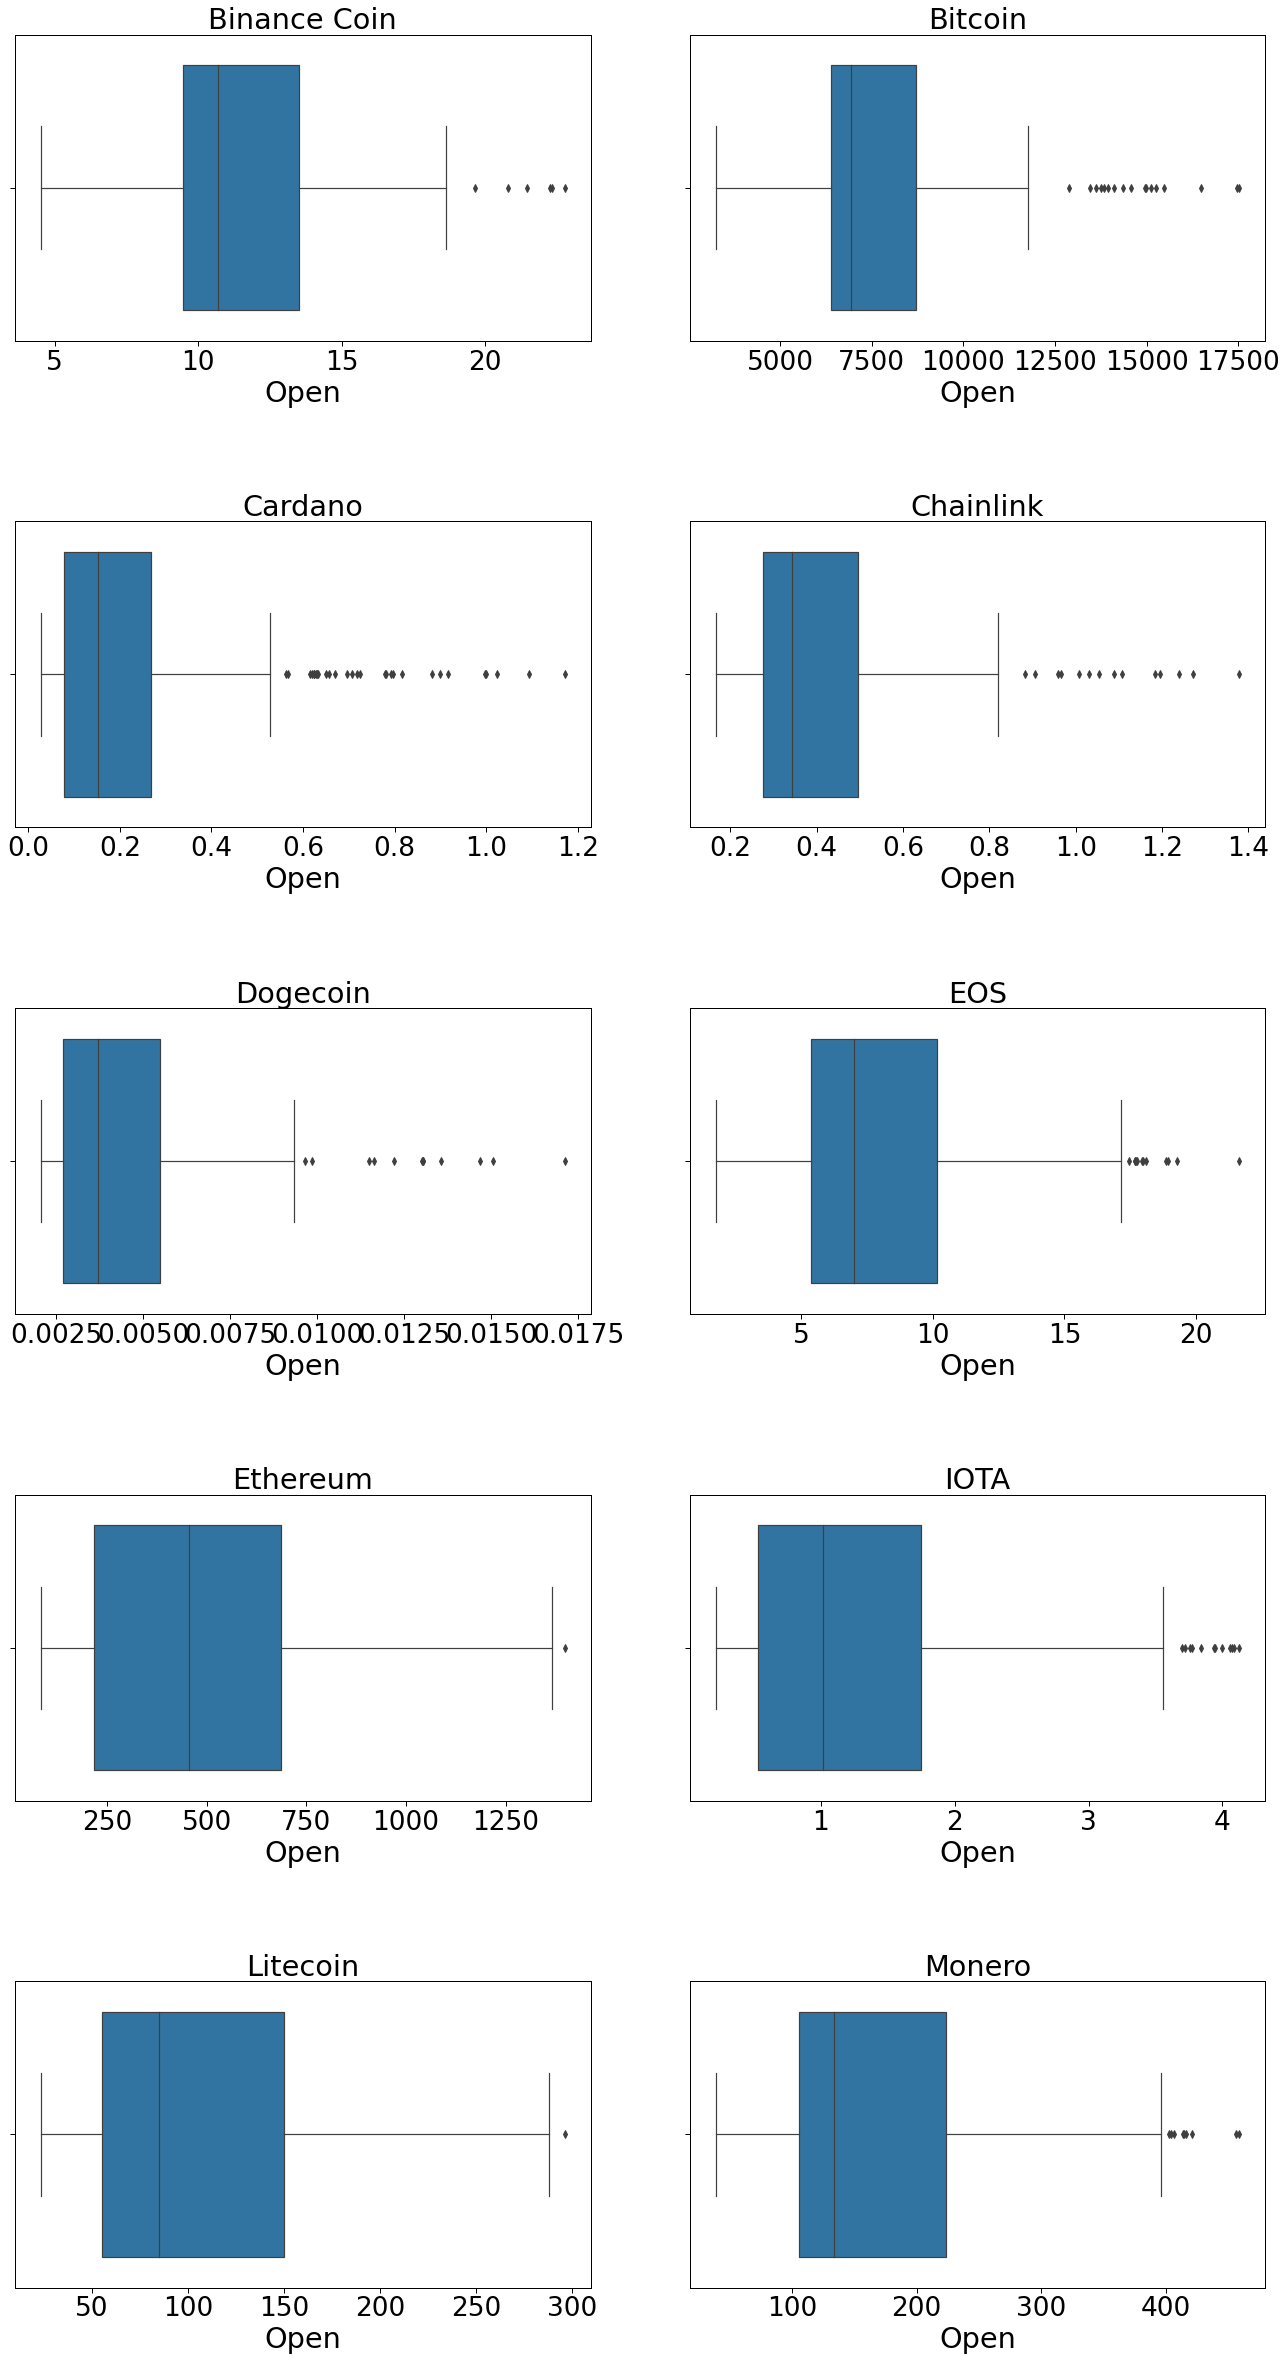

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Open"] , ax=subplot)
    subplot.set_title(f"{crypto_name}")  
    plt.tight_layout(pad=3)
    
plt.show()

In [ ]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable open ")
    print(data["Open"].describe())
    print("skewness of Open : ",data["Open"].skew())
    print("kurtosis of variable Open : ",data["Open"].kurt())
    print("________________________________\n")

Binance Coin
general statistics for variable open 
count    365.000000
mean      11.188341
std        3.277848
min        4.532951
25%        9.485970
50%       10.694900
75%       13.524500
max       22.769100
Name: Open, dtype: float64
skewness of Open :  0.24249362619581669
kurtosis of variable Open :  0.6785241061470124
________________________________

Bitcoin
general statistics for variable open 
count      365.000000
mean      7601.018676
std       2469.977690
min       3236.274773
25%       6386.130000
50%       6919.979980
75%       8705.190430
max      17527.300781
Name: Open, dtype: float64
skewness of Open :  1.1191533286951458
kurtosis of variable Open :  2.242816516925022
________________________________

Cardano
general statistics for variable open 
count    365.000000
mean       0.211599
std        0.199882
min        0.028203
25%        0.078443
50%        0.153240
75%        0.267493
max        1.171150
Name: Open, dtype: float64
skewness of Open :  2.1556623165012754

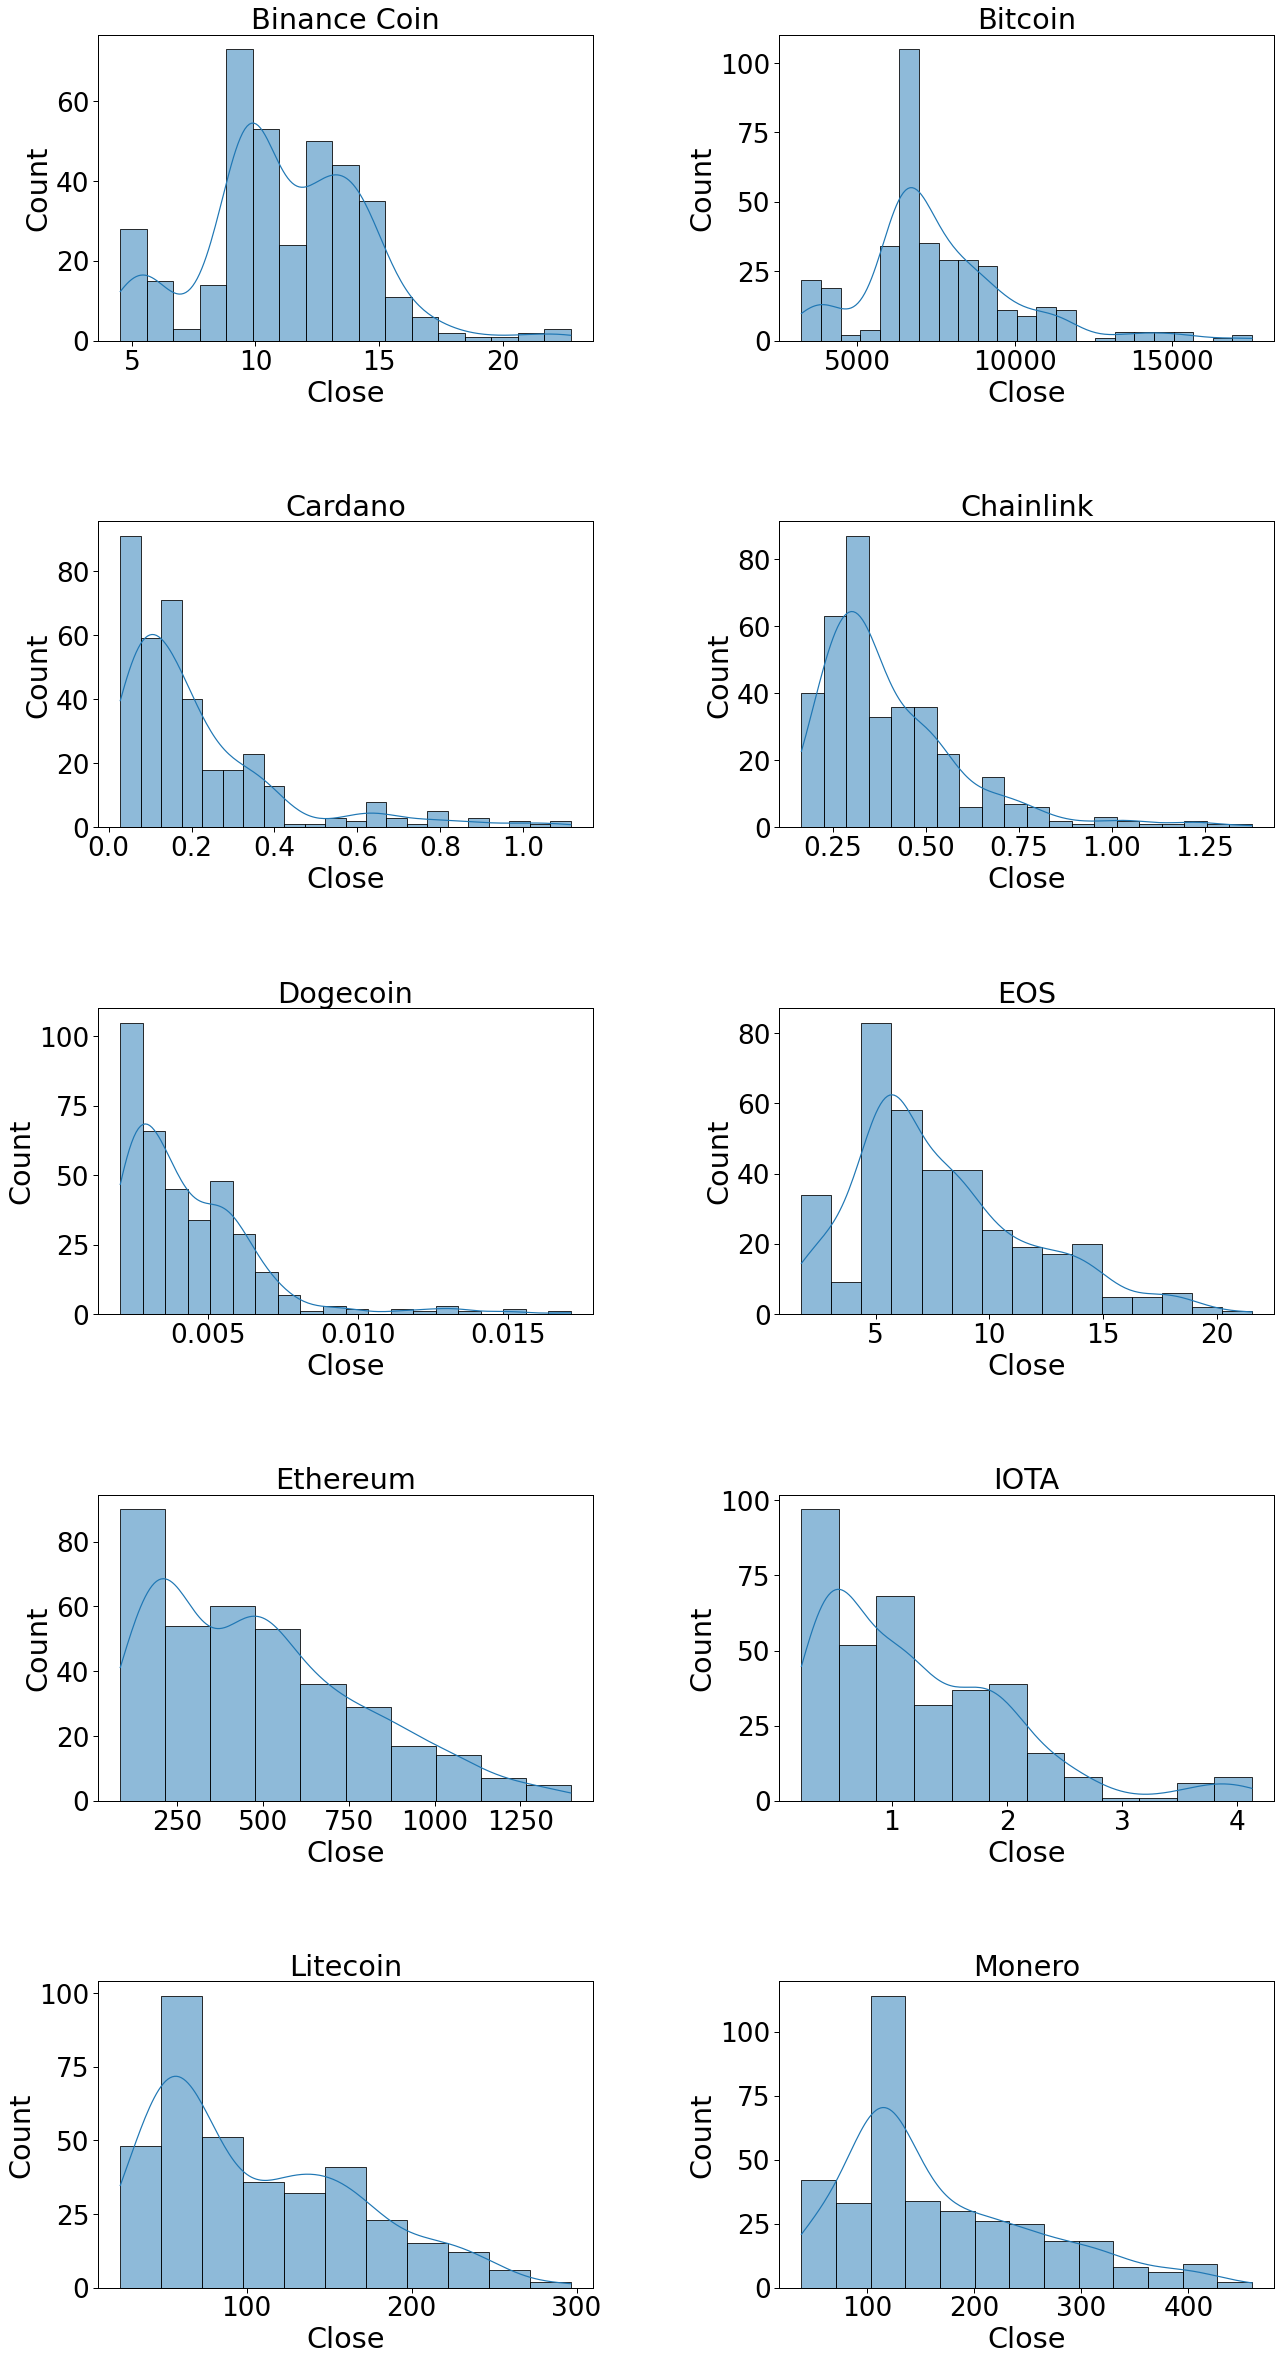

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Close"] , ax=subplot,kde=True)
    subplot.set_title(f"{crypto_name}")  
    plt.tight_layout(pad=3)
    
plt.show()

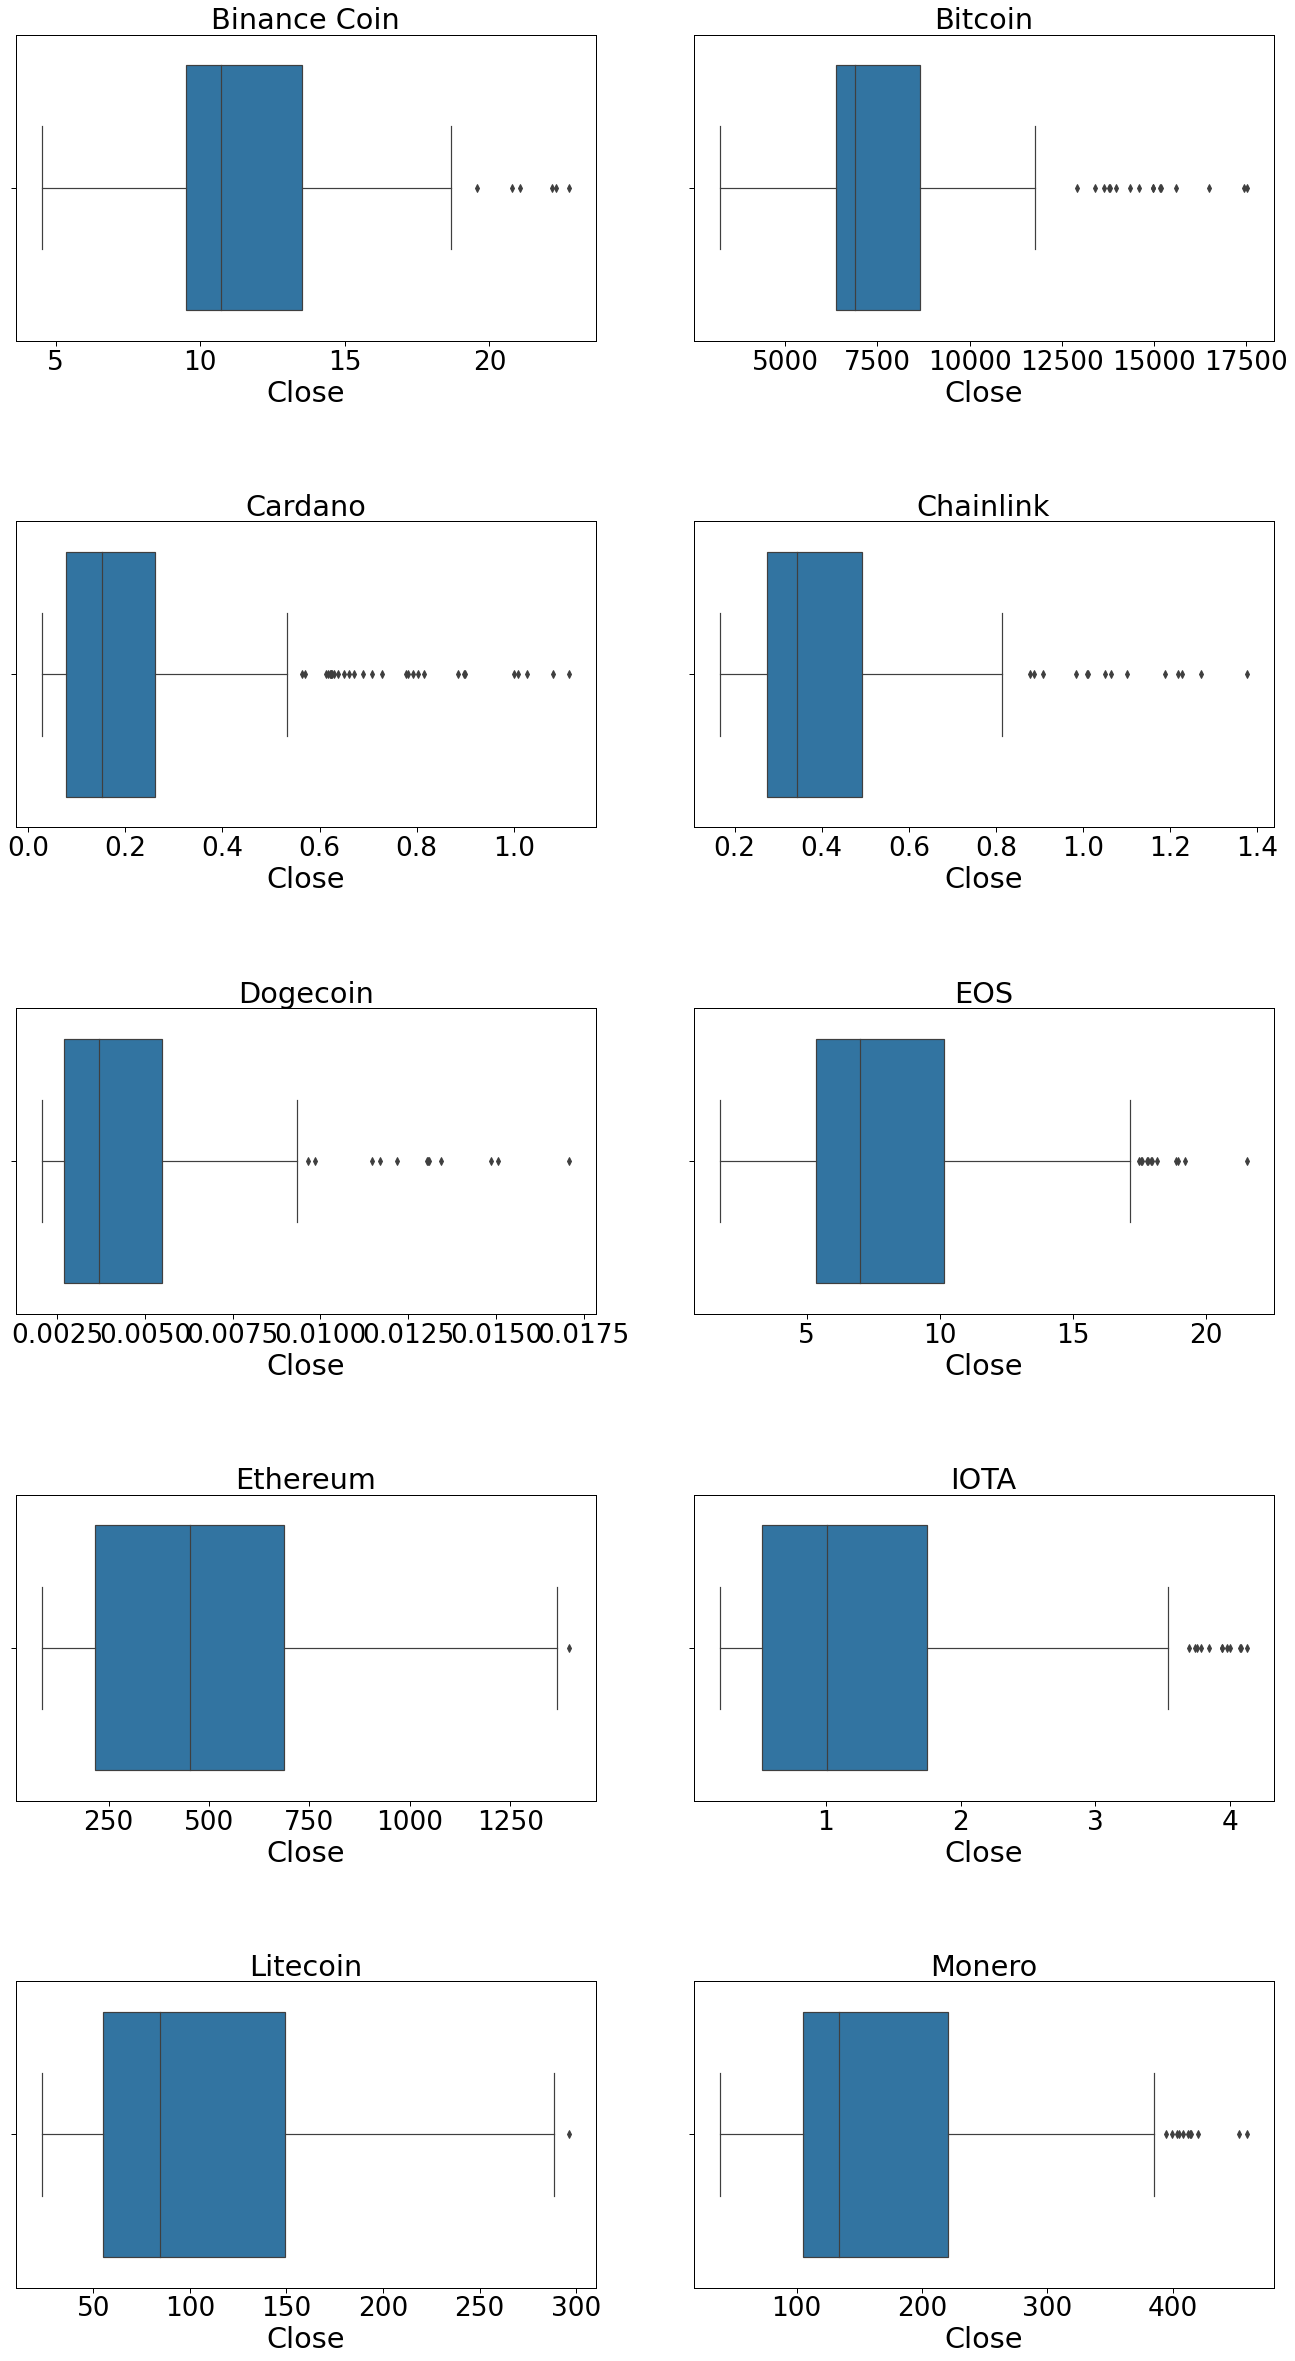

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Close"] , ax=subplot)
    subplot.set_title(f"{crypto_name}")    
    plt.tight_layout(pad=3)
    
plt.show()

In [ ]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable close ")
    print(data["Close"].describe())
    print("skewness of close : ",data["Close"].skew())
    print("kurtosis of variable close : ",data["Close"].kurt())
    print("_______________________________\n")

Binance Coin
general statistics for variable close 
count    365.000000
mean      11.172537
std        3.275480
min        4.528650
25%        9.512630
50%       10.702400
75%       13.529600
max       22.759800
Name: Close, dtype: float64
skewness of close :  0.2258667065594407
kurtosis of variable close :  0.6318785934456339
_______________________________

Bitcoin
general statistics for variable close 
count      365.000000
mean      7572.298943
std       2455.455469
min       3236.761645
25%       6385.620000
50%       6906.919922
75%       8668.120117
max      17527.000000
Name: Close, dtype: float64
skewness of close :  1.1144616118212447
kurtosis of variable close :  2.307536606825964
_______________________________

Cardano
general statistics for variable close 
count    365.000000
mean       0.209573
std        0.197482
min        0.028274
25%        0.078235
50%        0.150960
75%        0.260155
max        1.114120
Name: Close, dtype: float64
skewness of close :  2.15693412

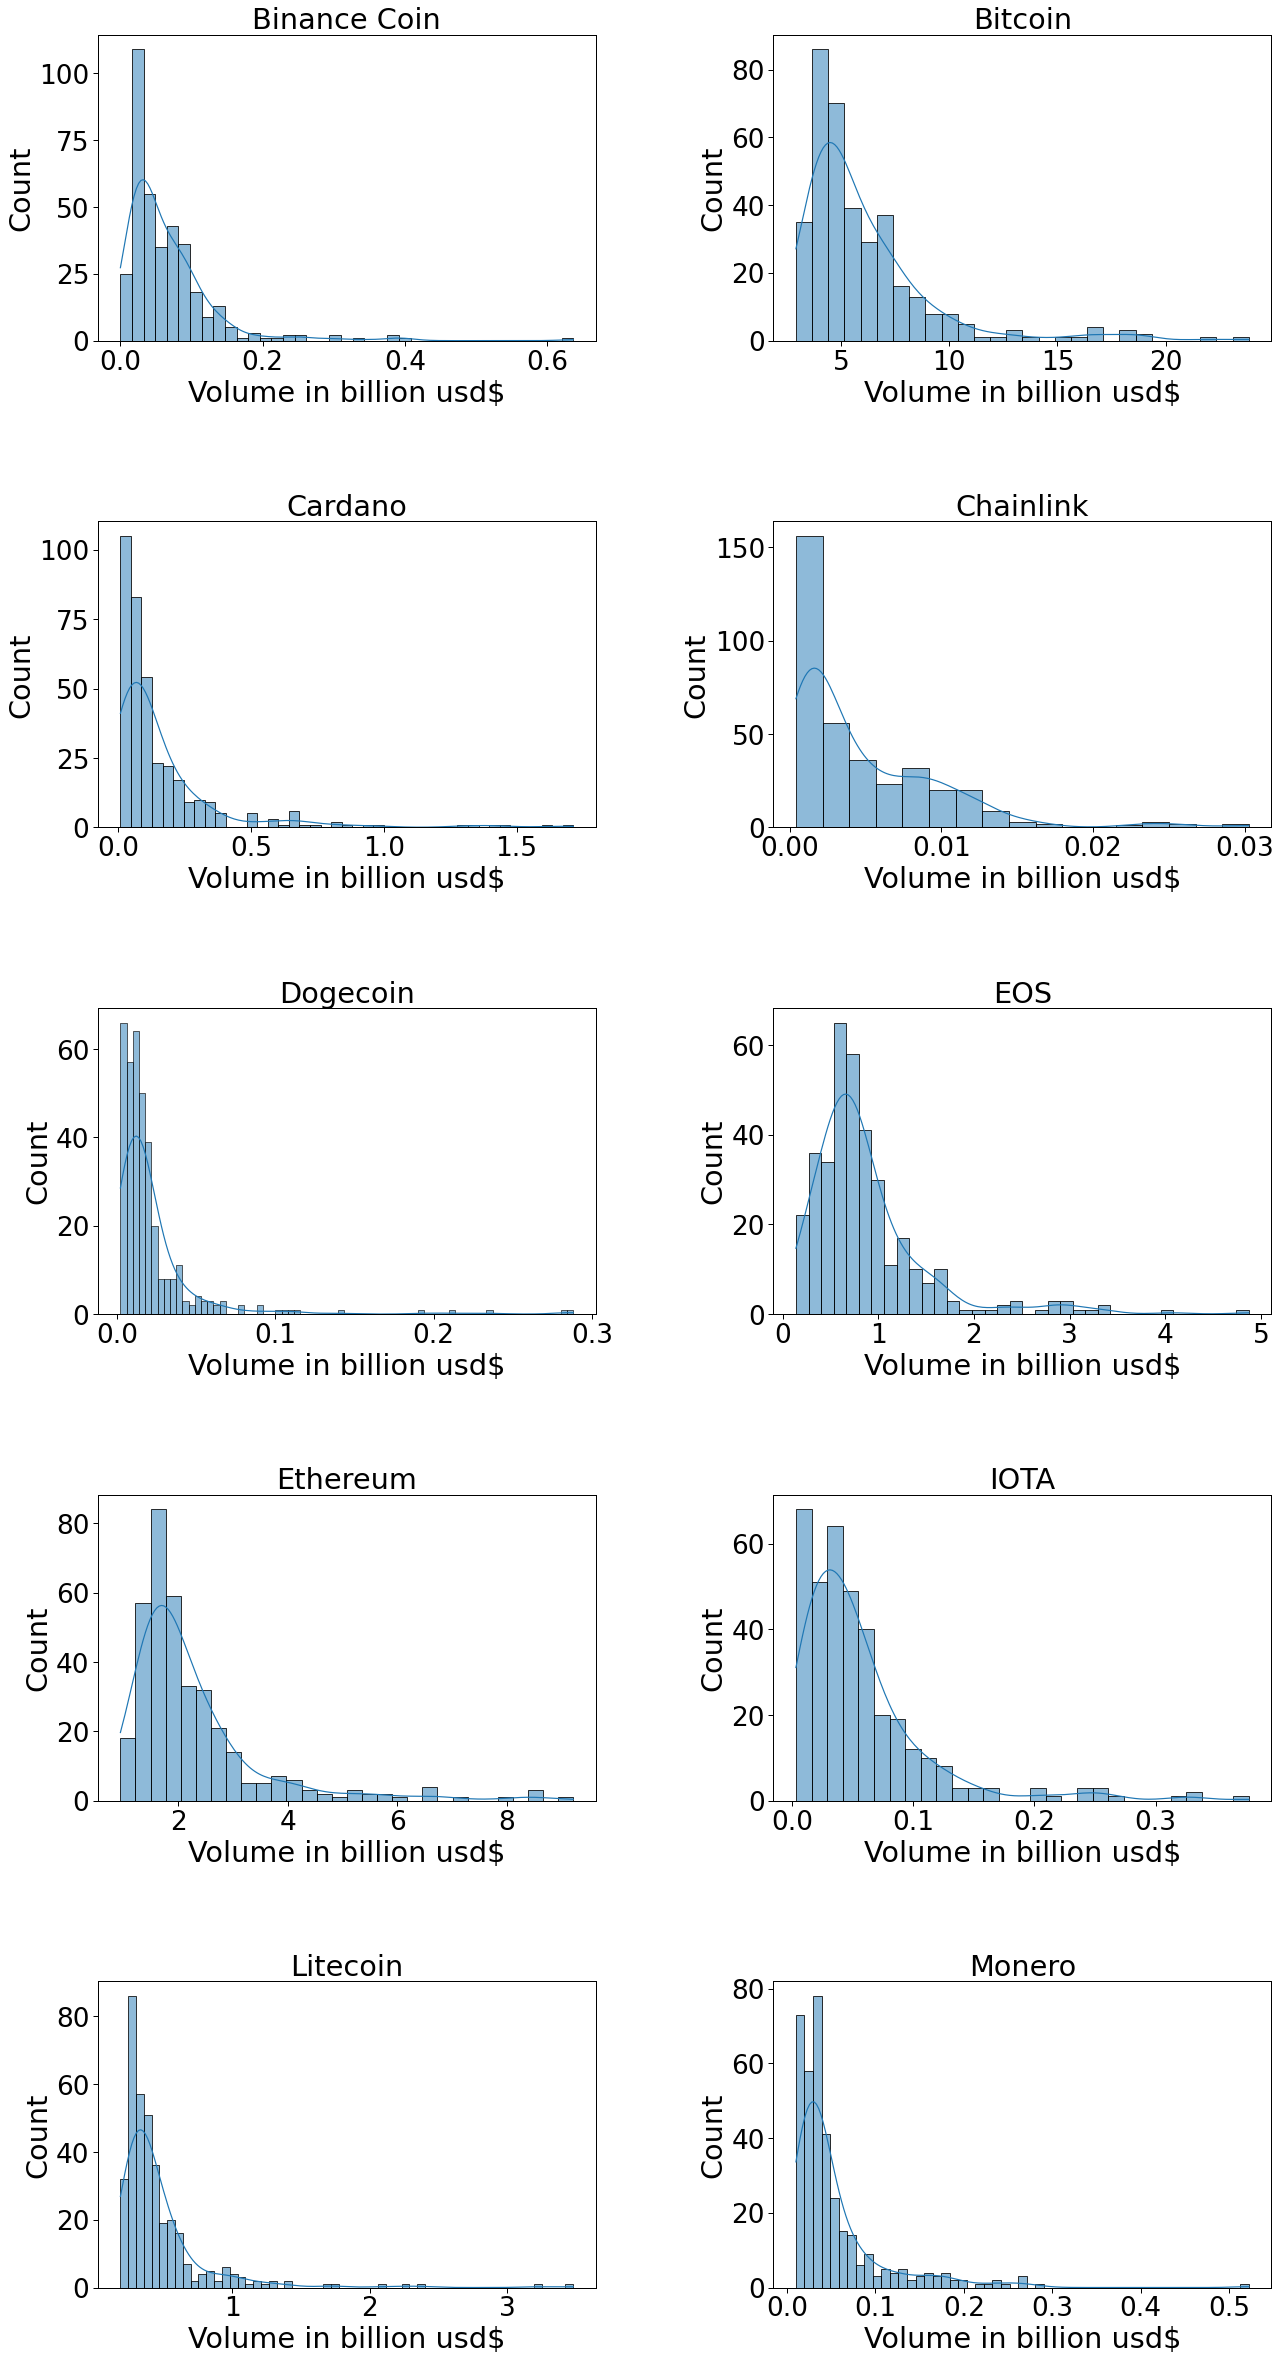

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Volume in billion usd$"] , ax=subplot,kde=True)
    subplot.set_title(f"{crypto_name}")   
    plt.tight_layout(pad=3)
    
plt.show()

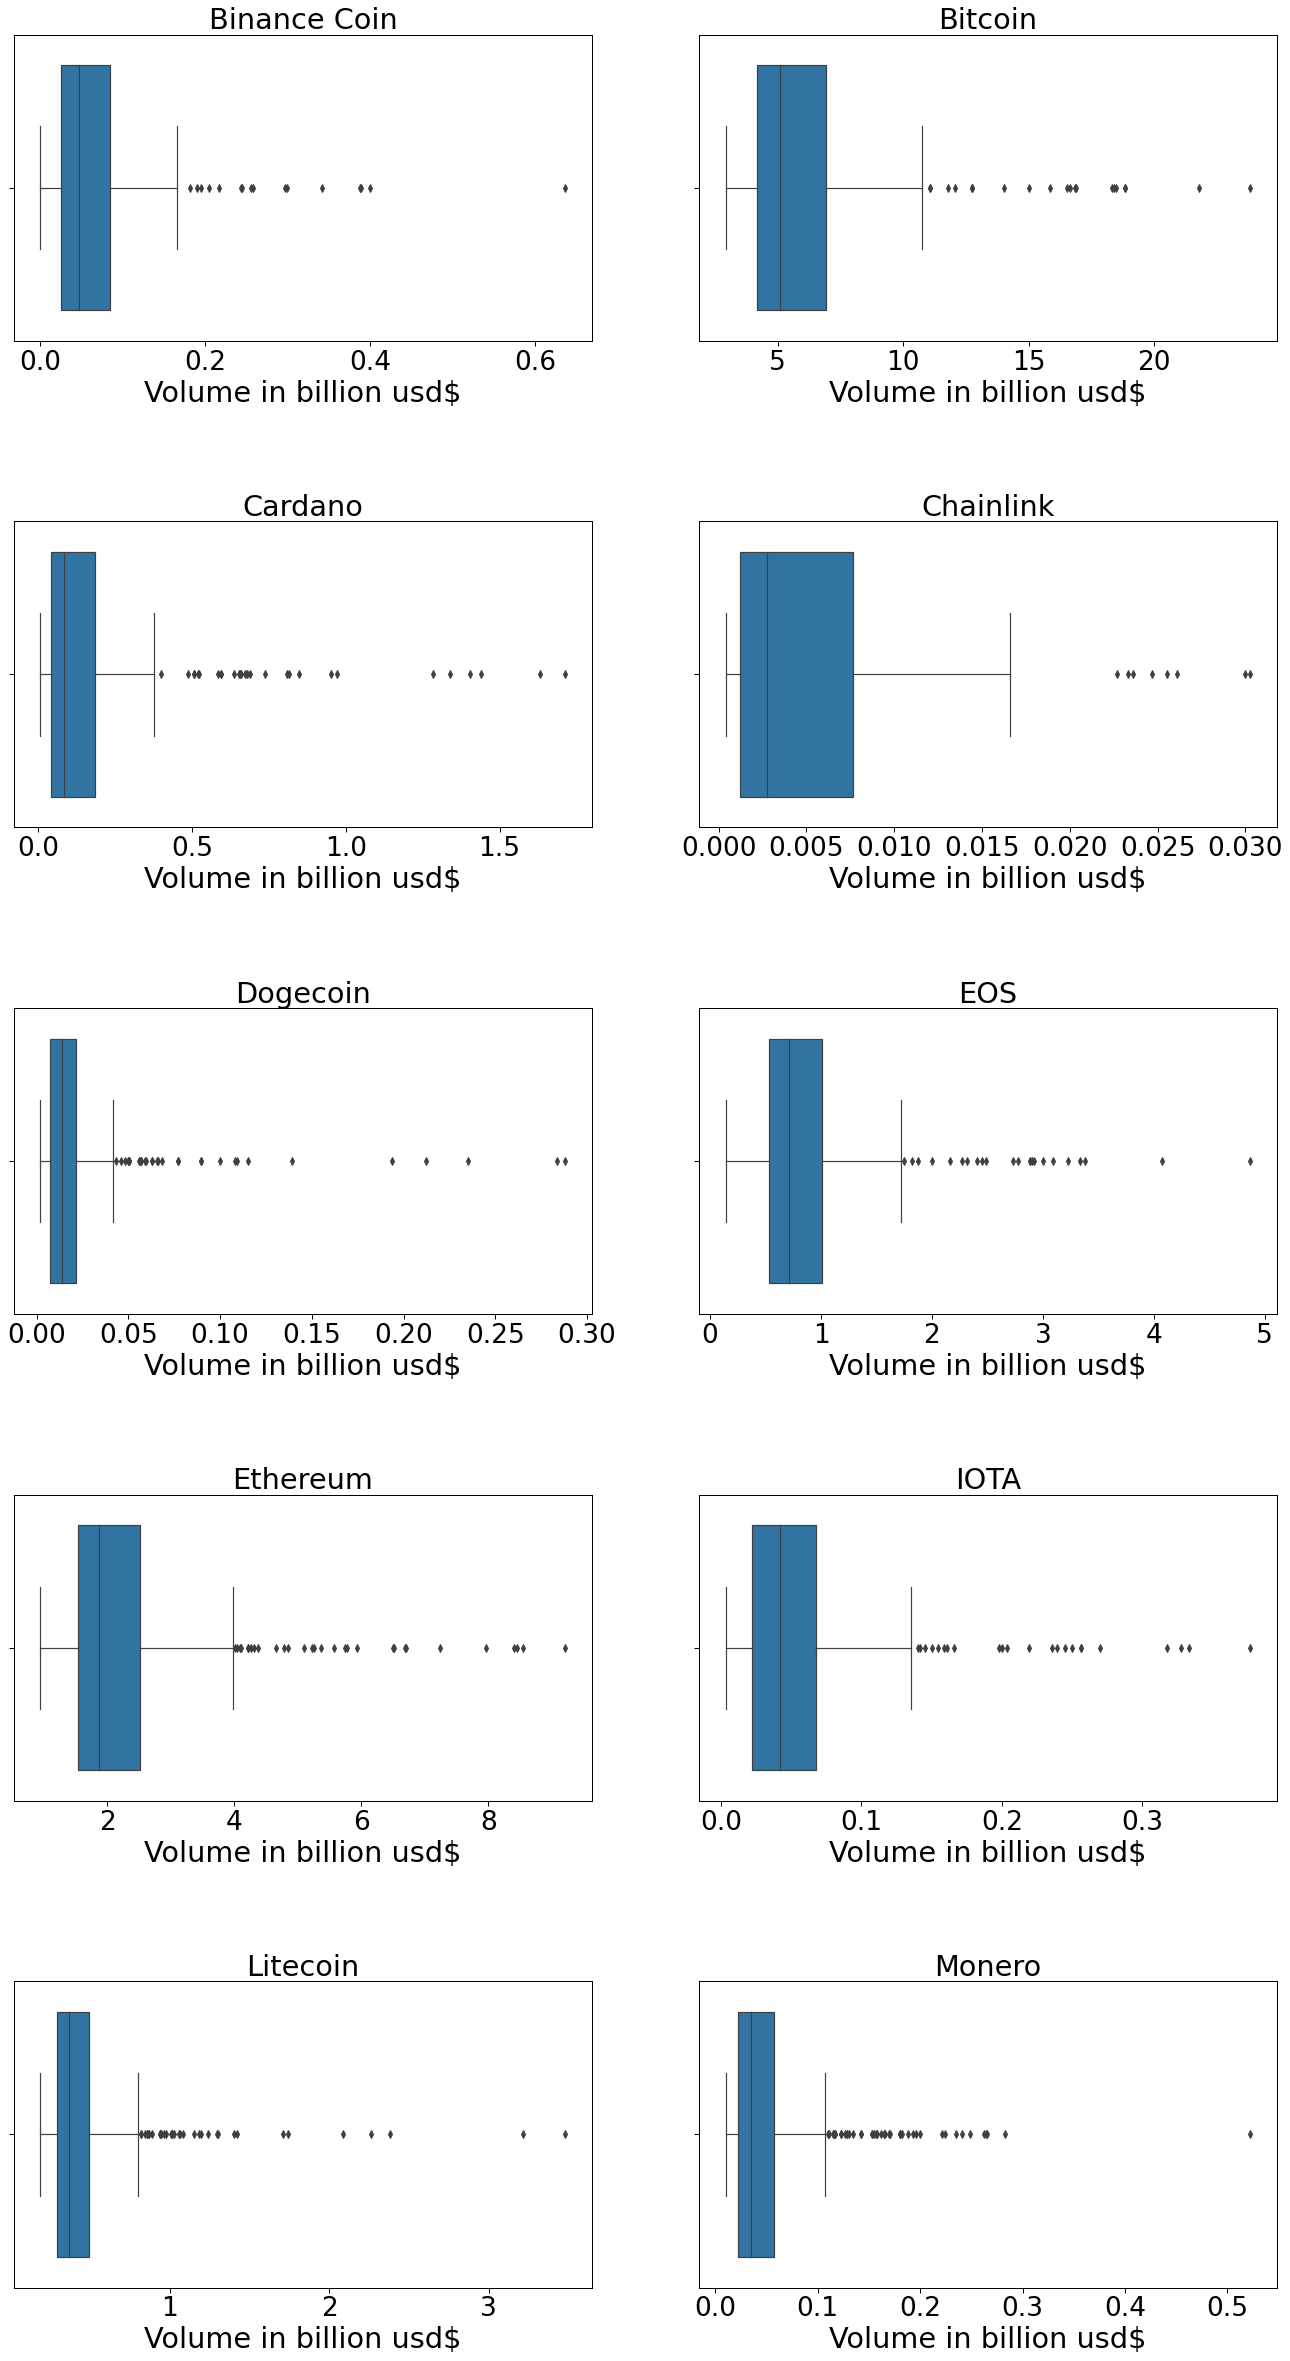

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Volume in billion usd$"] , ax=subplot)
    subplot.set_title(f"{crypto_name}")  
    plt.tight_layout(pad=3) 
    
plt.show()

In [ ]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable -volume_billion_usd$ ")
    print(data["Volume in billion usd$"].describe())
    print("skewness of volume : ",data["Volume in billion usd$"].skew())
    print("kurtosis of variable volume: ",data["Volume in billion usd$"].kurt())
    print("_________________________________\n")

Binance Coin
general statistics for variable -volume_billion_usd$ 
count    365.000000
mean       0.065848
std        0.065551
min        0.000009
25%        0.024761
50%        0.046800
75%        0.084009
max        0.637021
Name: Volume in billion usd$, dtype: float64
skewness of volume :  3.6610642855162028
kurtosis of variable volume:  21.163208762971657
_________________________________

Bitcoin
general statistics for variable -volume_billion_usd$ 
count    365.000000
mean       6.063552
std        3.085421
min        2.923670
25%        4.159680
50%        5.079810
75%        6.925190
max       23.840899
Name: Volume in billion usd$, dtype: float64
skewness of volume :  2.5980471365563864
kurtosis of variable volume:  8.482203389136707
_________________________________

Cardano
general statistics for variable -volume_billion_usd$ 
count    365.000000
mean       0.162666
std        0.236101
min        0.008388
25%        0.042076
50%        0.084282
75%        0.184250
max       

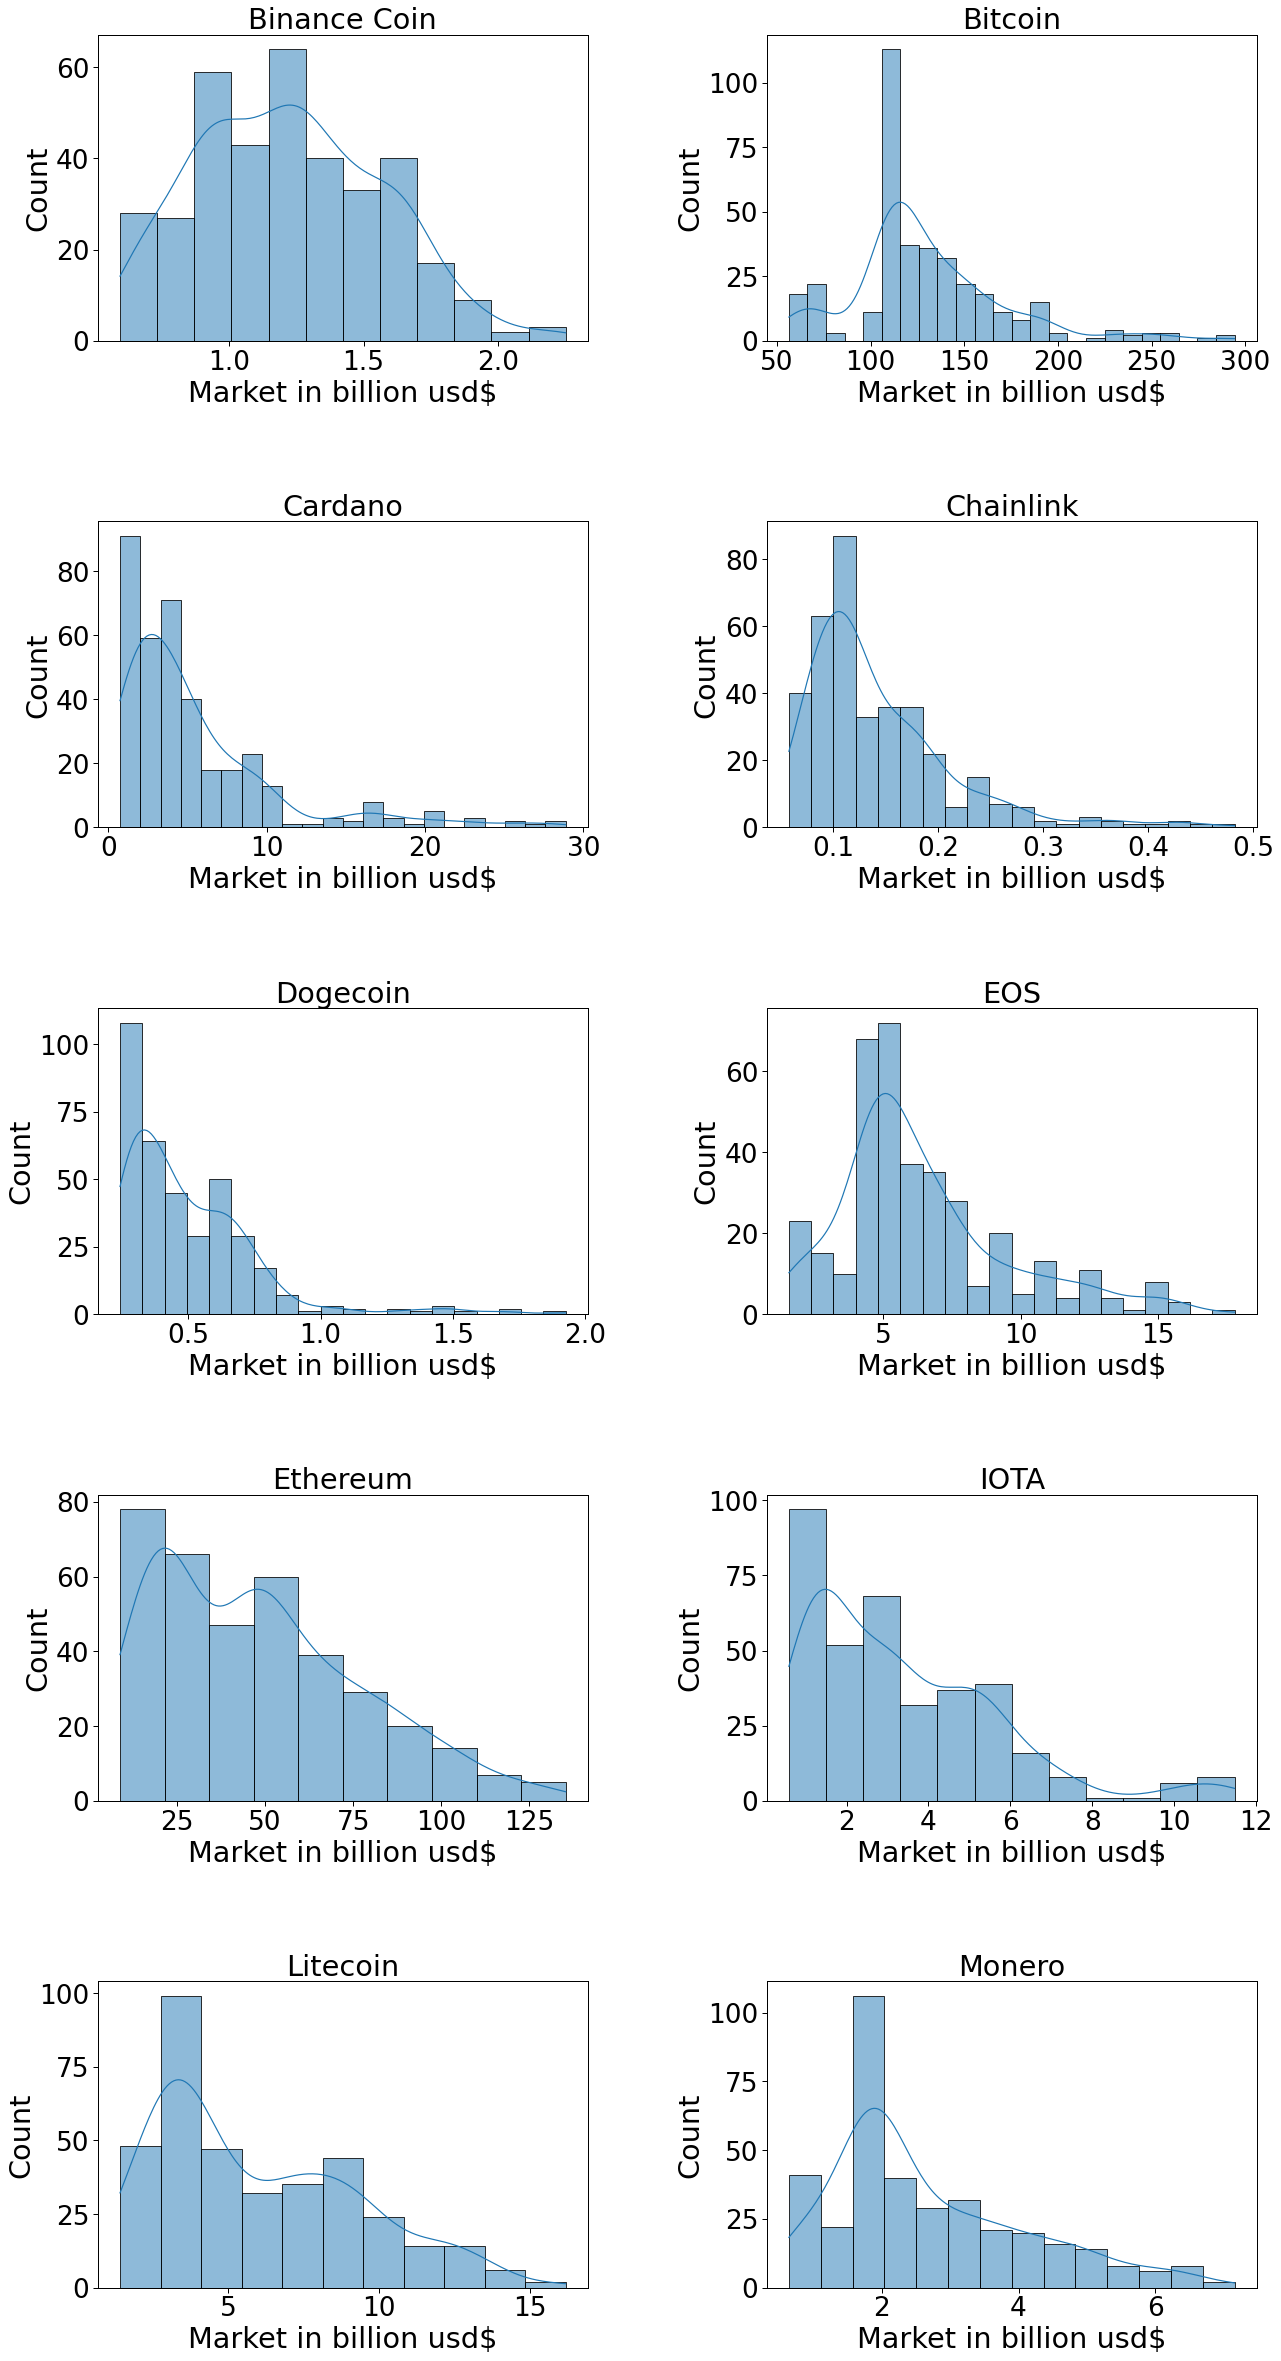

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.histplot(x=data["Market in billion usd$"] , ax=subplot,kde=True)
    subplot.set_title(f"{crypto_name}")   
    plt.tight_layout(pad=3)
    
plt.show()

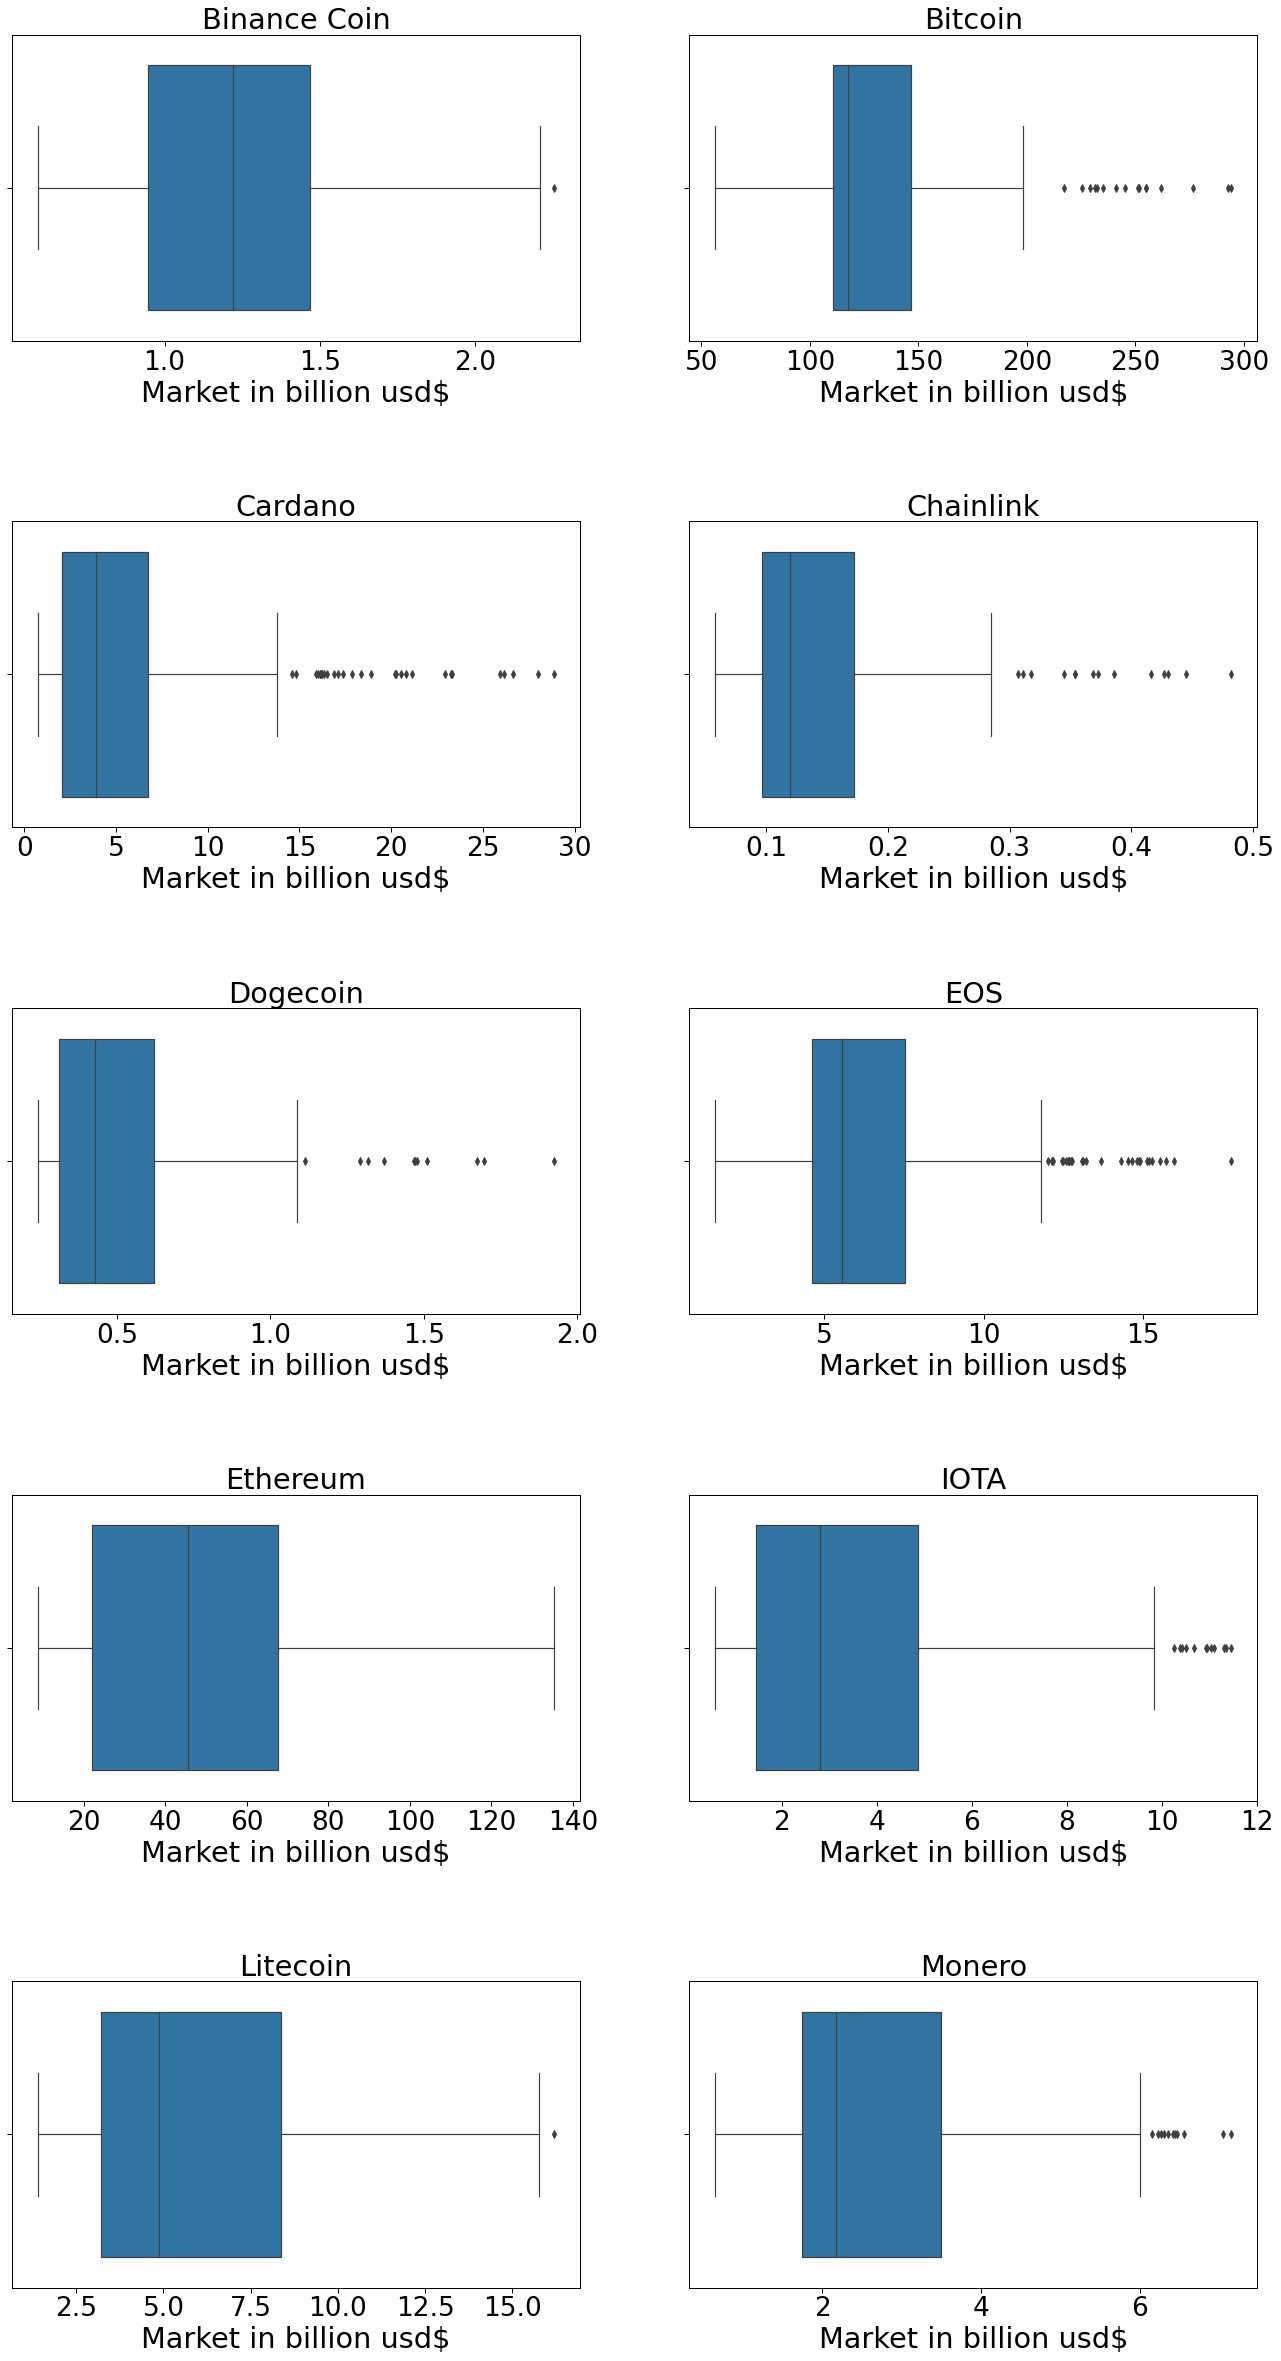

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    sns.boxplot(x=data["Market in billion usd$"] , ax=subplot)
    subplot.set_title(f"{crypto_name}")   
    plt.tight_layout(pad=3)  
    
plt.show()

In [ ]:
for data,crypto in zip(list_df,crypto_names):
    print(crypto)
    print("general statistics for variable Marketcap-market_billion_usd$ ")
    print(data["Market in billion usd$"].describe())
    print("skewness of volume : ",data["Market in billion usd$"].skew())
    print("kurtosis of variable volume: ",data["Market in billion usd$"].kurt())
    print("*************************")

Binance Coin
general statistics for variable Marketcap-market_billion_usd$ 
count    365.000000
mean       1.221110
std        0.344240
min        0.592344
25%        0.946298
50%        1.219637
75%        1.467303
max        2.253539
Name: Market in billion usd$, dtype: float64
skewness of volume :  0.30435415024867113
kurtosis of variable volume:  -0.42896176655249585
*************************
Bitcoin
general statistics for variable Marketcap-market_billion_usd$ 
count    365.000000
mean     129.267317
std       40.543483
min       56.400691
25%      110.494466
50%      117.506606
75%      146.818883
max      294.217424
Name: Market in billion usd$, dtype: float64
skewness of volume :  1.0955978014951178
kurtosis of variable volume:  2.3428533178096838
*************************
Cardano
general statistics for variable Marketcap-market_billion_usd$ 
count    365.000000
mean       5.433568
std        5.120153
min        0.733051
25%        2.028397
50%        3.913951
75%        6.7450

### **Bivariate Analysis**

Bivariate examination implies the investigation of the bivariate information. This is a solitary measurable examination that is utilized to figure out the relationship that exists between two worth sets. The factors that are involved are X and Y.

The outcomes that are gotten from the bivariate examination are put away in an information table that has two sections. Bivariate investigation ought not be mistaken for two example information examination where the x and y factors are not related straightforwardly.

The sort of bivariate examination is subject to the sort of qualities and factors that is utilized to break down the information. The factors might be ordinal, downright, or numeric. The free factor is downright similar to a brand of a pen. For this situation, probit relapse or logit relapse is utilized. On the off chance that the reliant and the free factors are both ordinal which implies that they have a positioning or position then the position relationship coefficient is estimated.

price-trend of cryptocurrencies over past 12 months from jan-2018 to dec-2018
close price trends ---for all 10 coins :
we plot the closing price (adjusted) of the cryptos over the period of past 12 months
to get a general idea of how the cryptocurrencies performed in the given period.

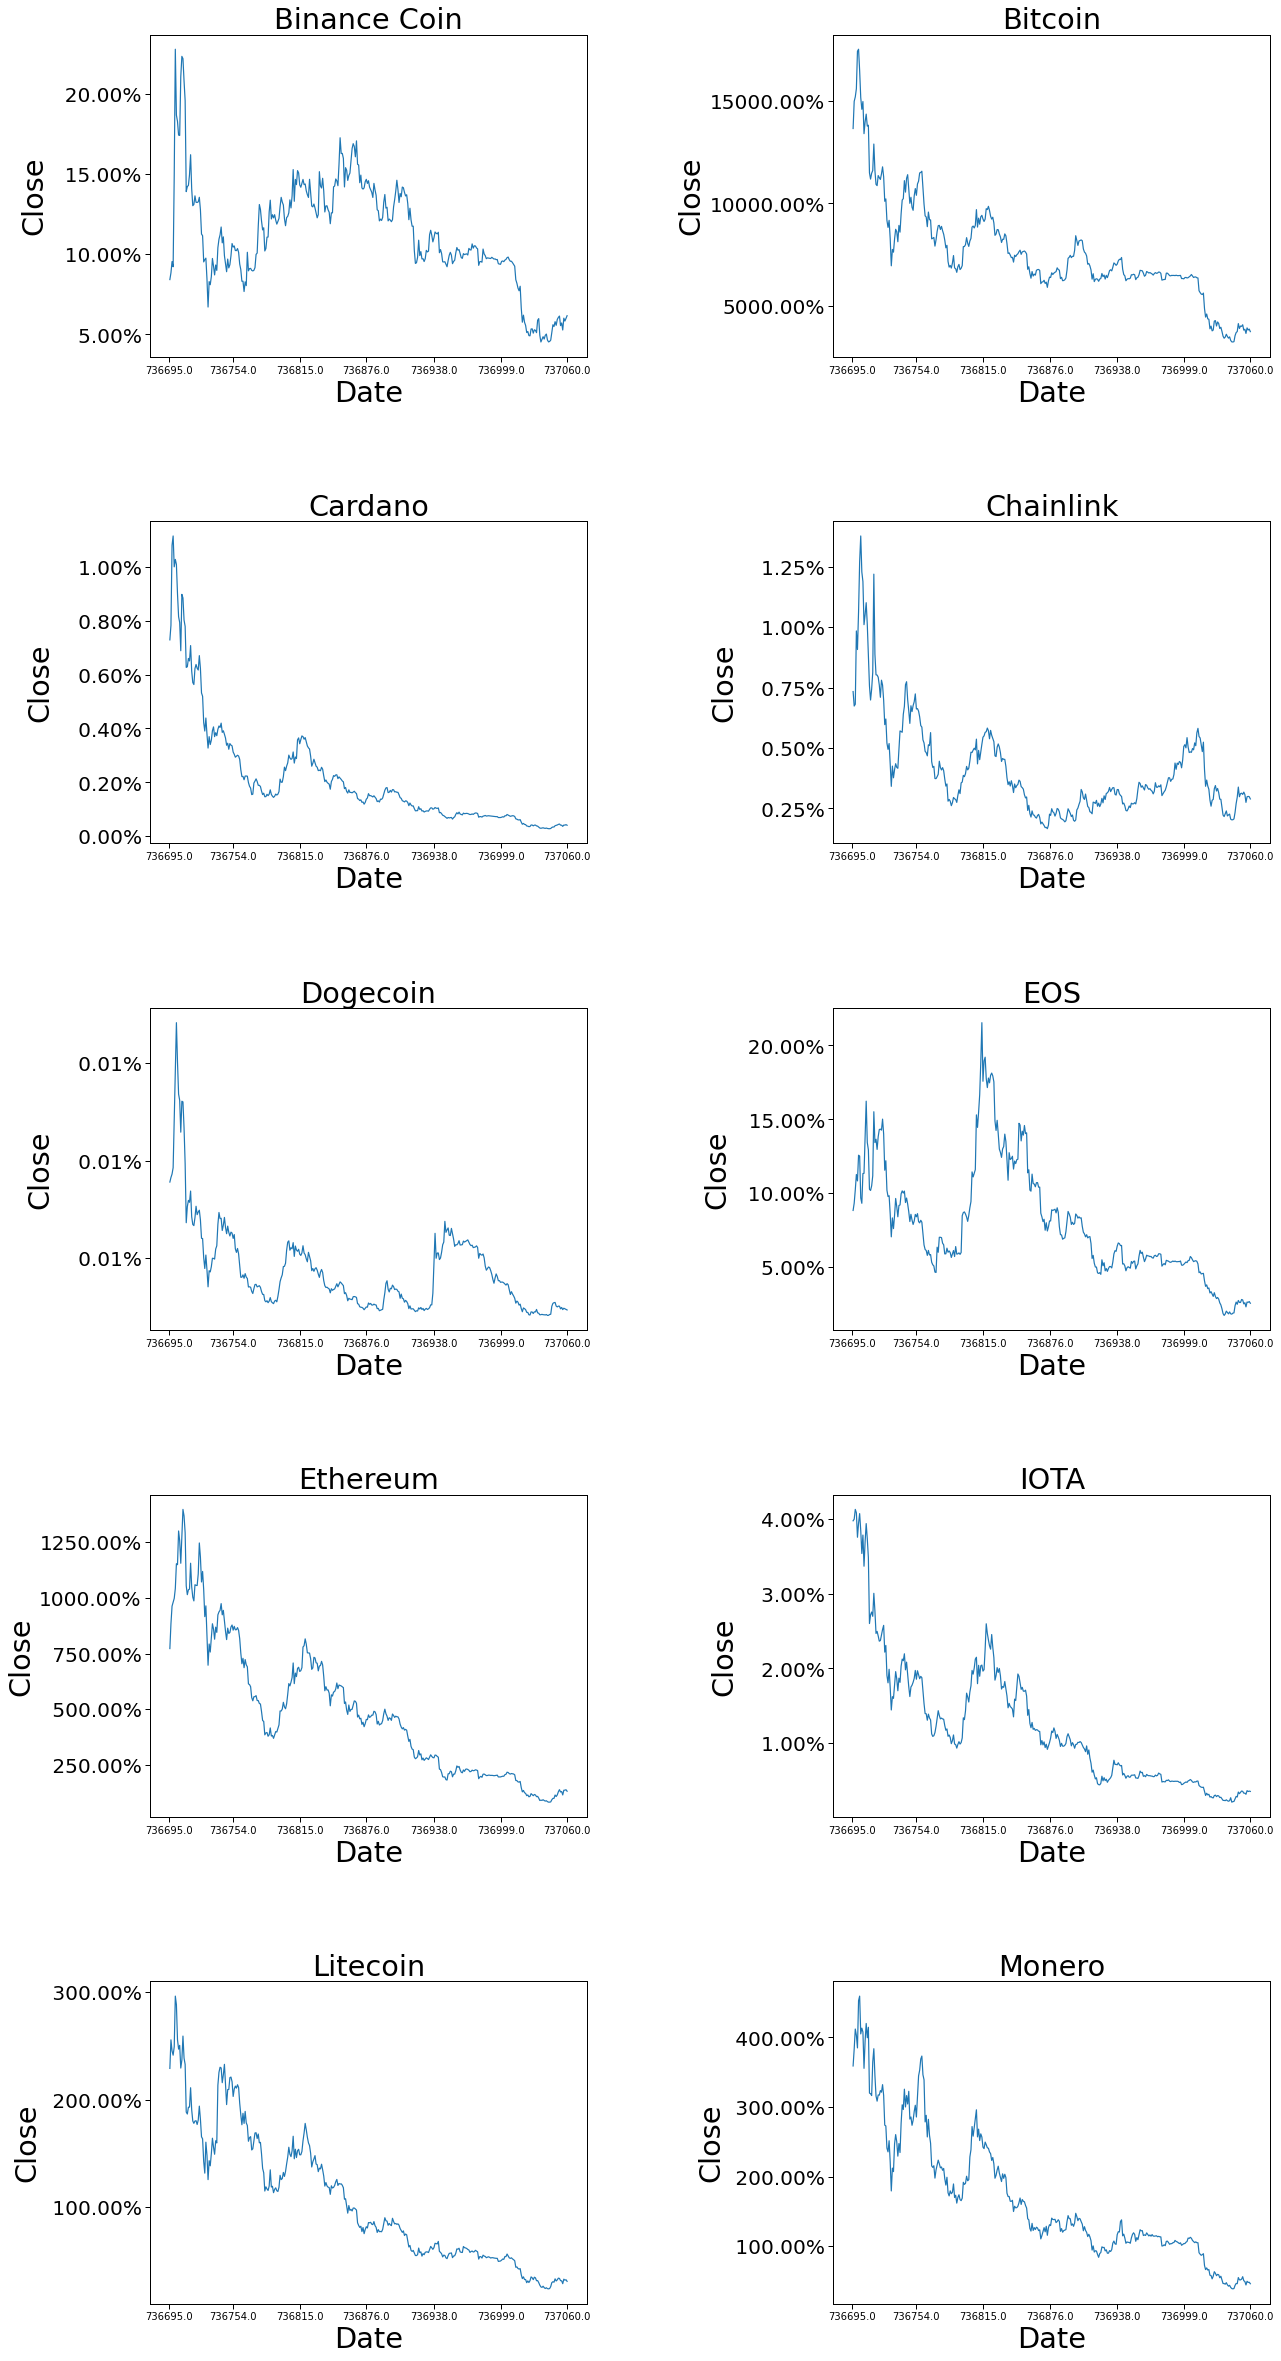

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    data["Date"] = pd.to_datetime(data["Date"],format="%d-%m-%Y")
    plot = sns.lineplot(x=data["Date"] ,y=data["Close"], ax=subplot)
    yticks = plot.get_yticks()
    plot.set_yticklabels(yticks, size = 20)
    plot.set_xticklabels(plot.get_xticks(), size = 10)
    plot.set_yticklabels(['{:7.2f}%'.format(x*1) for x in yticks])
    subplot.set_title(f"{crypto_name}")
    plt.tight_layout(pad=3)
    
plt.show()

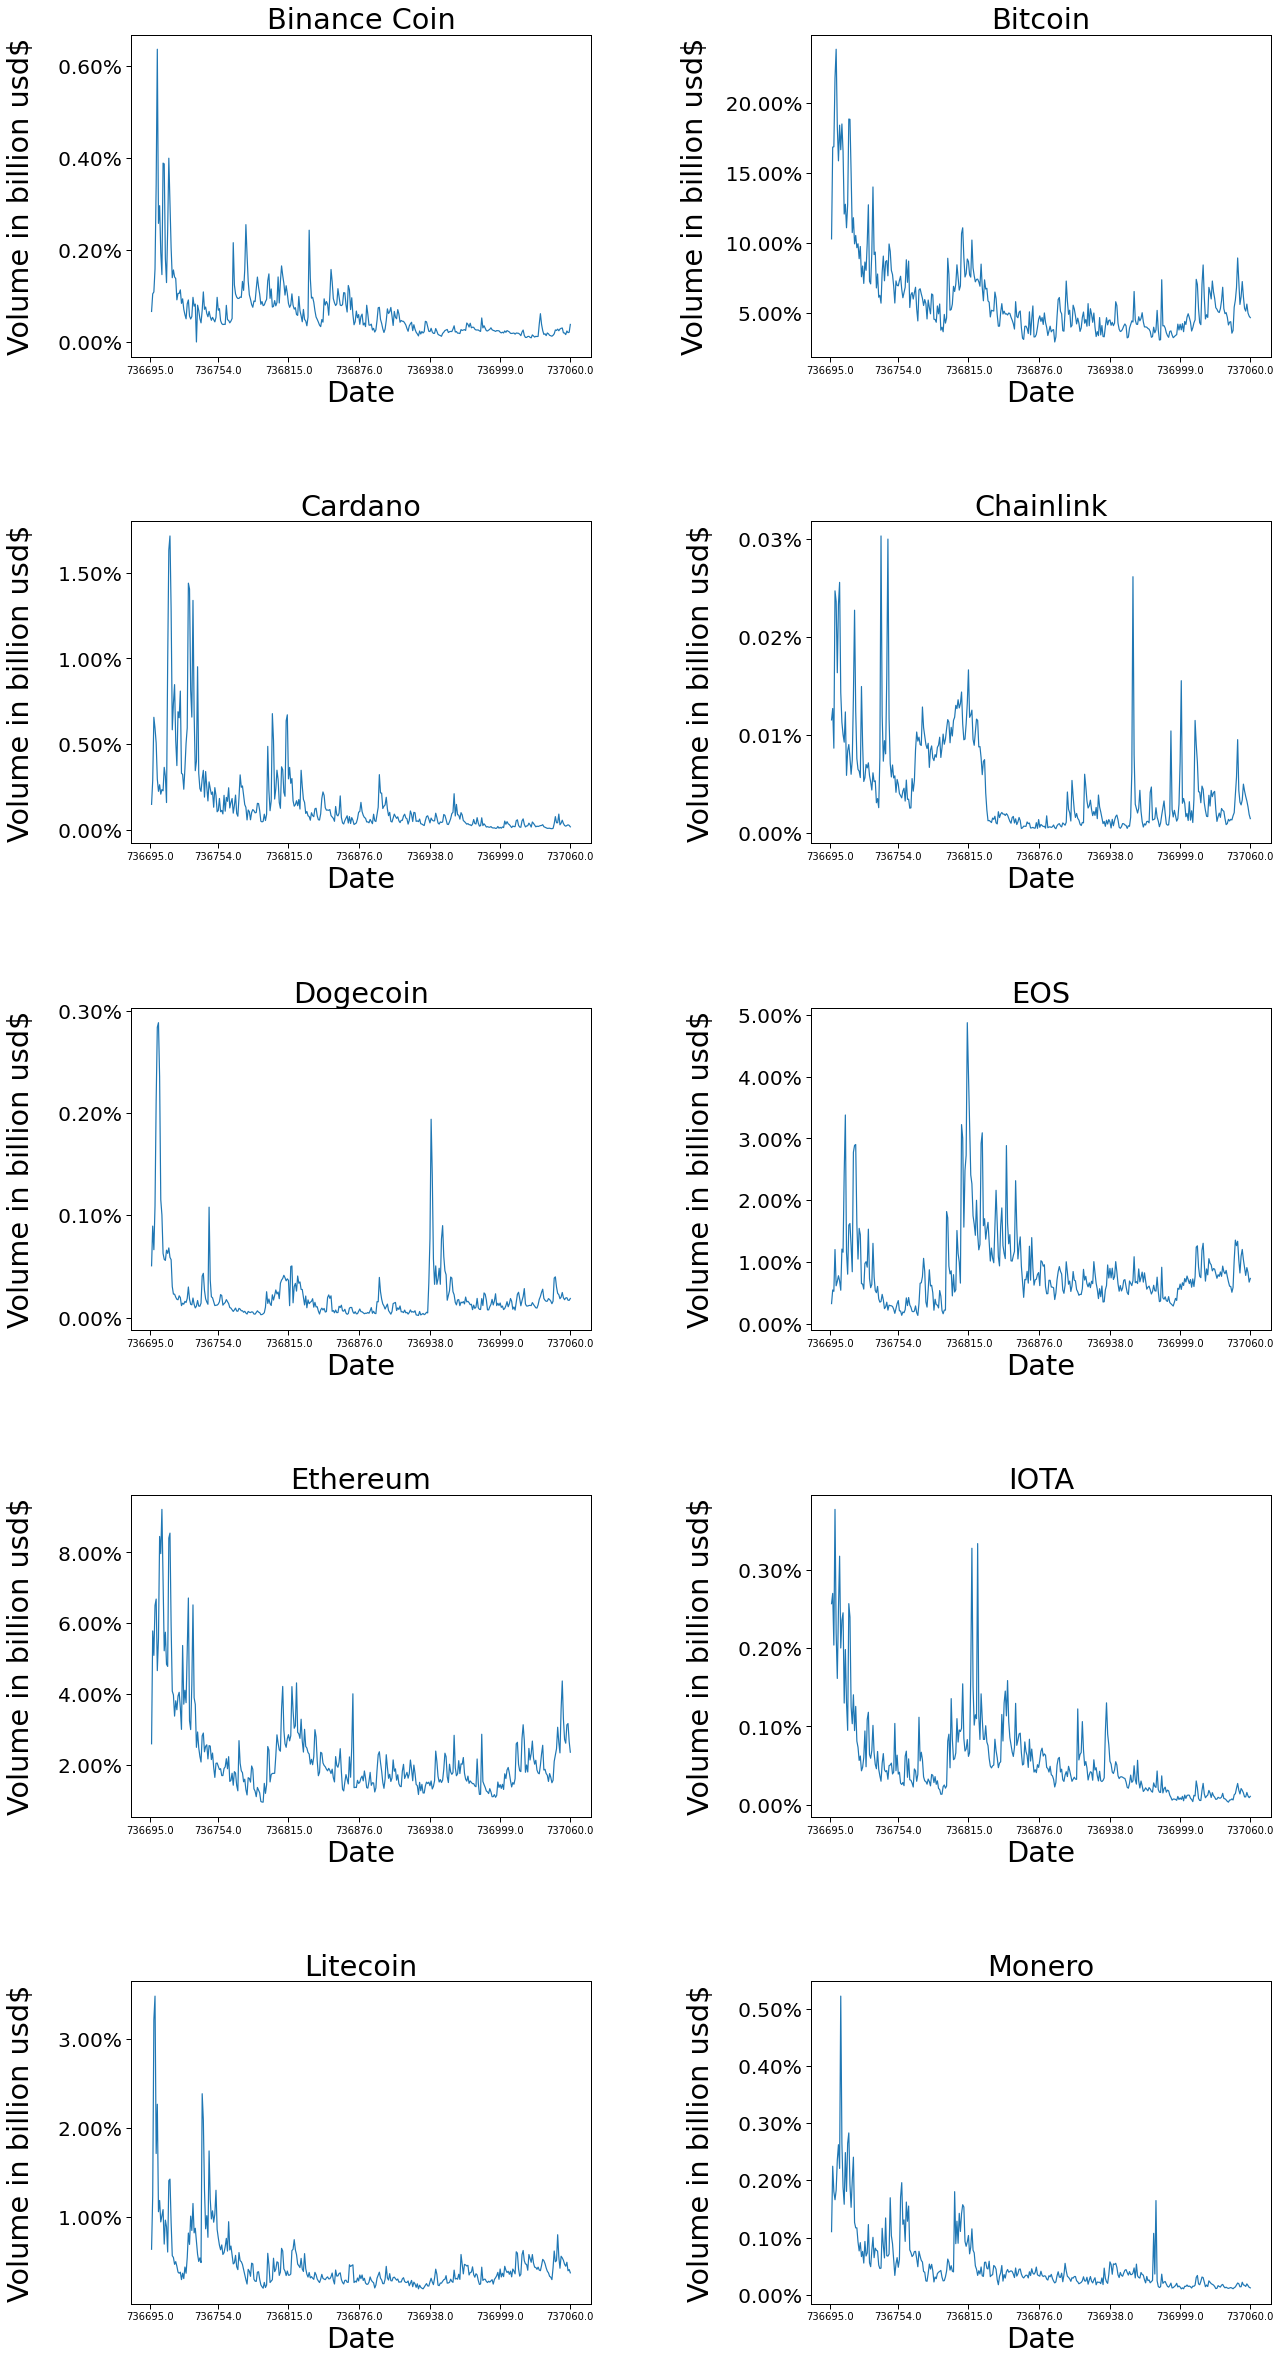

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 35))
for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    plot = sns.lineplot(x=data["Date"] ,y=data["Volume in billion usd$"], ax=subplot)
    subplot.set_title(f"{crypto_name}")
    yticks = plot.get_yticks()
    plot.set_yticklabels(yticks, size = 20)
    plot.set_xticklabels(plot.get_xticks(), size = 10)
    plot.set_yticklabels(['{:7.2f}%'.format(x*1) for x in yticks])
    plt.tight_layout(pad=3)
plt.show()

### Trend Analysis

We wish to see how the cryptocurrencies were trending in past 12 months from 1st Jan 2018 to 31st Dec 2018.
This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred.

We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category. For this, we’ll use the groupby() function with the trend column to aggregate all days with the same trend into a single group before plotting the pie chart.

**Visualizing Trend Frequency with Pie-Chart**

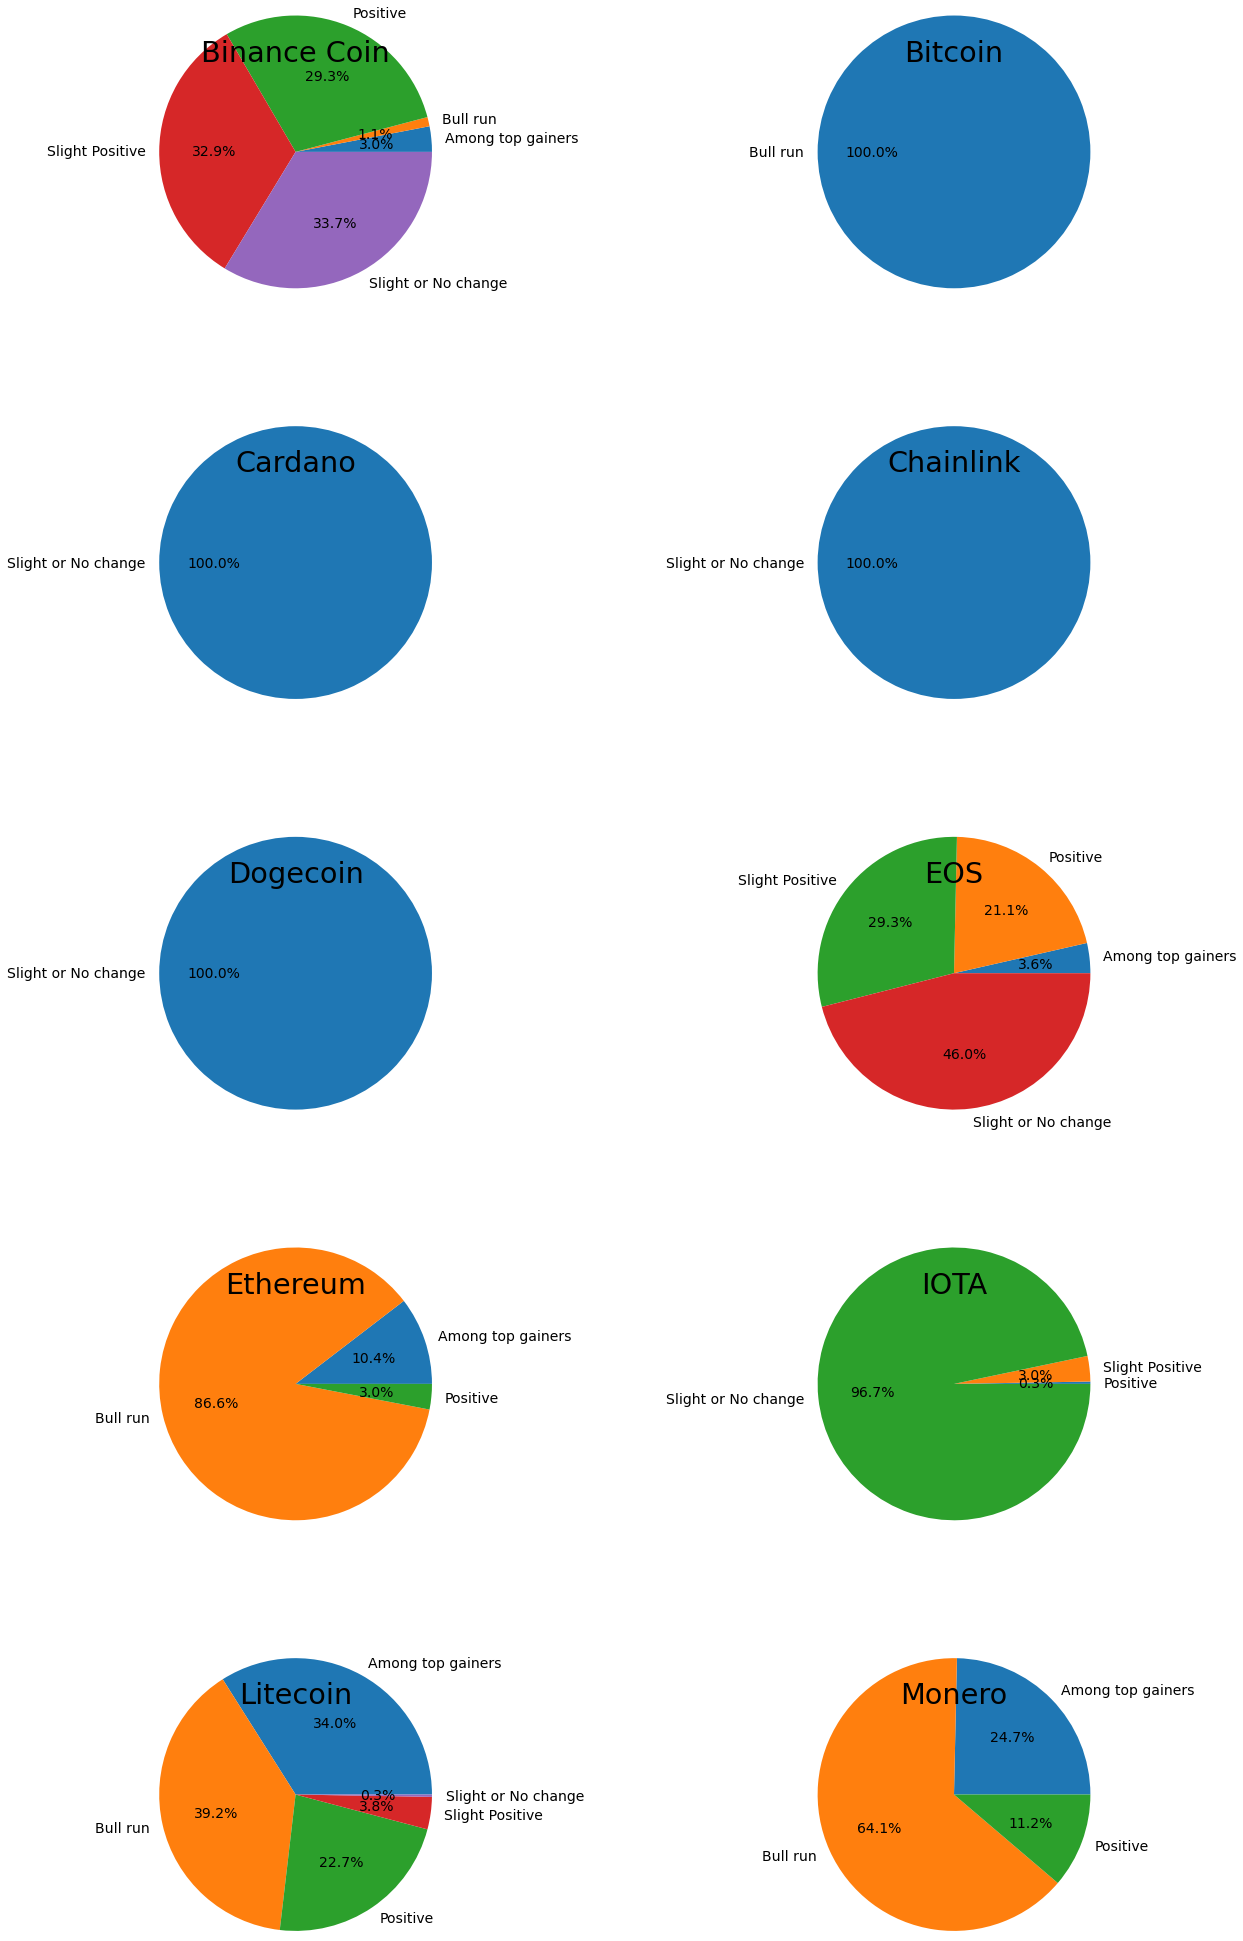

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols= 2, figsize=(20, 30))


for data, subplot ,crypto_name in zip(list_df, ax.flatten(),crypto_names):
    pie_data_bitcoin = data.groupby('Trend')
    
    pie_label = sorted([i for i in data.loc[:, 'Trend'].unique()])
    
    subplot.pie(pie_data_bitcoin['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2, textprops={'fontsize': 14})

    subplot.set_title(f"{crypto_name}",loc="center")
    
    plt.tight_layout(pad=4)
  

 
plt.show()
plt.tight_layout(pad=8)

### Encoding the data
Here we encoded the data into labels from the scikit learn preprocessing library method.

In [ ]:
from sklearn.preprocessing import LabelEncoder
others = df_crypto.select_dtypes('object').columns
others

Index(['Name', 'Symbol'], dtype='object')

We separated out the categorical features to be able to encod

In [ ]:
no_use = []
for col in df_crypto.columns:
    if(len(data[col].unique())==1):
        no_use.append(col)
no_use   

['Name', 'Symbol']

We separated out the binary features for one hot encoding.

**One Hot Encoding** - If there is two features present it makes it in the form of 0 and 1

In [ ]:
binaryfeatures= []
for col in df_crypto.select_dtypes('object').columns:
    if(len(df_crypto[col].unique()) ==2):
        binaryfeatures.append(col)
        
binaryfeatures

[]

### Grouping the Data
Top 10 cryptocurrencies in 2021 date range from 1st Jan 2018 to 31st Dec 2018

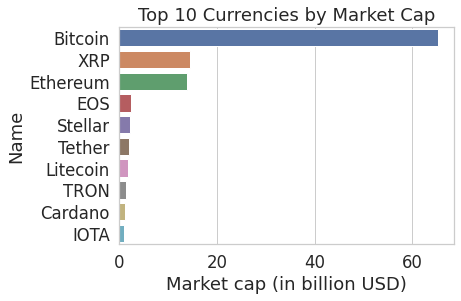

In [ ]:
sns.set_style(style="darkgrid")
grouped_data = df_crypto.groupby(['Name'])['Market in billion usd$'].last().sort_values(ascending=False).head(10).sort_values(ascending=False)
grouped_data=pd.DataFrame(grouped_data)
grouped_data=grouped_data.reset_index()
sns.set(style="whitegrid", font_scale=1.5)
sns.barplot(x="Market in billion usd$",y="Name",data=grouped_data)
plt.xlabel("Market cap (in billion USD)")


plt.title("Top 10 Currencies by Market Cap")
plt.show()

In [ ]:
grouped_data

Name  Market in billion usd$
0   Bitcoin               65.331499
1       XRP               14.388351
2  Ethereum               13.886838
3       EOS                2.326269
4   Stellar                2.161590
5    Tether                1.884199
6  Litecoin                1.822505
7      TRON                1.254466
8   Cardano                1.064642
9      IOTA                0.991083

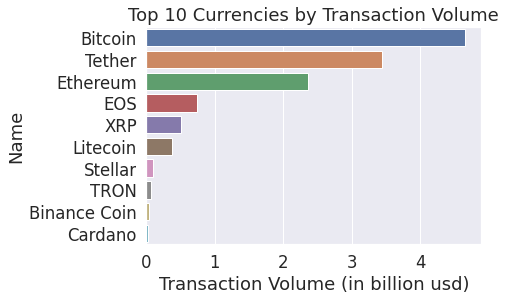

In [ ]:
sns.set_style(style="darkgrid")
grouped_data_2= df_crypto.groupby(['Name'])['Volume in billion usd$'].last().sort_values(ascending=False).head(10).sort_values(ascending=False)
grouped_data_2=pd.DataFrame(grouped_data_2)
grouped_data_2=grouped_data_2.reset_index()
sns.barplot(y="Name",x="Volume in billion usd$",data=grouped_data_2)

plt.xlabel("Transaction Volume (in billion usd)")
plt.title("Top 10 Currencies by Transaction Volume")
plt.show()

In [ ]:
grouped_data_2

Name  Volume in billion usd$
0       Bitcoin                4.661841
1        Tether                3.447514
2      Ethereum                2.358360
3           EOS                0.737956
4           XRP                0.501794
5      Litecoin                0.367746
6       Stellar                0.101118
7          TRON                0.065808
8  Binance Coin                0.038216
9       Cardano                0.019280

**Monthly end closing prices for all 10 cryptocurrencies**

In [ ]:
def plot_with_textvalue(df):
    ax=plt.barh(df[""],df[""])
    ax.set_ylabel("Yearly closing prices (in USD)")

    for rect in ax.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d$' % int(height), ha='center')

In [ ]:
import datetime

new_data = df_crypto.copy()
new_data["Month_Name"]=new_data["Date"].apply(lambda x:x.strftime("%B"))

In [ ]:
new_group = new_data.groupby(["Name","Month_Name"])["Close"].last().reset_index()

Name Month_Name      Close  month_number
0    Binance Coin      April  14.312100             4
1    Binance Coin     August  11.013800             8
2    Binance Coin   December   6.164732            12
3    Binance Coin   February  10.438200             2
4    Binance Coin    January  11.145000             1
..            ...        ...        ...           ...
175           XRP      March   0.512353             3
176           XRP        May   0.612622             5
177           XRP   November   0.362455            11
178           XRP    October   0.448382            10
179           XRP  September   0.581572             9

[180 rows x 4 columns]

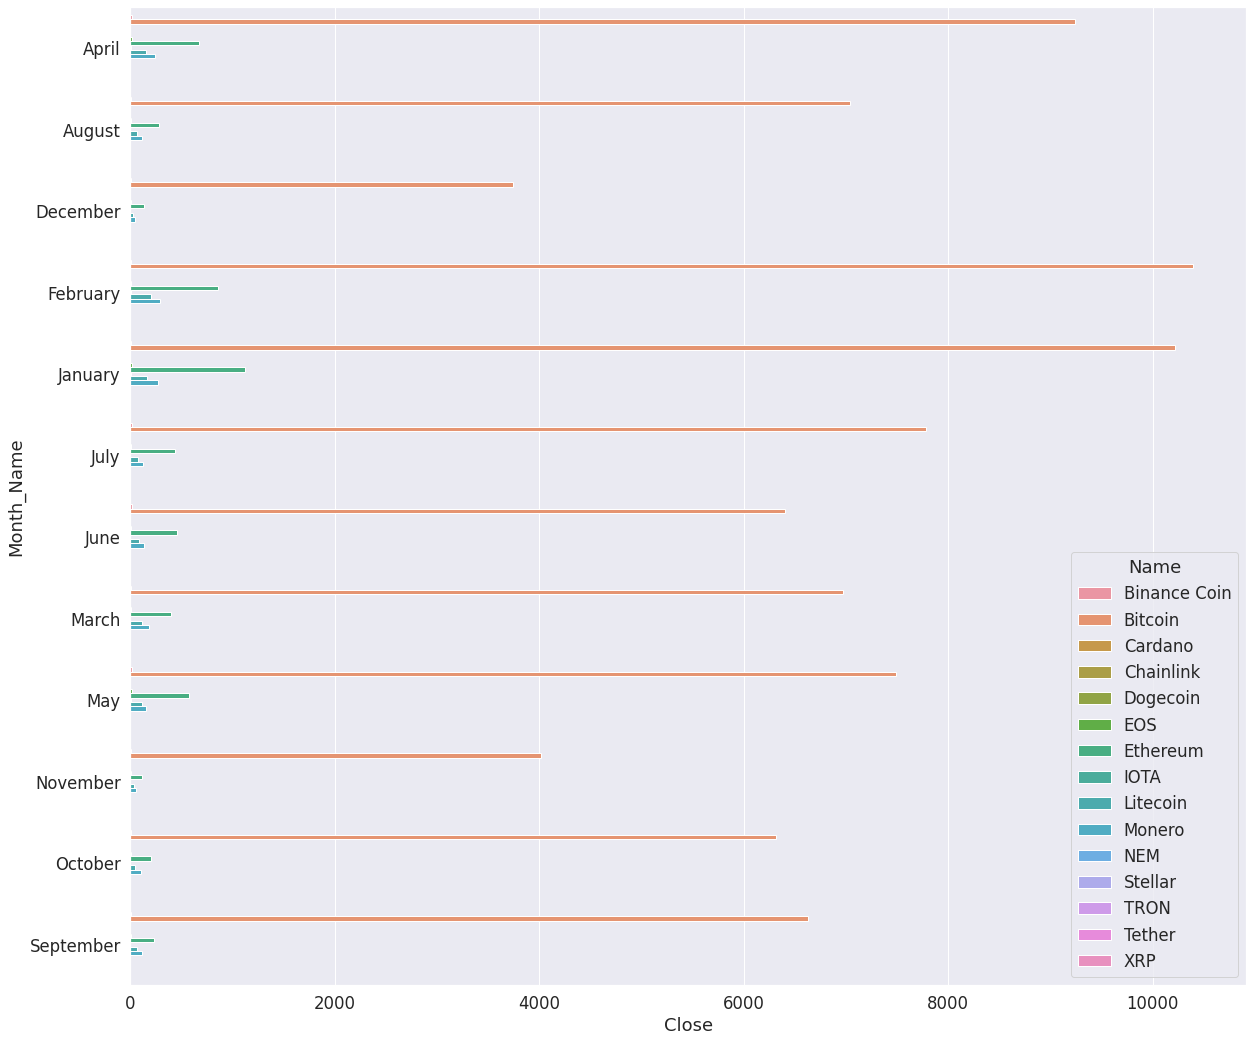

In [ ]:
plt.figure(figsize=(20,18))
sns.barplot(x="Close",y="Month_Name",data=new_group,hue="Name",orient="h")
new_group["month_number"]=new_group["Month_Name"].map({"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12})

new_group

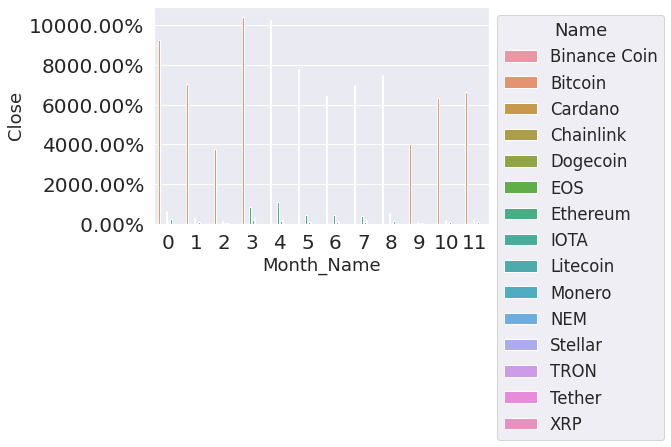

In [ ]:
ax = sns.barplot(x="Month_Name",y="Close",data=new_group,hue="Name")
yticks = ax.get_yticks()
ax.set_yticklabels(yticks, size = 20)
ax.set_xticklabels(ax.get_xticks(), size = 20)
ax.set_yticklabels(['{:7.2f}%'.format(x*1) for x in yticks])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

            Name    Earnings
0   Binance Coin  267.377580
1        Bitcoin  725.954055
2        Cardano  943.645718
3      Chainlink  605.426599
4       Dogecoin  736.713543
5            EOS  709.727557
6       Ethereum  827.386503
7           IOTA  910.284569
8       Litecoin  866.970163
9         Monero  871.227132
10           NEM  938.444795
11       Stellar  764.976219
12        Tether   -6.395355
13          TRON  635.822115
14           XRP  852.487640


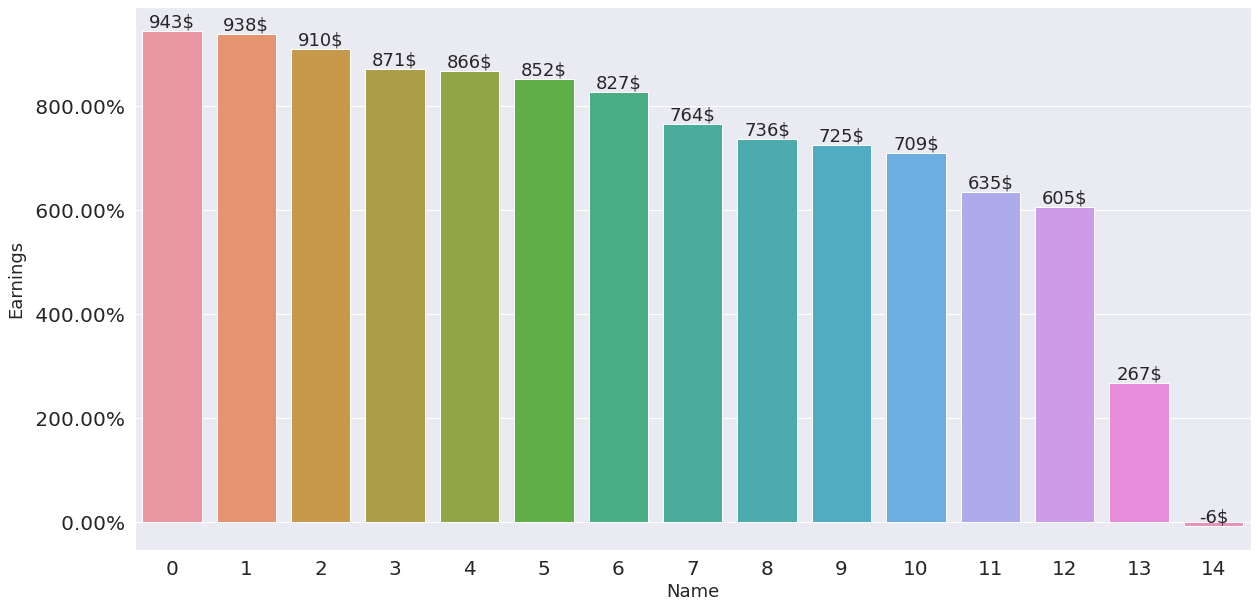

In [ ]:
def calc_earnings(currency_name, df):
   
    closing_prices = df[(df['Name'] == currency_name) & (~df['Close'].isnull())][['Date', 'Close']]

    num_units_purchased = 1000 / closing_prices.iloc[0]['Close']
    num_units_purchased

    last_price = closing_prices.iloc[-1]['Close']
    amount_earned = 1000 - (num_units_purchased * last_price)
    
    return amount_earned


lst=[]



for currency in crypto_names:
    
    top_10_currencies_earnings = {}    
    top_10_currencies_earnings["Name"]=currency    
    top_10_currencies_earnings["Earnings"] = calc_earnings(currency, df_crypto)    
    lst.append(top_10_currencies_earnings)
    
    
top_10_currencies_earnings = pd.DataFrame(lst,columns=["Name","Earnings"])
print(top_10_currencies_earnings)    
top_10_currencies_earnings = top_10_currencies_earnings.sort_values(by="Earnings",ascending=False)
plt.figure(figsize=(20,10))
ax=sns.barplot(x=top_10_currencies_earnings["Name"],y=top_10_currencies_earnings["Earnings"])
yticks = ax.get_yticks()
ax.set_yticklabels(yticks, size = 20)
ax.set_xticklabels(ax.get_xticks(), size = 20)
ax.set_yticklabels(['{:7.2f}%'.format(x*1) for x in yticks])

for rect in ax.patches:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d$' % int(height), ha='center', va='bottom')

### Heatmap -correlation analysis

By definition, Heatmaps are graphical portrayals of information that use variety coded frameworks. The main role of Heatmaps is to all the more likely picture the volume of areas/occasions inside a dataset and help with coordinating watchers towards regions on information perceptions that make the biggest difference.

However, they're considerably more than that. What many individuals don't understand, is that Heatmaps can be applied to a modest bunch of information representations. Due to their dependence on variety to impart values, Heatmaps are maybe most regularly used to show a more summed up perspective on numeric qualities. This is particularly obvious while managing enormous volumes of information, as varieties are more straightforward to recognize and figure out than crude numbers. Be that as it may, Heatmaps are complex and can likewise be utilized in additional exacting faculties, for instance, to exhibit 'hot and cold' (thickness) zones on a guide.

In [ ]:
cross_tab_crypto = pd.crosstab(index = df_crypto["Date"],columns = df_crypto["Name"],values = df_crypto["Close"],aggfunc=sum)

cross_tab_crypto

Name                 Binance Coin       Bitcoin   Cardano  Chainlink  \
Date                                                                   
2018-01-01 23:59:59      8.414610  13657.200195  0.728657   0.733563   
2018-01-02 23:59:59      8.837770  14982.099609  0.782587   0.673712   
2018-01-03 23:59:59      9.535880  15201.000000  1.079660   0.681167   
2018-01-04 23:59:59      9.213990  15599.200195  1.114120   0.984368   
2018-01-05 23:59:59     14.917200  17429.500000  0.999559   0.907486   
...                           ...           ...       ...        ...   
2018-12-27 23:59:59      5.275450   3654.833539  0.036944   0.275171   
2018-12-28 23:59:59      6.011828   3923.918594  0.041862   0.298379   
2018-12-29 23:59:59      5.832340   3820.408682  0.041508   0.299970   
2018-12-30 23:59:59      5.995711   3865.952577  0.043280   0.298643   
2018-12-31 23:59:59      6.164732   3742.700335  0.041063   0.289444   

Name                 Dogecoin        EOS    Ethereum      IOTA    Litecoin  \
Date                                                                         
2018-01-01 23:59:59  0.008909   8.843180  772.640991  3.974400  229.033005   
2018-01-02 23:59:59  0.009145   9.334710  884.443970  3.996150  255.684006   
2018-01-03 23:59:59  0.009320  10.227900  962.719971  4.126840  245.367996   
2018-01-04 23:59:59  0.009644  11.275500  980.921997  4.082310  241.369995   
2018-01-05 23:59:59  0.012167  10.839600  997.719971  3.754450  249.270996   
...                       ...        ...         ...       ...         ...   
2018-12-27 23:59:59  0.002364   2.322264  116.575911  0.318313   28.294508   
2018-12-28 23:59:59  0.002434   2.645889  137.647013  0.366629   32.510830   
2018-12-29 23:59:59  0.002403   2.628567  138.018335  0.355317   31.565002   
2018-12-30 23:59:59  0.002367   2.681653  139.859453  0.360808   31.976516   
2018-12-31 23:59:59  0.002346   2.566931  133.368263  0.356565   30.468223   

Name                     Monero       NEM   Stellar      TRON    Tether  \
Date                                                                      
2018-01-01 23:59:59  358.989990  1.041370  0.480008  0.051695  1.007280   
2018-01-02 23:59:59  383.416992  1.160180  0.564766  0.078682  1.004900   
2018-01-03 23:59:59  412.062988  1.790280  0.896227  0.094703  1.013440   
2018-01-04 23:59:59  403.048004  1.644810  0.724050  0.207974  1.002530   
2018-01-05 23:59:59  384.936005  1.591790  0.662712  0.220555  0.998634   
...                         ...       ...       ...       ...       ...   
2018-12-27 23:59:59   44.466692  0.063909  0.110486  0.018488  1.024174   
2018-12-28 23:59:59   49.770249  0.069135  0.121383  0.020868  1.023160   
2018-12-29 23:59:59   48.112117  0.067019  0.118036  0.020004  1.031473   
2018-12-30 23:59:59   48.364308  0.068802  0.117430  0.019947  1.019086   
2018-12-31 23:59:59   46.228170  0.064102  0.112813  0.018826  1.013722   

Name                      XRP  
Date                           
2018-01-01 23:59:59  2.391030  
2018-01-02 23:59:59  2.480900  
2018-01-03 23:59:59  3.105370  
2018-01-04 23:59:59  3.196630  
2018-01-05 23:59:59  3.048710  
...                       ...  
2018-12-27 23:59:59  0.341162  
2018-12-28 23:59:59  0.376852  
2018-12-29 23:59:59  0.367252  
2018-12-30 23:59:59  0.369581  
2018-12-31 23:59:59  0.352706  

[365 rows x 15 columns]

Whenever you have yourself a pleasant cleaned dataset, the subsequent stage is Exploratory Information Examination (EDA). EDA is the most common way of sorting out everything that the information can say to us and we use EDA to track down examples, connections, or inconsistencies to illuminate our ensuing examination. While there are a practically overpowering number of strategies to use in EDA, one of the best beginning devices is the matches plot (likewise called a scatterplot grid). A sets plot permits us to see both circulation of single factors and connections between two factors. Match plots are an extraordinary technique to distinguish patterns for follow-up examination and, luckily, are handily carried out in Python!

<Figure size 1440x1296 with 0 Axes>

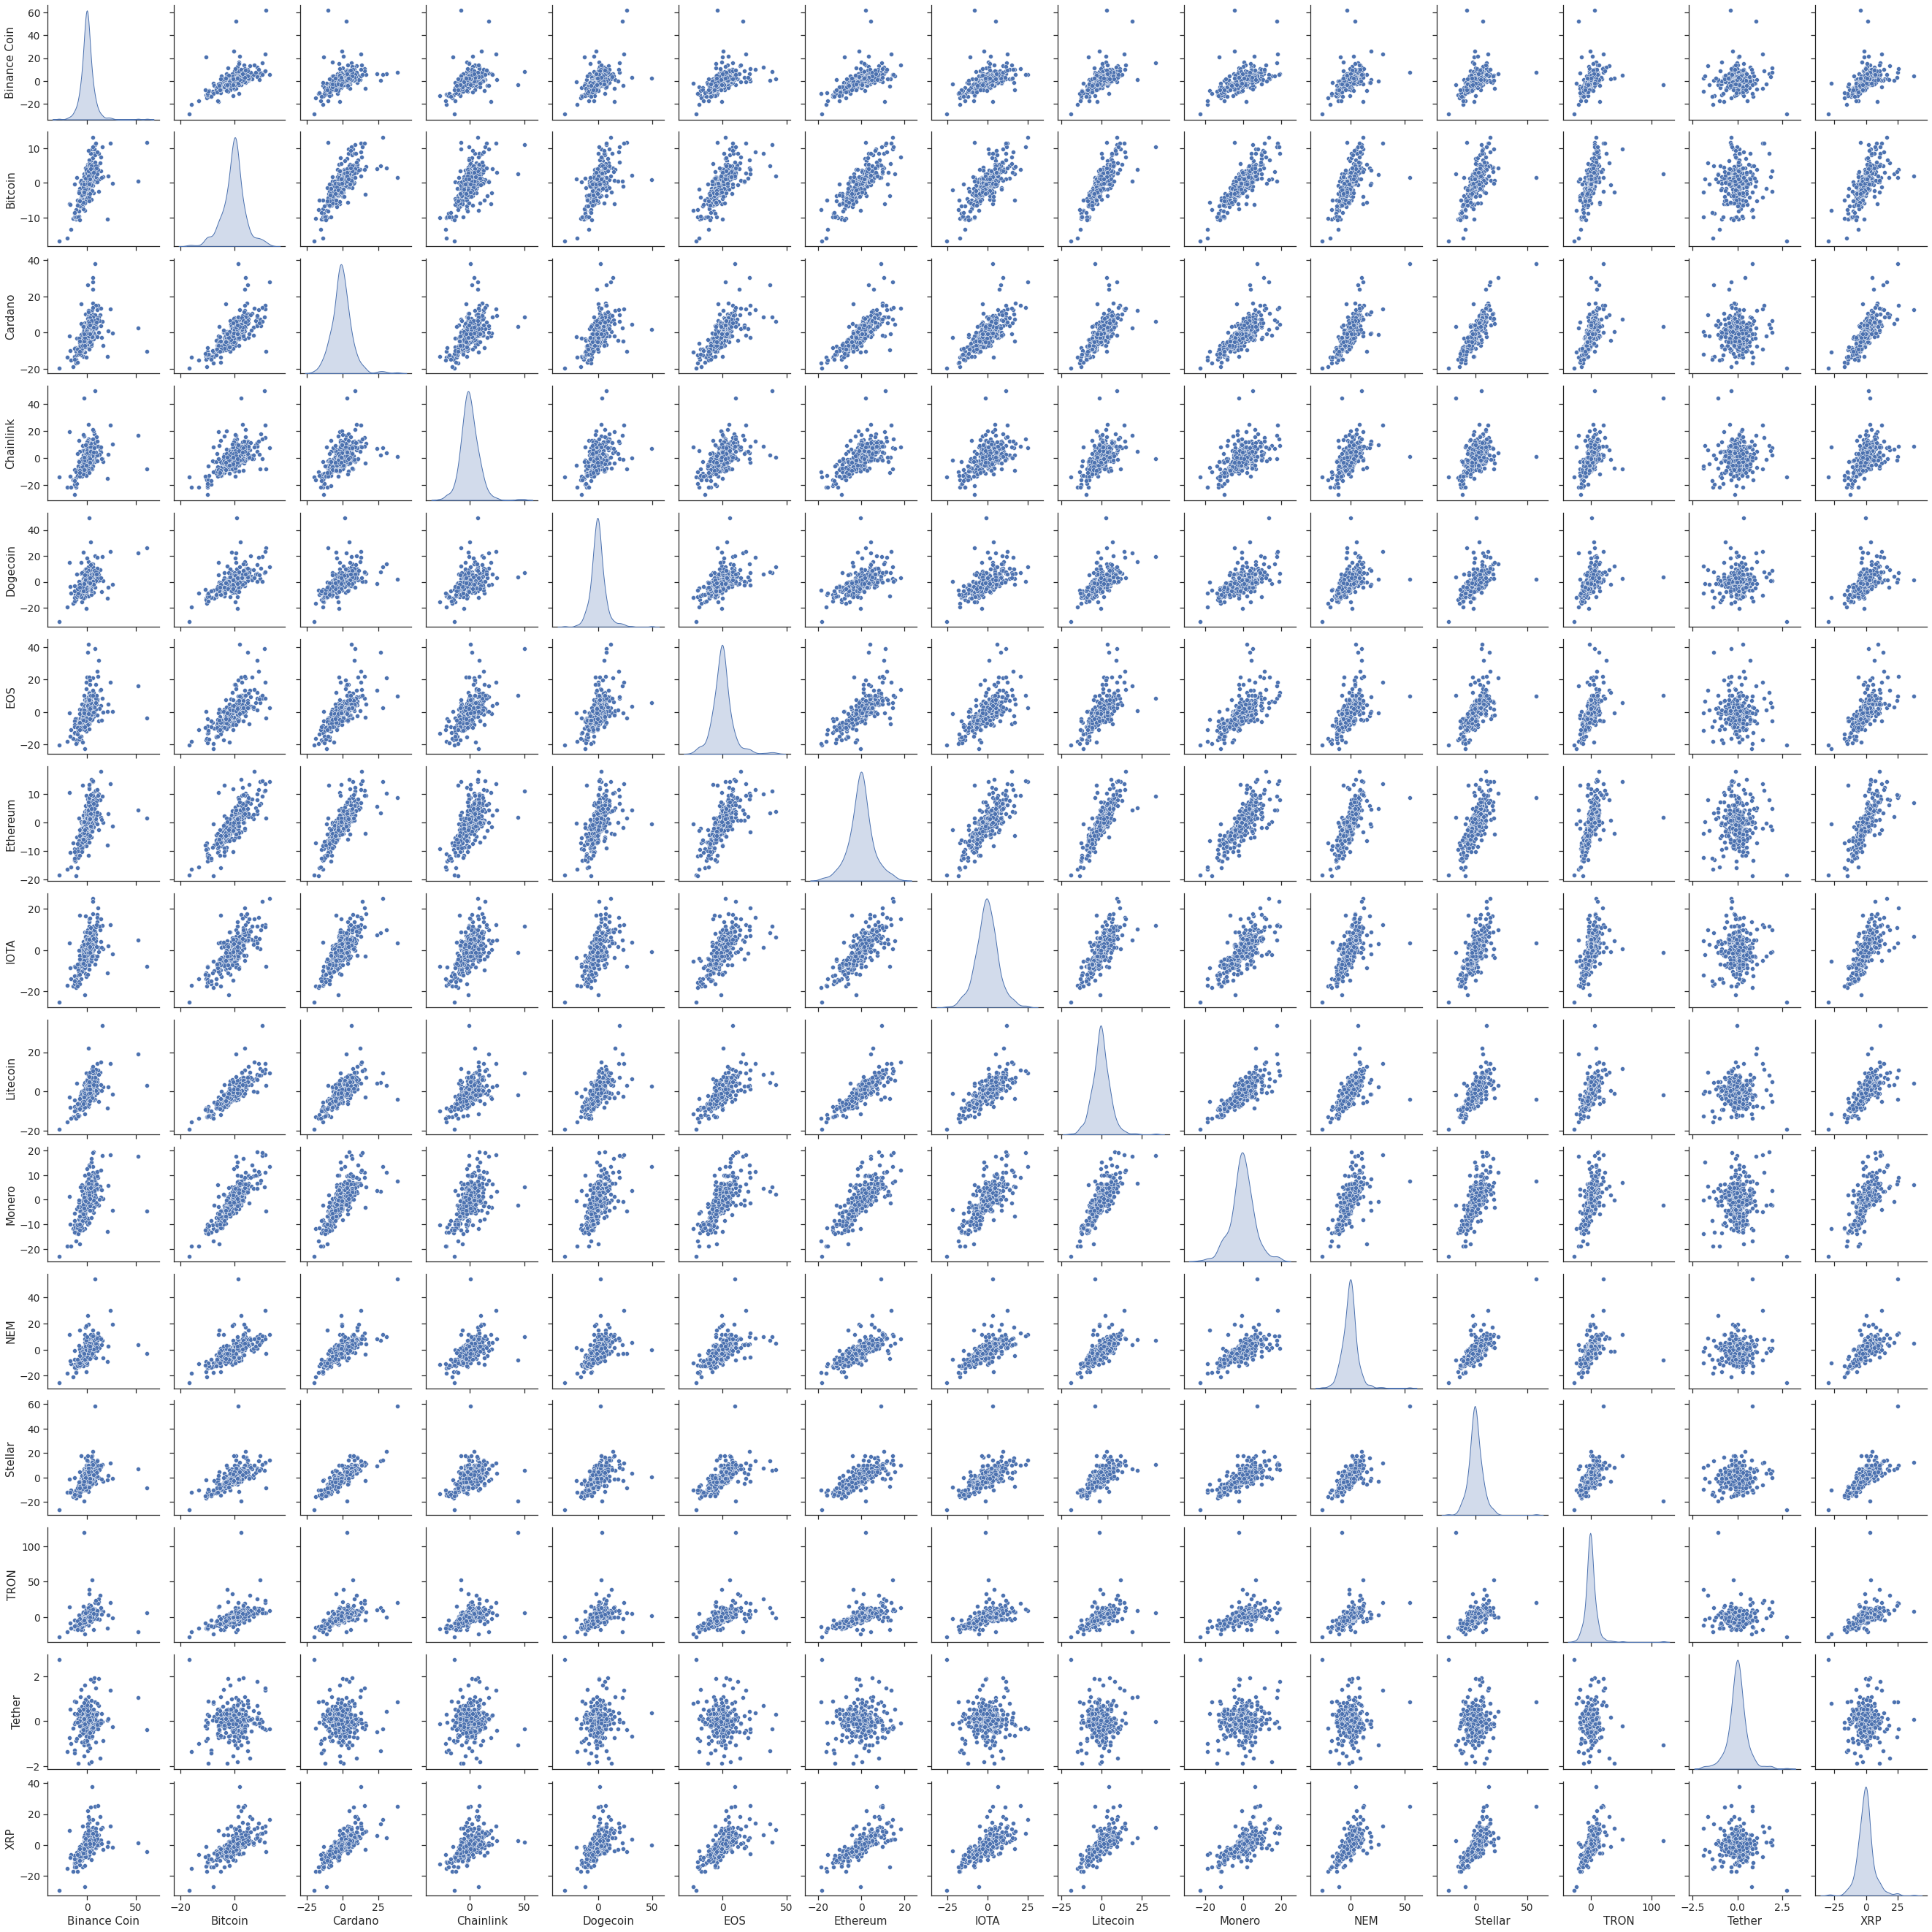

In [ ]:
pct_chg_df = cross_tab_crypto.pct_change()*100
pct_chg_df.dropna(inplace = True, how = "any", axis = 0)


import seaborn as sns
plt.figure(figsize=(20,18))
sns.set(style = "ticks", font_scale = 1.25)
sns.pairplot(pct_chg_df,diag_kind="kde")

In [ ]:
pct_chg_df

Name                 Binance Coin    Bitcoin    Cardano  Chainlink   Dogecoin  \
Date                                                                            
2018-01-02 23:59:59      5.028879   9.701106   7.401285  -8.158943   2.653819   
2018-01-03 23:59:59      7.899160   1.461080  37.960389   1.106555   1.909218   
2018-01-04 23:59:59     -3.375565   2.619566   3.191741  44.511994   3.479195   
2018-01-05 23:59:59     61.897286  11.733293 -10.282646  -7.810291  26.163161   
2018-01-06 23:59:59     52.574208   0.559396   2.760322  17.199604  22.156470   
...                           ...        ...        ...        ...        ...   
2018-12-27 23:59:59     -7.660552  -5.248856 -10.326481 -10.537739  -4.453423   
2018-12-28 23:59:59     13.958581   7.362444  13.310714   8.434142   2.971504   
2018-12-29 23:59:59     -2.985582  -2.637922  -0.843540   0.533033  -1.263188   
2018-12-30 23:59:59      2.801119   1.192121   4.267184  -0.442208  -1.493273   
2018-12-31 23:59:59      2.819035  -3.188147  -5.121988  -3.080232  -0.924477   

Name                       EOS   Ethereum       IOTA   Litecoin     Monero  \
Date                                                                         
2018-01-02 23:59:59   5.558300  14.470236   0.547252  11.636315   6.804369   
2018-01-03 23:59:59   9.568475   8.850306   3.270400  -4.034671   7.471238   
2018-01-04 23:59:59  10.242580   1.890688  -1.079032  -1.629390  -2.187768   
2018-01-05 23:59:59  -3.865910   1.712468  -8.031240   3.273398  -4.493757   
2018-01-06 23:59:59  16.053184   4.406054   5.001529  18.928401  17.622408   
...                        ...        ...        ...        ...        ...   
2018-12-27 23:59:59 -10.767267 -11.594922  -4.434274  -8.685862  -9.940314   
2018-12-28 23:59:59  13.935773  18.075006  15.178859  14.901558  11.927033   
2018-12-29 23:59:59  -0.654670   0.269764  -3.085284  -2.909272  -3.331573   
2018-12-30 23:59:59   2.019545   1.333966   1.545290   1.303704   0.524175   
2018-12-31 23:59:59  -4.278002  -4.641223  -1.176019  -4.716876  -4.416765   

Name                       NEM    Stellar        TRON    Tether        XRP  
Date                                                                        
2018-01-02 23:59:59  11.409003  17.657619   52.204867 -0.236281   3.758630  
2018-01-03 23:59:59  54.310540  58.689974   20.361917  0.849839  25.171107  
2018-01-04 23:59:59  -8.125546 -19.211318  119.607019 -1.076535   2.938779  
2018-01-05 23:59:59  -3.223473  -8.471516    6.049309 -0.388617  -4.627370  
2018-01-06 23:59:59   3.933939   7.127236  -20.746751  1.037023   1.484561  
...                        ...        ...         ...       ...        ...  
2018-12-27 23:59:59 -10.321433  -8.391725   -9.584752  0.453555  -9.910573  
2018-12-28 23:59:59   8.177837   9.862975   12.875678 -0.098954  10.461278  
2018-12-29 23:59:59  -3.061151  -2.757203   -4.140660  0.812401  -2.547440  
2018-12-30 23:59:59   2.660952  -0.513681   -0.284523 -1.200879   0.634272  
2018-12-31 23:59:59  -6.831961  -3.931380   -5.619953 -0.526351  -4.565905  

[364 rows x 15 columns]

Although the pair plots provide very good visualization of all possible combinations between the bunch of cryptos,
it doesn’t provide any detailed information like Pearson’s R value or null-hypothesis p value to quantify the correlation.
That’s where the joint plot comes into the picture!

While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot provides detailed information like Pearson’s R value (Pearson’s correlation coefficient) for each pair of cryptos. Pearson’s R value ranges from -1 to 1. 
Negative value indicates a negative linear relation between the variables, while positive value indicates a positive relationship. Pearson’s R value closer to 1 (or -1) indicates strong correlation, while value closer to 0 indicates weak correlation.

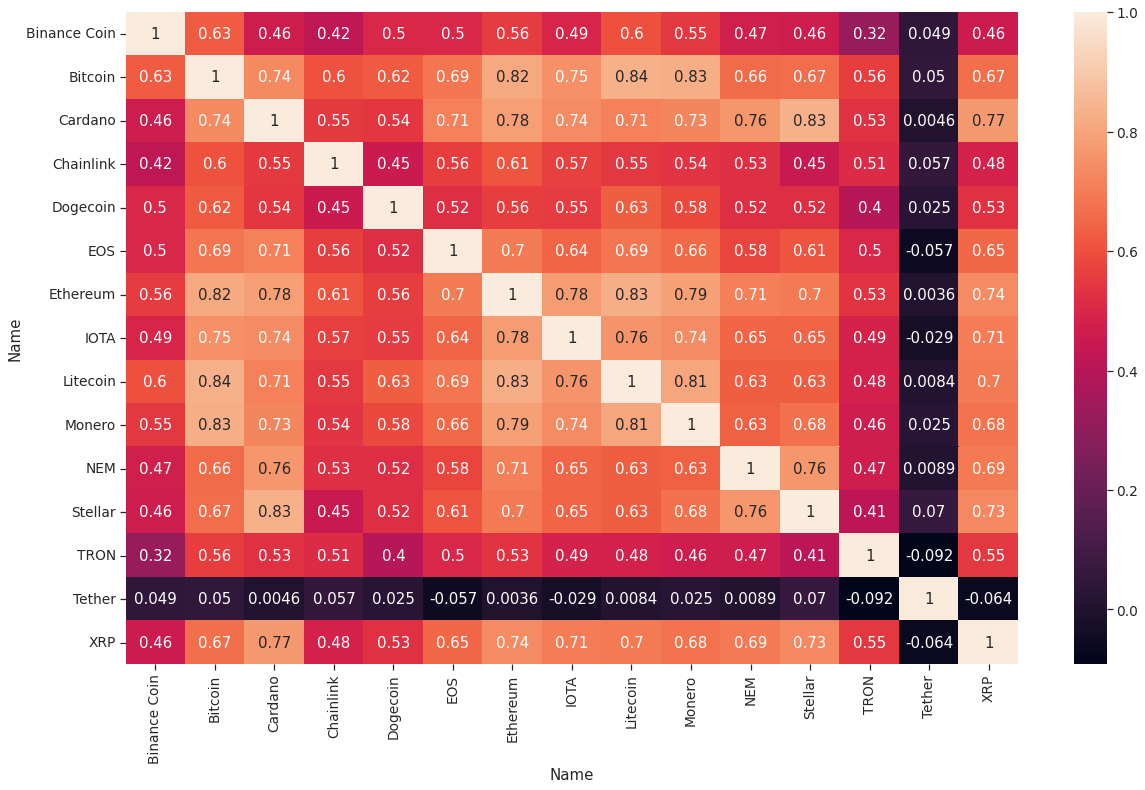

In [ ]:
plt.figure(figsize=(20,12))

sns.heatmap(pct_chg_df.corr(),annot=True)

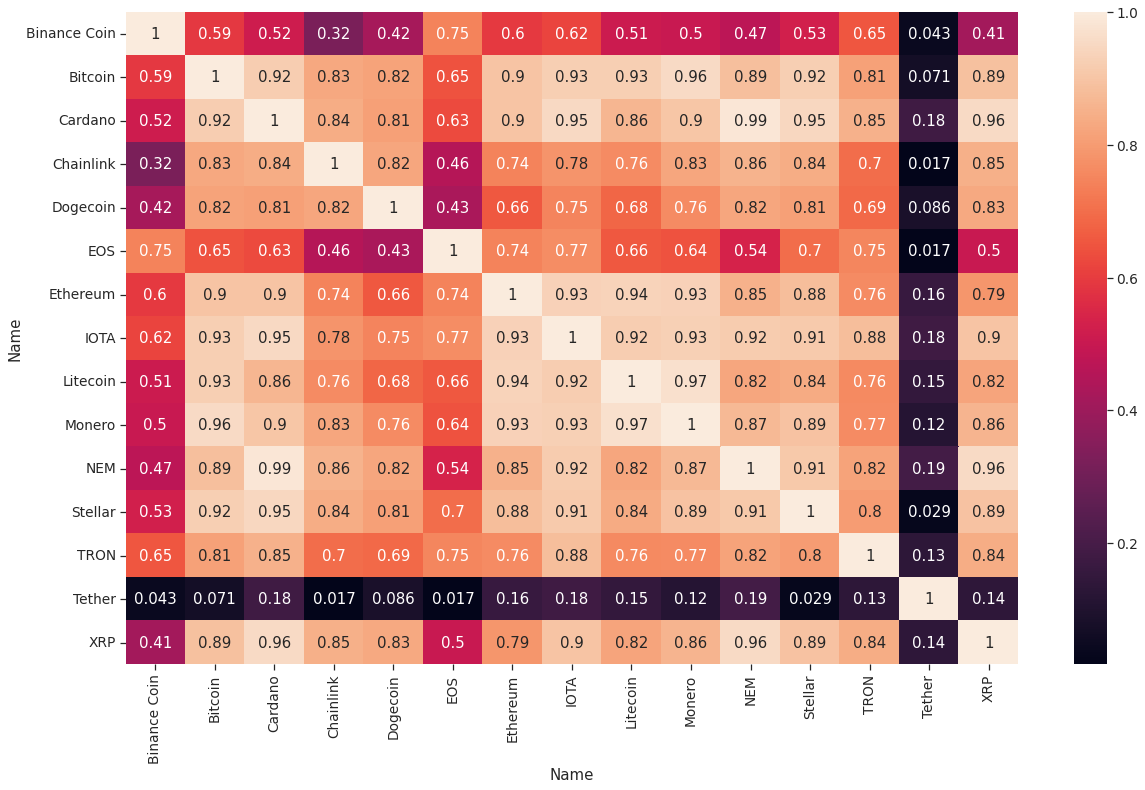

In [ ]:
plt.figure(figsize=(20,12))

sns.heatmap(cross_tab_crypto.corr(),annot=True)

### Volatility analysis

Volatility is one of the most important pillars in financial markets.
A cryptocurrency or stock is said to have high volatility if its value can change dramatically within a short span of time.
On other hand, lower volatility means that value of crypto tends to be relatively steady over a period of time. 
These movements are due to several factors including demand and supply, 
sentiment, corporate actions, greed, and fear, etc. 
Mathematically, volatility is measured using a statistical measure called ‘standard deviation’,
which measures an asset’s departure from its average value.
We have already calculated the intraday returns (daily returns) of the 10 cryptos .
Next, we will calculate the 7-day rolling mean(also called moving average) of the daily returns,
then compute the standard deviation (which is square root of the variance) and plot the values.
Relax, we don’t have to calculate all this manually; Pandas ‘rolling()’ function and ‘std()’ 
function does the job for us in just one line!

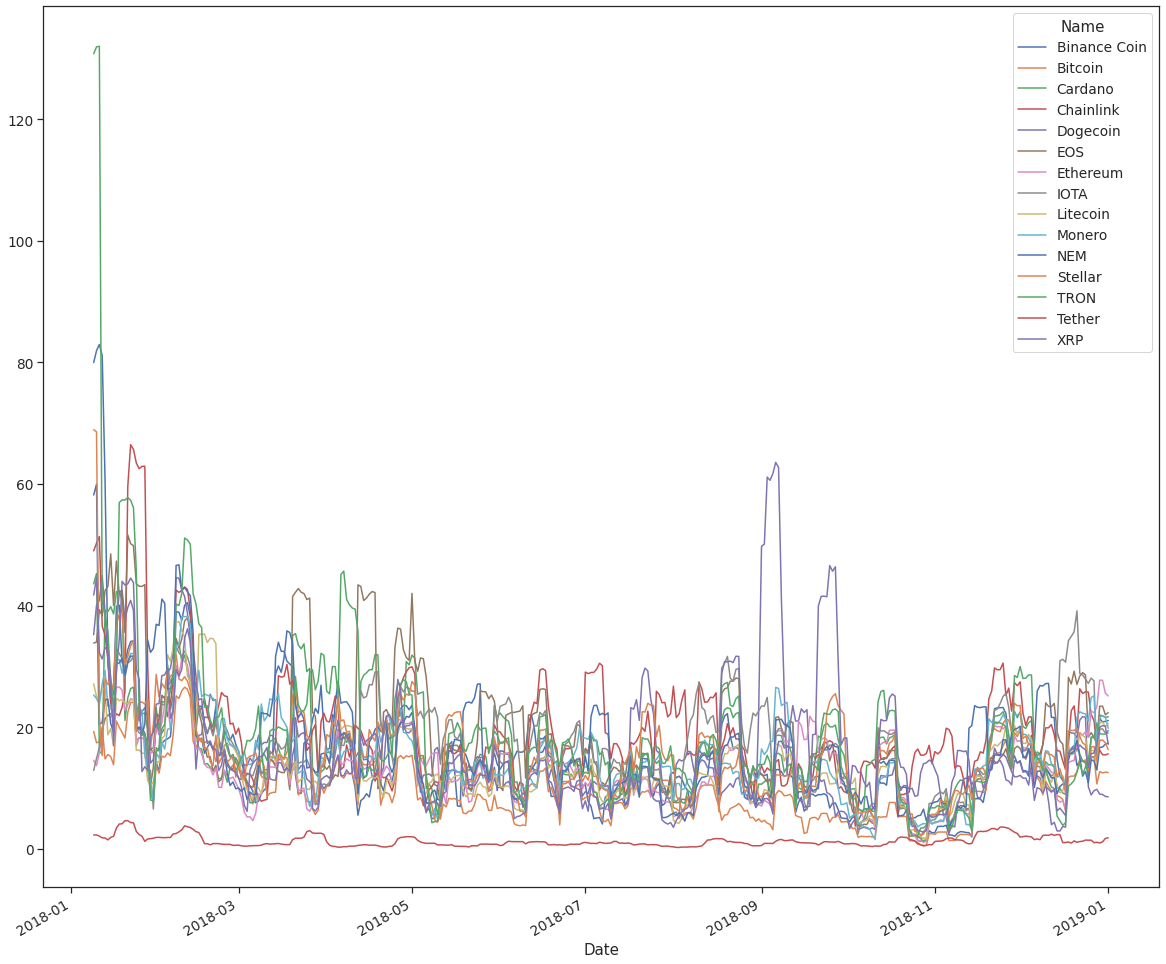

In [ ]:
volatility = pct_chg_df[['Binance Coin', 'Bitcoin', 'Cardano', 'Chainlink', 'Dogecoin', 'EOS', 'Ethereum', 'IOTA', 'Litecoin', 'Monero', 'NEM', 'Stellar', 'TRON', 'Tether', 'XRP']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (20, 18))

`Tron` seems to be most volatile followed by `Binance Coin`

`Tether` is least volatile which is also because they are stable coins.
Bitcoin seems to be the highest priced cryptocurrency but if compared to other cryptocurrencies its volatility is low.
The low volatility of bitcoin can also be understood from its highest market capitalization and price similar to large cap stocks in share market


Many traders and investors seek out higher volatility investments in order to make higher profits. If a crypto price does not move, not only it has low volatility, but also it has low gain potential. On the other hand, a crypto price or other security with a very high volatility level can have tremendous profit potential, but the risk is equally high.

# Final Model for Prediction

For the final prediction first we take again a brief overview of the dataset. We can see that almost all of the factors have been cleaned but the Symbol and the Date coulmn would be redundant and unfitting for the models to assess and will be hence removed in the training-testing datasets.

In [ ]:
df_crypto

Name Symbol                Date       High       Low      Open  \
0     Binance Coin    BNB 2018-01-01 23:59:59   8.700570  7.959220  8.629530   
1     Binance Coin    BNB 2018-01-02 23:59:59   9.122590  8.217180  8.457700   
2     Binance Coin    BNB 2018-01-03 23:59:59   9.580780  8.529180  8.770140   
3     Binance Coin    BNB 2018-01-04 23:59:59   9.538490  8.854130  9.445840   
4     Binance Coin    BNB 2018-01-05 23:59:59  16.717699  9.094680  9.145680   
...            ...    ...                 ...        ...       ...       ...   
5470           XRP    XRP 2018-12-27 23:59:59   0.379608  0.336282  0.379106   
5471           XRP    XRP 2018-12-28 23:59:59   0.379416  0.339139  0.341807   
5472           XRP    XRP 2018-12-29 23:59:59   0.383937  0.367080  0.378346   
5473           XRP    XRP 2018-12-30 23:59:59   0.371147  0.362264  0.365248   
5474           XRP    XRP 2018-12-31 23:59:59   0.373793  0.350787  0.371051   

          Close  Volume in billion usd$  Market in billion usd$  
0      8.414610                0.066423                0.833164  
1      8.837770                0.104789                0.875063  
2      9.535880                0.108852                0.944186  
3      9.213990                0.158819                0.912314  
4     14.917200                0.341505                1.477012  
...         ...                     ...                     ...  
5470   0.341162                0.575821               13.917404  
5471   0.376852                0.765420               15.373343  
5472   0.367252                0.617892               14.981716  
5473   0.369581                0.486955               15.076741  
5474   0.352706                0.501794               14.388351  

[5475 rows x 9 columns]

We can encode all the categorical columns post EDA to be able to fit in the models for training. Using the Label encoder we will map the labels too for future analysis of the columns based on the factors as each label's weightage.

In [ ]:
label_encoder = LabelEncoder()
label_maps = []
for column in others:
  df_crypto[column] = label_encoder.fit_transform(df_crypto[column])
  label_maps.append({column:dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))})

df_crypto.head()

Name  Symbol                Date       High      Low     Open     Close  \
0     0       1 2018-01-01 23:59:59   8.700570  7.95922  8.62953   8.41461   
1     0       1 2018-01-02 23:59:59   9.122590  8.21718  8.45770   8.83777   
2     0       1 2018-01-03 23:59:59   9.580780  8.52918  8.77014   9.53588   
3     0       1 2018-01-04 23:59:59   9.538490  8.85413  9.44584   9.21399   
4     0       1 2018-01-05 23:59:59  16.717699  9.09468  9.14568  14.91720   

   Volume in billion usd$  Market in billion usd$  
0                0.066423                0.833164  
1                0.104789                0.875063  
2                0.108852                0.944186  
3                0.158819                0.912314  
4                0.341505                1.477012

In [ ]:
for map in label_maps:
  for attribute in map:
    print(attribute,":",'\n\n')
    elements = map[attribute]
    for element in elements:
      print(element,"-", elements[element])
    print('\n')

Name : 


Binance Coin - 0
Bitcoin - 1
Cardano - 2
Chainlink - 3
Dogecoin - 4
EOS - 5
Ethereum - 6
IOTA - 7
Litecoin - 8
Monero - 9
NEM - 10
Stellar - 11
TRON - 12
Tether - 13
XRP - 14


Symbol : 


ADA - 0
BNB - 1
BTC - 2
DOGE - 3
EOS - 4
ETH - 5
LINK - 6
LTC - 7
MIOTA - 8
TRX - 9
USDT - 10
XEM - 11
XLM - 12
XMR - 13
XRP - 14




we define the Y subset to be the range of the high and low price and convert it to the int type as for accurate prediction for the model. The X subset would contain all the other factors in the same encoded and float type for detailed prediction on that side.

In [ ]:
y = ((df_crypto['High']-df_crypto['Low'])).astype(int)
df_crypto.drop(columns=['Symbol', 'Date','High', 'Low'], inplace=True)
x = df_crypto.copy()

Henceforth we can see the general perceptional overview of both of the subsets that have been considered for modelling.

In [ ]:
print(x.head(),'\n')
print(y.head())

   Name       High      Low     Open     Close  Volume in billion usd$  \
0     0   8.700570  7.95922  8.62953   8.41461                0.066423   
1     0   9.122590  8.21718  8.45770   8.83777                0.104789   
2     0   9.580780  8.52918  8.77014   9.53588                0.108852   
3     0   9.538490  8.85413  9.44584   9.21399                0.158819   
4     0  16.717699  9.09468  9.14568  14.91720                0.341505   

   Market in billion usd$  
0                0.833164  
1                0.875063  
2                0.944186  
3                0.912314  
4                1.477012   

0    0
1    0
2    1
3    0
4    7
dtype: int64


Using the scikit-learn's Standard scaler and train test split methods we are able to centrally standardise the test subset along the mean. and split the greater subsets into a ratio of 1:4 for training and testing sets for both the X and Y.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.25 , random_state= 0)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

print(x.shape ,y.shape)

(5475, 7) (5475,)


As a finale, we took multiple models and cross validate their negative mean square error to define the rate and intensity of the error to be able to judge which model fits better. Hence, we plot a graph between all the negative mean square errors and whichever is the lowest shall be considered as the most accurate and would be implemented on the dataset.

The following listed algorithms can be considered for the dataset: 

1. Logistic Regression

2. KNeigghbors Classifiers

3. Linear Discriminant Analysis

4. Support Vector Machines (SVMs)

5. Decision Tree Classifier

6. AdaBoost Classifier

7. Random Forest Classifier

8. Gaussian Naive Bayes

The algorithm will be selected with high precision, accuracy, f1 score and least negative mean square error.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

k = KFold(n_splits = 5)

models_list= [LogisticRegression(),
          KNeighborsClassifier(), 
          LinearDiscriminantAnalysis(), 
          SVC(kernel = 'linear'), 
          DecisionTreeClassifier(criterion = 'entropy',max_depth = 3), 
          AdaBoostClassifier(n_estimators=1000), 
          RandomForestClassifier(n_estimators = 1000), 
          GaussianNB()]

models_names = ["LogisticRegression",
     'KNeighborsClassifier',
     'LinearDiscriminantAnalysis', 
     'Support Vector',
     'Decision Tree',
     'AdaBoostClassifier',
     'Random Forest',
     'GaussianNB']

neg_mean_squared_error=[]

for i, model in enumerate(models_list):
    print(model,":")
    cv_result = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
    neg_mean_squared_error.append(cv_result.mean())
    y_pred = cross_val_predict(model,x_train,y_train,cv=5)
    print(classification_report(y_train,y_pred))
    print()

LogisticRegression() :
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2892
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00        80
           4       0.00      0.00      0.00        54
           5       0.00      0.00      0.00        45
           6       0.00      0.00      0.00        31
           7       0.03      0.02      0.03        44
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00        21
          14       0.00      0.00      0.00        16
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00        13
    

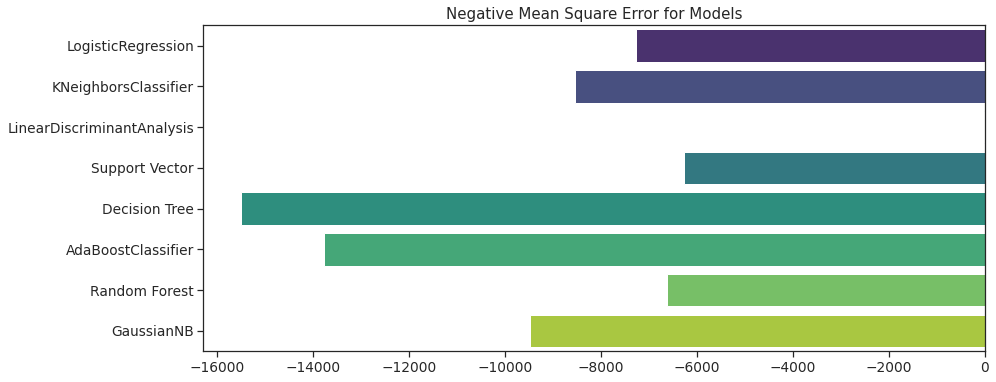

In [ ]:
plt.figure(figsize = (14 , 6))
plt.title('Negative Mean Square Error for Models')
sns.barplot(neg_mean_squared_error,models_names,palette="viridis")

The Linear Discriminant Analysis has the least error and is the most accurate. LDA is a dimensionality decrease method that is generally utilized for directed order issues. It is utilized for displaying contrasts in bunches for example isolating at least two classes. It is utilized to extend the highlights in higher aspect space into a lower aspect space.
For instance, we have two classes and we really want to effectively isolate them. Classes can have numerous highlights. Utilizing just a solitary component to group them might bring about some covering as displayed in the beneath figure. In this way, we will continue to expand the quantity of elements for legitimate arrangement.

We use the fit method to train the model based on the X and Y training subset and hencforth check its accuracy. After that we use the X and Y testing subset which will actually be the evaluation of the model used. The accuracy of the model will be the deciding factor of this projects goal.

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
print("Train Accuracy : {:.2f}% ".format(accuracy_score(LDA.predict(x_train),y_train)*100))
print("Test Accuracy : {:.2f}% ".format(accuracy_score(LDA.predict(x_test),y_test)*100))

Train Accuracy : 97.52% 
Test Accuracy : 89.99% 


**We are able to achieve an accuracy of around 90% which suggests a humble success of the project and can be used to assess and help in the prediction of crypto currency prices in the future.**